In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import random
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
def load_and_display_samples(train_df, image_dir, n_samples=5):
    """
    Load and display sample images for each cancer subtype
    """
    # Set style for better visualization
    plt.style.use('seaborn')
    
    # Get unique subtypes
    subtypes = train_df['label'].unique()
    
    # Create a figure
    plt.figure(figsize=(20, 4*len(subtypes)))
    
    # For each subtype
    for idx, subtype in enumerate(subtypes):
        # Get sample images for this subtype
        subtype_df = train_df[train_df['label'] == subtype]
        valid_images = 0
        
        # Keep sampling until we get enough valid images
        for _, row in subtype_df.sample(frac=1).iterrows():  # Shuffle and iterate
            if valid_images >= n_samples:
                break
                
            image_path = os.path.join(image_dir, f"{str(row['image_id'])}_thumbnail.png")
            
            try:
                if os.path.exists(image_path):
                    img = Image.open(image_path)
                    plt.subplot(len(subtypes), n_samples, idx*n_samples + valid_images + 1)
                    plt.imshow(img)
                    plt.axis('off')
                    if valid_images == 0:  # Only add label for first image in row
                        plt.title(f'{subtype}\n(n={len(subtype_df)})', fontsize=12, pad=20)
                    valid_images += 1
            except:
                continue
    
    plt.tight_layout()
    plt.show()

Dataset Overview:
Total number of images: 538

Distribution of subtypes:
label
HGSC    222
EC      124
CC       99
LGSC     47
MC       46
Name: count, dtype: int64

Sample of image IDs:
0      4
1     66
2     91
3    281
4    286
Name: image_id, dtype: int64

Displaying cancer subtype samples...


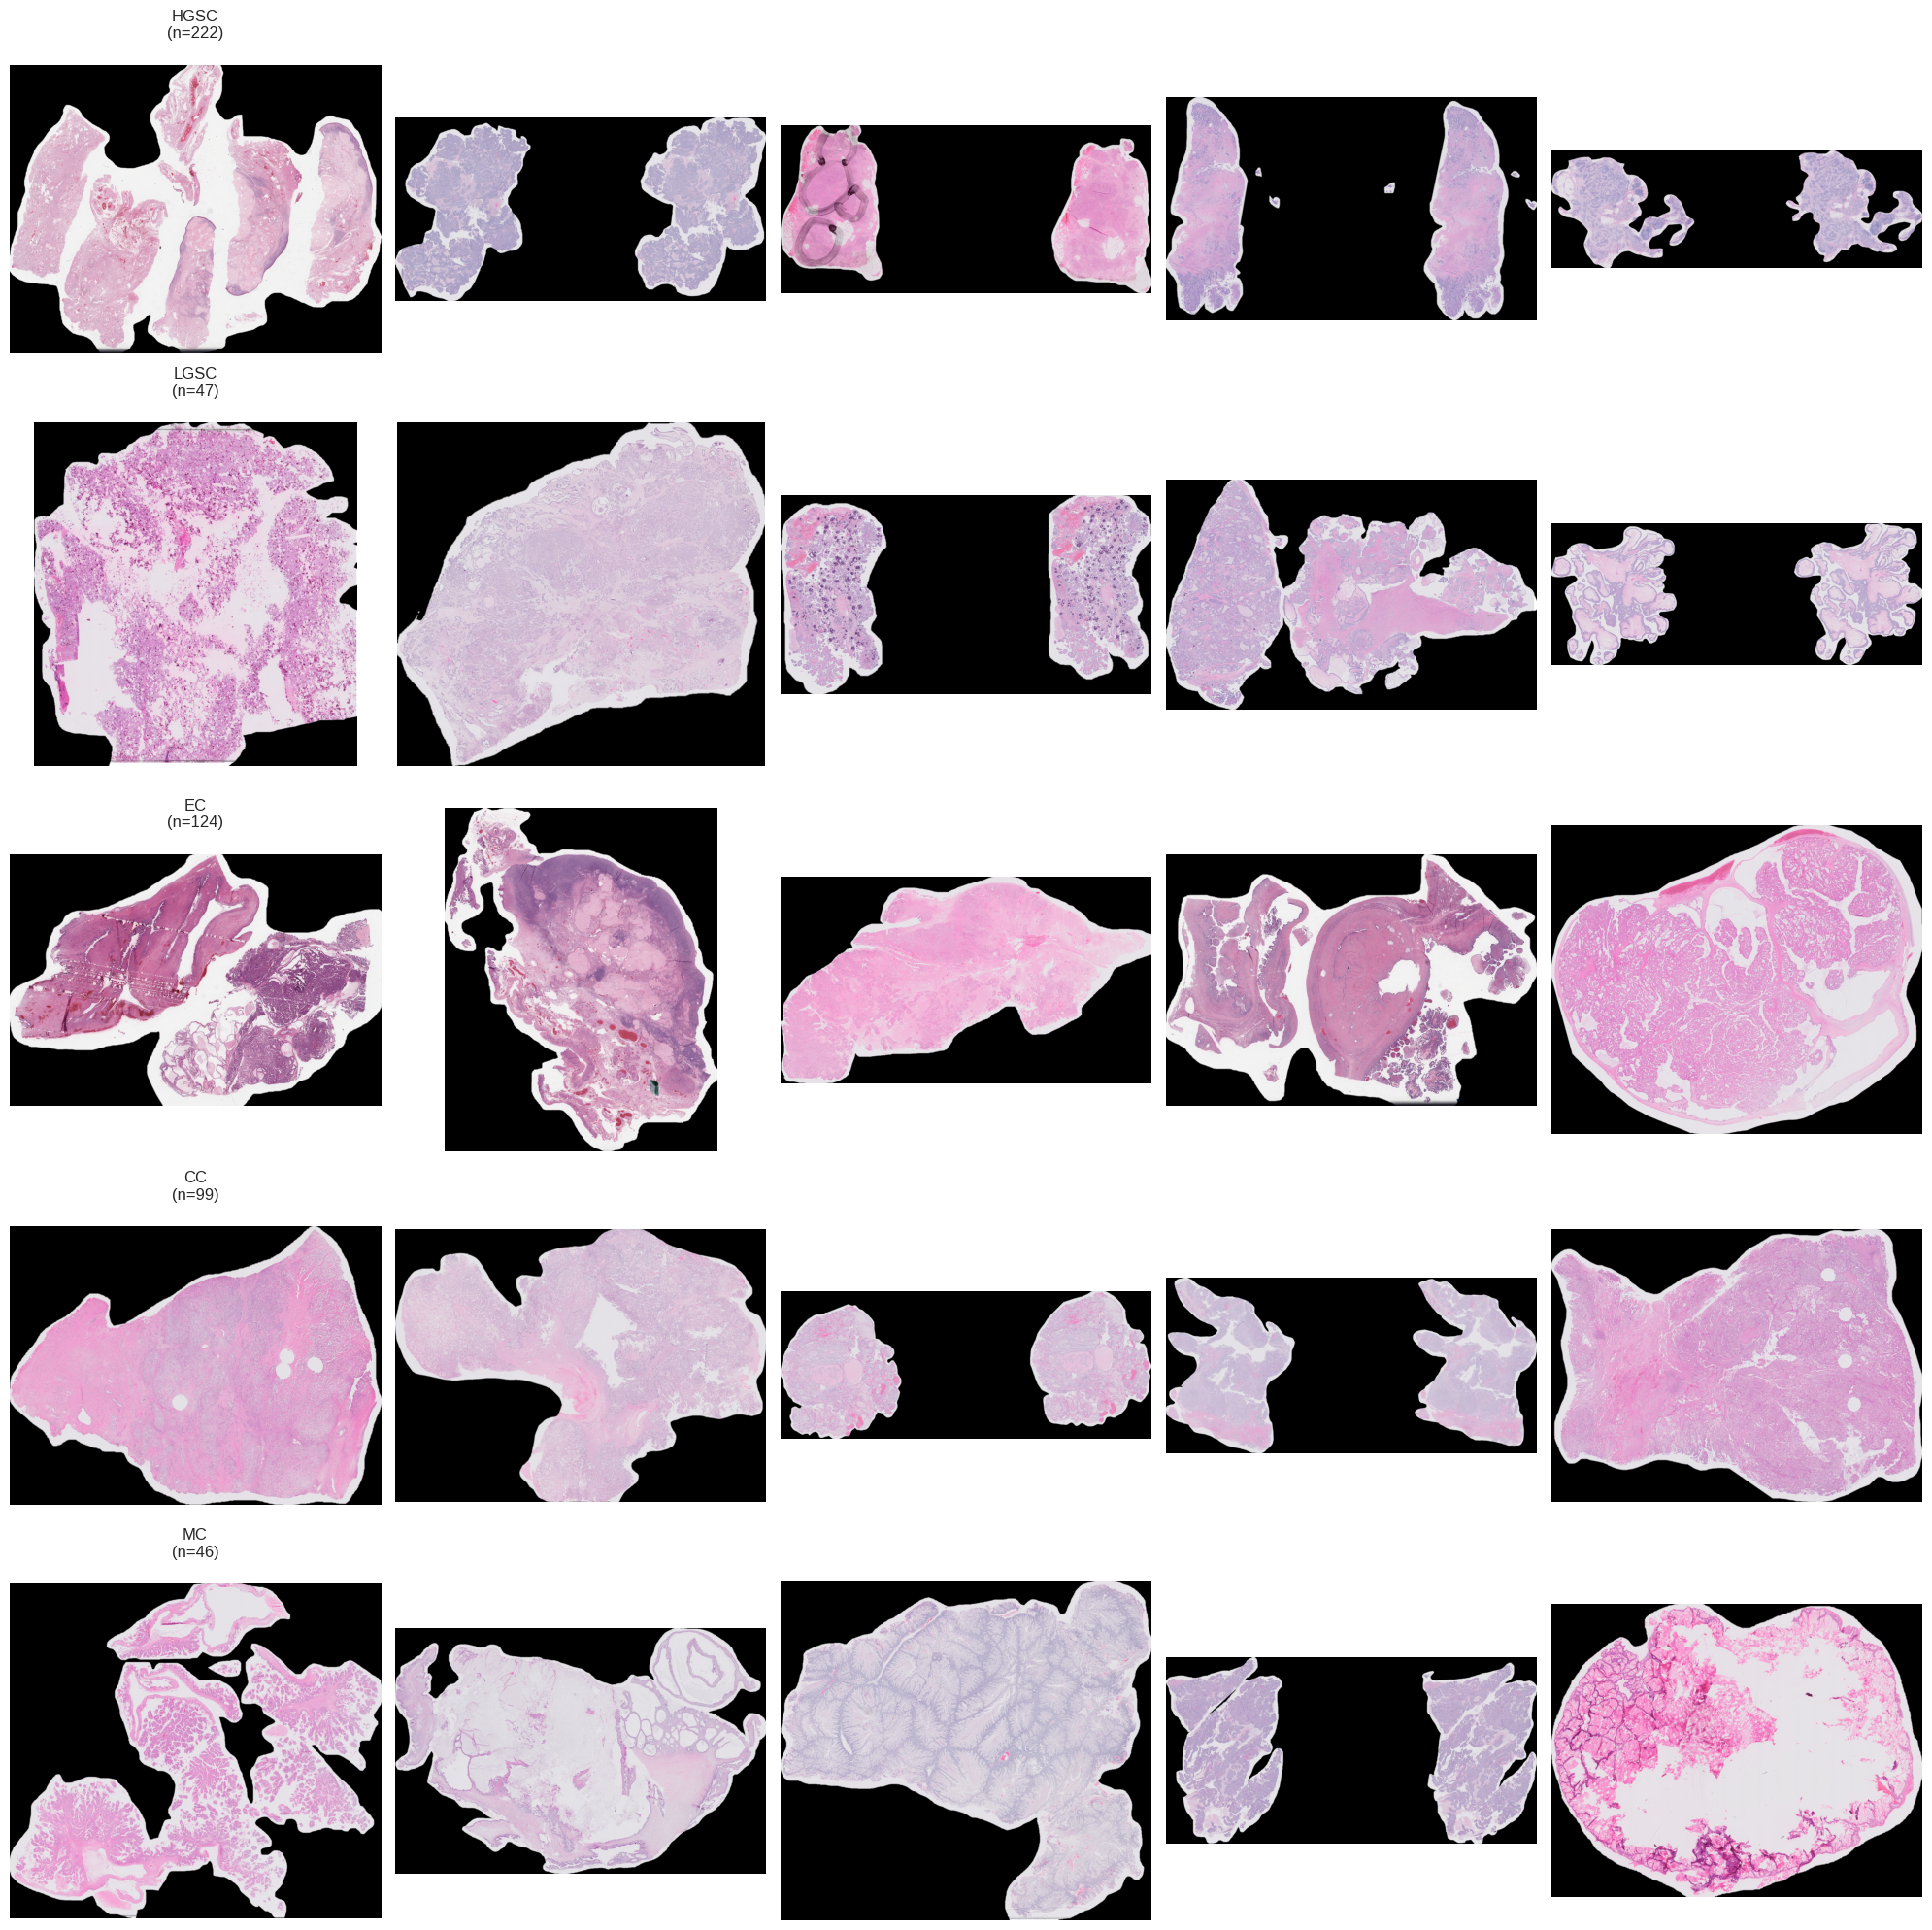


Image size statistics:

Width:
count       538.000000
mean      48859.533457
std       20040.989927
min        2964.000000
25%       34509.000000
50%       48160.000000
75%       64143.750000
max      105763.000000
Name: image_width, dtype: float64

Height:
count      538.000000
mean     29729.460967
std      10762.899796
min       2964.000000
25%      22089.500000
50%      29732.000000
75%      37880.750000
max      50155.000000
Name: image_height, dtype: float64


In [3]:
def main():
    # Load the training data
    train_df = pd.read_csv('/kaggle/input/UBC-OCEAN/train.csv')
    
    # Print initial data info
    print("Dataset Overview:")
    print(f"Total number of images: {len(train_df)}")
    print("\nDistribution of subtypes:")
    print(train_df['label'].value_counts())
    print("\nSample of image IDs:")
    print(train_df['image_id'].head())
    
    # Define image directory 
    train_image_dir = '/kaggle/input/UBC-OCEAN/train_thumbnails'
    
    # Verify directory exists
    if not os.path.exists(train_image_dir):
        print(f"Error: Directory '{train_image_dir}' not found")
        return
    
    # Display visualization
    print("\nDisplaying cancer subtype samples...")
    load_and_display_samples(train_df, train_image_dir)
    
    # Display image size statistics
    print("\nImage size statistics:")
    print("\nWidth:")
    print(train_df['image_width'].describe())
    print("\nHeight:")
    print(train_df['image_height'].describe())

if __name__ == "__main__":
    main()

In [4]:
train_df = pd.read_csv("/kaggle/input/UBC-OCEAN/train.csv")
train_df.head()

image_id label  image_width  image_height  is_tma
0         4  HGSC        23785         20008   False
1        66  LGSC        48871         48195   False
2        91  HGSC         3388          3388    True
3       281  LGSC        42309         15545   False
4       286    EC        37204         30020   False

# EDA

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

In [6]:
def perform_eda(train_df):
    """
    Perform comprehensive EDA on the UBC-OCEAN dataset
    """
    # Set the style for better visualizations
    plt.style.use('seaborn')
    
    # 1. Class Distribution Analysis
    plt.figure(figsize=(10, 6))
    sns.barplot(x=train_df['label'].value_counts().index, 
                y=train_df['label'].value_counts().values)
    plt.title('Distribution of Cancer Subtypes')
    plt.xlabel('Subtype')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    #plt.savefig("class_distribution.png")
    plt.show()
    
    # 2. Image Size Distribution
    plt.figure(figsize=(15, 5))
    
    # Width distribution
    plt.subplot(1, 2, 1)
    sns.histplot(data=train_df, x='image_width', bins=30)
    plt.title('Distribution of Image Widths')
    plt.xlabel('Width (pixels)')
    
    # Height distribution
    plt.subplot(1, 2, 2)
    sns.histplot(data=train_df, x='image_height', bins=30)
    plt.title('Distribution of Image Heights')
    plt.xlabel('Height (pixels)')
    plt.tight_layout()
    plt.show()
    
    # 3. TMA vs WSI Analysis
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train_df, x='label', hue='is_tma')
    plt.title('Distribution of TMA vs WSI across Subtypes')
    plt.xlabel('Subtype')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Is TMA')
    plt.tight_layout()
    #plt.savefig("tma_wsi.png")
    plt.show()
    
    # 4. Image Aspect Ratio Analysis
    train_df['aspect_ratio'] = train_df['image_width'] / train_df['image_height']
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_df, x='label', y='aspect_ratio')
    plt.title('Image Aspect Ratios by Subtype')
    plt.xlabel('Subtype')
    plt.ylabel('Aspect Ratio (Width/Height)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    #plt.savefig("image_ratio.png")
    plt.show()
    
    # 5. Print Statistical Summary
    print("\nStatistical Summary by Subtype:")
    summary_stats = train_df.groupby('label').agg({
        'image_width': ['mean', 'std', 'min', 'max'],
        'image_height': ['mean', 'std', 'min', 'max'],
        'is_tma': 'sum'
    }).round(2)
    print(summary_stats)
    
    # 6. Image Size Scatter Plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=train_df, x='image_width', y='image_height', 
                    hue='label', style='is_tma', alpha=0.6)
    plt.title('Image Dimensions by Subtype and Type (TMA vs WSI)')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Height (pixels)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    #plt.savefig("scatter_plot.png")
    plt.show()


Starting Exploratory Data Analysis...

Dataset Overview:
Total number of samples: 538
Number of unique subtypes: 5
Number of TMA images: 25
Number of WSI images: 513


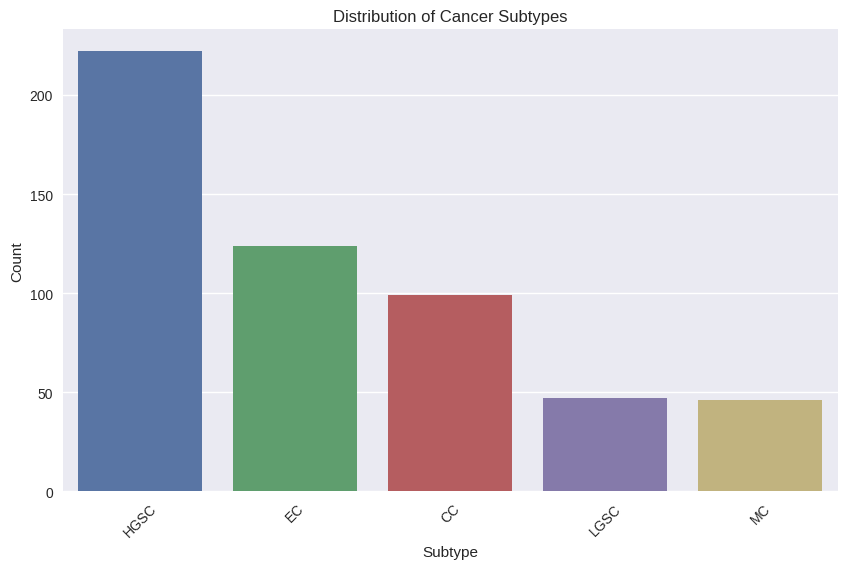

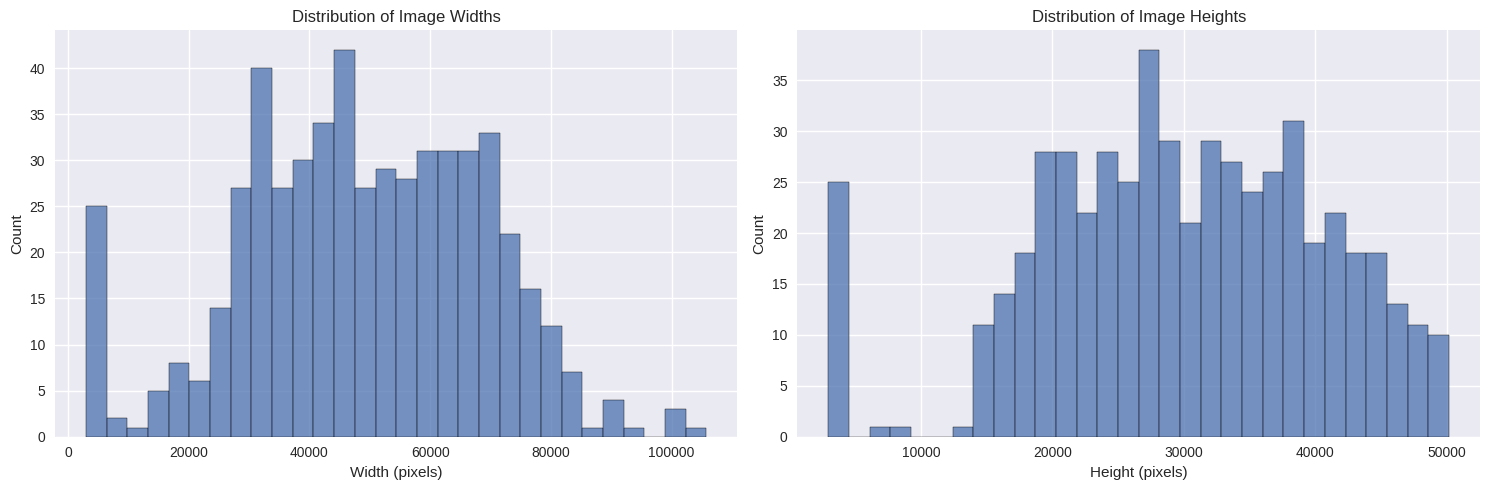

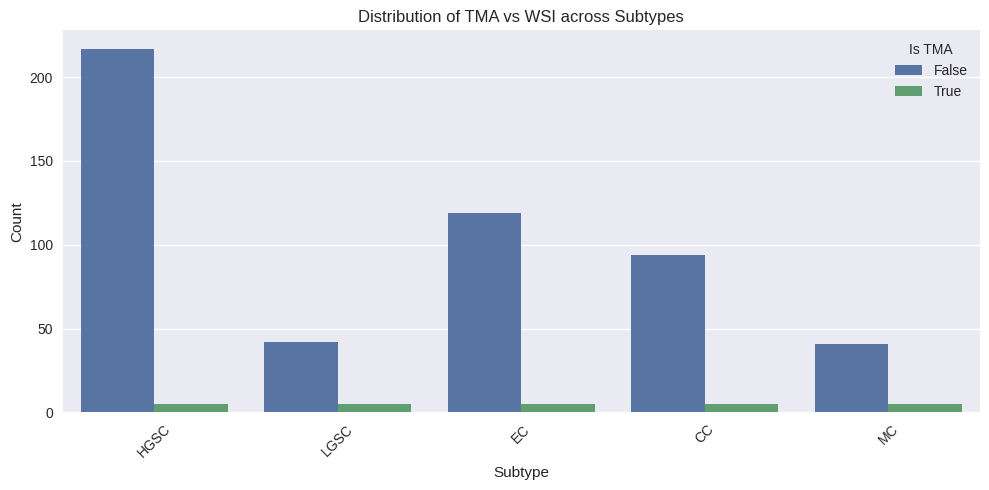

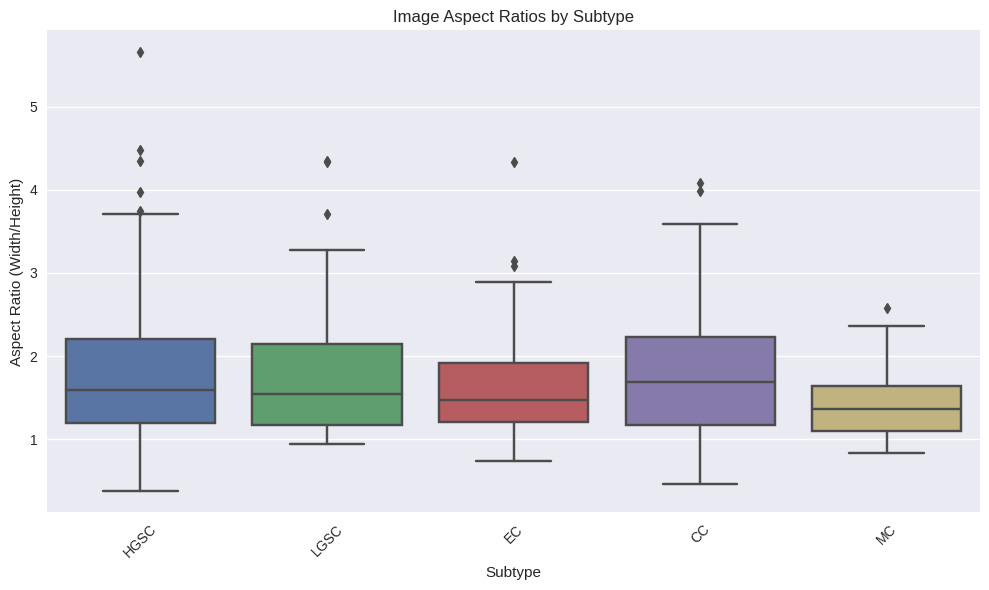


Statistical Summary by Subtype:
      image_width                         image_height                         \
             mean       std   min     max         mean       std   min    max   
label                                                                           
CC       52992.68  21069.16  2964  101254     31205.06  10439.52  2964  49543   
EC       47486.19  19315.68  2964  102100     29935.23  10485.05  2964  48293   
HGSC     48637.69  19250.38  2964  105763     28939.70   9605.10  2964  49215   
LGSC     43519.26  20967.17  2964   79527     24774.68  11954.18  2964  50155   
MC       50193.35  21504.08  2964   91031     34872.98  13589.99  2964  49395   

      is_tma  
         sum  
label         
CC         5  
EC         5  
HGSC       5  
LGSC       5  
MC         5  


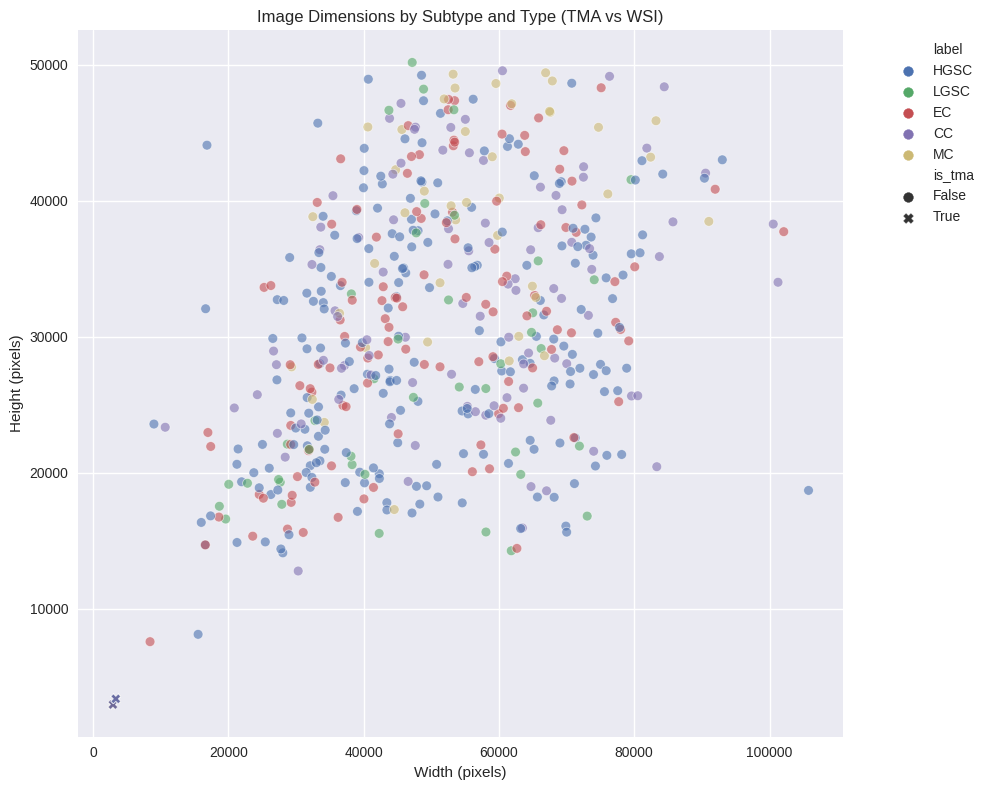

In [7]:
def main():
    # Load the data
    train_df = pd.read_csv('/kaggle/input/UBC-OCEAN/train.csv')
    
    print("Starting Exploratory Data Analysis...")
    print("\nDataset Overview:")
    print(f"Total number of samples: {len(train_df)}")
    print(f"Number of unique subtypes: {train_df['label'].nunique()}")
    print(f"Number of TMA images: {train_df['is_tma'].sum()}")
    print(f"Number of WSI images: {(~train_df['is_tma']).sum()}")
    
    # Perform EDA
    perform_eda(train_df)

if __name__ == "__main__":
    main()

# Outlier Detection Analysis

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [9]:
def detect_outliers(train_df):
    """
    Perform comprehensive outlier detection analysis
    """
    # Create figure for multiple plots
    plt.figure(figsize=(20, 15))
    
    # 1. Z-score based outlier detection for image dimensions
    train_df['width_zscore'] = np.abs(stats.zscore(train_df['image_width']))
    train_df['height_zscore'] = np.abs(stats.zscore(train_df['image_height']))
    
    # 2. Calculate additional features for outlier detection
    train_df['area'] = train_df['image_width'] * train_df['image_height']
    train_df['aspect_ratio'] = train_df['image_width'] / train_df['image_height']
    
    # Plot 1: Area vs Aspect Ratio with outlier boundaries
    plt.subplot(2, 2, 1)
    sns.scatterplot(data=train_df, x='area', y='aspect_ratio', hue='label', alpha=0.6)
    plt.title('Image Area vs Aspect Ratio\nPotential Outliers Detection')
    plt.xlabel('Area (pixels²)')
    plt.ylabel('Aspect Ratio')
    
    # Plot 2: Width vs Height with Outlier Boundaries
    plt.subplot(2, 2, 2)
    sns.scatterplot(data=train_df, x='width_zscore', y='height_zscore', 
                    hue='label', alpha=0.6)
    plt.axhline(y=3, color='r', linestyle='--', alpha=0.3)
    plt.axvline(x=3, color='r', linestyle='--', alpha=0.3)
    plt.title('Z-scores of Width vs Height\nRed lines indicate z-score = 3')
    plt.xlabel('Width Z-score')
    plt.ylabel('Height Z-score')
    
    # Plot 3: Box plot of image areas by subtype
    plt.subplot(2, 2, 3)
    sns.boxplot(data=train_df, x='label', y='area')
    plt.title('Distribution of Image Areas by Subtype')
    plt.xticks(rotation=45)
    plt.ylabel('Area (pixels²)')
    
    # Plot 4: Density plot of aspect ratios
    plt.subplot(2, 2, 4)
    sns.kdeplot(data=train_df, x='aspect_ratio', hue='label')
    plt.title('Density Distribution of Aspect Ratios')
    plt.xlabel('Aspect Ratio')
    
    plt.tight_layout()
    #plt.savefig("outlier.png")
    plt.show()
    
    # Print statistical outliers
    print("\nPotential Outliers Analysis:")
    
    # Z-score based outliers (|z| > 3)
    width_outliers = train_df[train_df['width_zscore'] > 3]
    height_outliers = train_df[train_df['height_zscore'] > 3]
    
    print(f"\nImages with unusual width (Z-score > 3): {len(width_outliers)}")
    print(f"Images with unusual height (Z-score > 3): {len(height_outliers)}")
    
    # IQR based outlier detection for area
    Q1 = train_df['area'].quantile(0.25)
    Q3 = train_df['area'].quantile(0.75)
    IQR = Q3 - Q1
    area_outliers = train_df[(train_df['area'] < (Q1 - 1.5 * IQR)) | 
                            (train_df['area'] > (Q3 + 1.5 * IQR))]
    
    print(f"\nImages with unusual area (IQR method): {len(area_outliers)}")
    
    # Print summary of extreme cases
    print("\nExtreme Cases Summary:")
    extremes = pd.DataFrame({
        'Metric': ['Smallest Area', 'Largest Area', 'Most Square', 'Least Square'],
        'Image ID': [
            train_df.loc[train_df['area'].idxmin(), 'image_id'],
            train_df.loc[train_df['area'].idxmax(), 'image_id'],
            train_df.loc[(train_df['aspect_ratio'] - 1).abs().idxmin(), 'image_id'],
            train_df.loc[(train_df['aspect_ratio'] - 1).abs().idxmax(), 'image_id']
        ],
        'Subtype': [
            train_df.loc[train_df['area'].idxmin(), 'label'],
            train_df.loc[train_df['area'].idxmax(), 'label'],
            train_df.loc[(train_df['aspect_ratio'] - 1).abs().idxmin(), 'label'],
            train_df.loc[(train_df['aspect_ratio'] - 1).abs().idxmax(), 'label']
        ]
    })
    print(extremes)
    
    return width_outliers, height_outliers, area_outliers

Starting Outlier Detection Analysis...


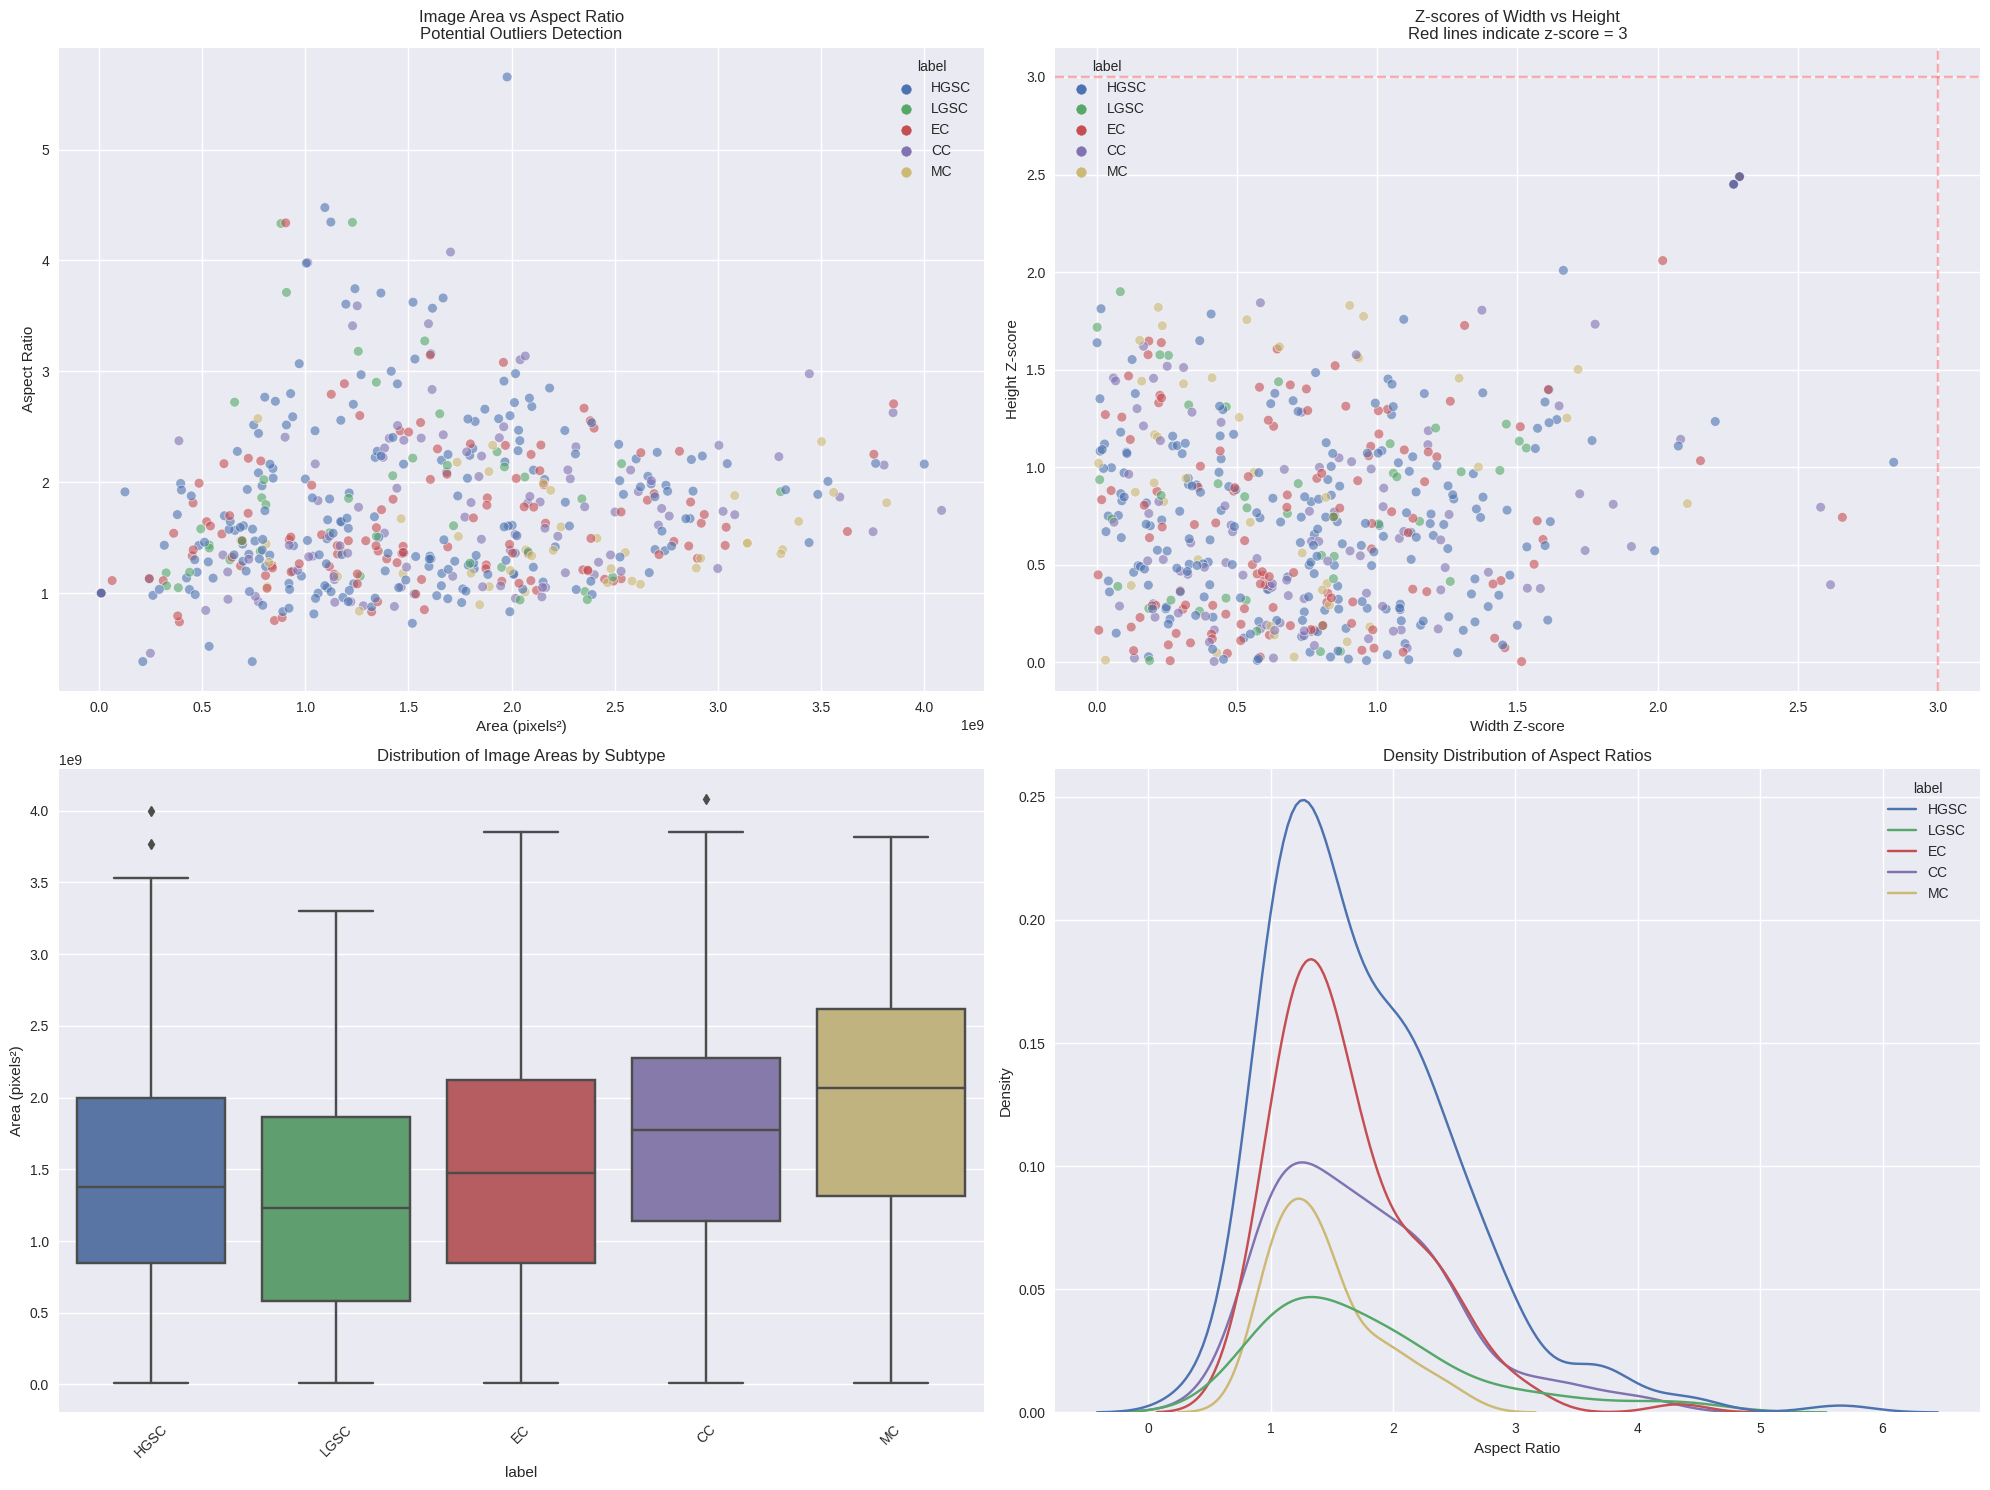


Potential Outliers Analysis:

Images with unusual width (Z-score > 3): 0
Images with unusual height (Z-score > 3): 0

Images with unusual area (IQR method): 2

Extreme Cases Summary:
          Metric  Image ID Subtype
0  Smallest Area      4134      MC
1   Largest Area     51346      CC
2    Most Square        91    HGSC
3   Least Square      5251    HGSC

Total unique outliers detected: 2


In [10]:
def main():
    # Load the data
    train_df = pd.read_csv('/kaggle/input/UBC-OCEAN/train.csv')
    
    print("Starting Outlier Detection Analysis...")
    width_outliers, height_outliers, area_outliers = detect_outliers(train_df)
    
    # Save outlier information for future reference
    outlier_summary = pd.DataFrame({
        'image_id': list(set(width_outliers['image_id'].tolist() + 
                           height_outliers['image_id'].tolist() + 
                           area_outliers['image_id'].tolist())),
        'is_outlier': True
    })
    
    print("\nTotal unique outliers detected:", len(outlier_summary))

if __name__ == "__main__":
    main()

# Class Imblanace Analysis

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def analyze_class_imbalance(train_df):
    """
    Perform comprehensive class imbalance analysis
    """
    # Set style
    plt.style.use('seaborn')
    
    # Create figure for multiple plots
    plt.figure(figsize=(15, 10))
    
    # 1. Class Distribution Plot
    plt.subplot(2, 2, 1)
    class_counts = train_df['label'].value_counts()
    sns.barplot(x=class_counts.index, y=class_counts.values)
    plt.title('Class Distribution')
    plt.xlabel('Subtype')
    plt.ylabel('Count')
    
    # Add count labels on top of bars
    for i, v in enumerate(class_counts.values):
        plt.text(i, v, str(v), ha='center', va='bottom')
    
    # 2. Percentage Distribution
    plt.subplot(2, 2, 2)
    class_percentages = (class_counts / len(train_df) * 100).round(2)
    sns.barplot(x=class_percentages.index, y=class_percentages.values)
    plt.title('Class Distribution (%)')
    plt.xlabel('Subtype')
    plt.ylabel('Percentage')
    
    # Add percentage labels on top of bars
    for i, v in enumerate(class_percentages.values):
        plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')
    
    # 3. Pie Chart
    plt.subplot(2, 2, 3)
    plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
            colors=sns.color_palette('husl', n_colors=len(class_counts)))
    plt.title('Class Distribution (Pie Chart)')
    
    # 4. Imbalance Metrics Table
    plt.subplot(2, 2, 4)
    plt.axis('off')
    
    # Calculate imbalance metrics
    majority_class = class_counts.max()
    minority_class = class_counts.min()
    imbalance_ratio = majority_class / minority_class
    
    metrics_text = (
        f'Imbalance Analysis:\n\n'
        f'Total Samples: {len(train_df)}\n'
        f'Number of Classes: {len(class_counts)}\n'
        f'Majority Class (HGSC): {majority_class}\n'
        f'Minority Class (MC): {minority_class}\n'
        f'Imbalance Ratio: {imbalance_ratio:.2f}:1\n\n'
        f'Class Distribution:\n'
    )
    
    for class_name, percentage in class_percentages.items():
        metrics_text += f'{class_name}: {percentage:.1f}%\n'
    
    plt.text(0.1, 0.9, metrics_text, fontsize=10, va='top')
    
    plt.tight_layout()
    #plt.savefig("class_imbalance.png")
    plt.show()
    
    # Print additional analysis
    print("\nDetailed Class Imbalance Analysis:")
    print("\nClass Counts:")
    print(class_counts)
    
    print("\nClass Percentages:")
    print(class_percentages)
    
    print("\nImbalance Ratios (relative to majority class):")
    imbalance_ratios = majority_class / class_counts
    print(imbalance_ratios)
    
    # Suggest potential strategies
    print("\nRecommended Strategies based on Imbalance:")
    if imbalance_ratio > 4:
        print("- Consider using class weights in model")
        print("- Implement oversampling techniques (e.g., SMOTE) for minority classes")
        print("- Use stratified sampling in train/validation split")
    if imbalance_ratio > 2:
        print("- Use balanced accuracy or F1-score as metrics")
        print("- Consider ensemble methods with balanced class weights")
    
    return class_counts, class_percentages, imbalance_ratio

Starting Class Imbalance Analysis...


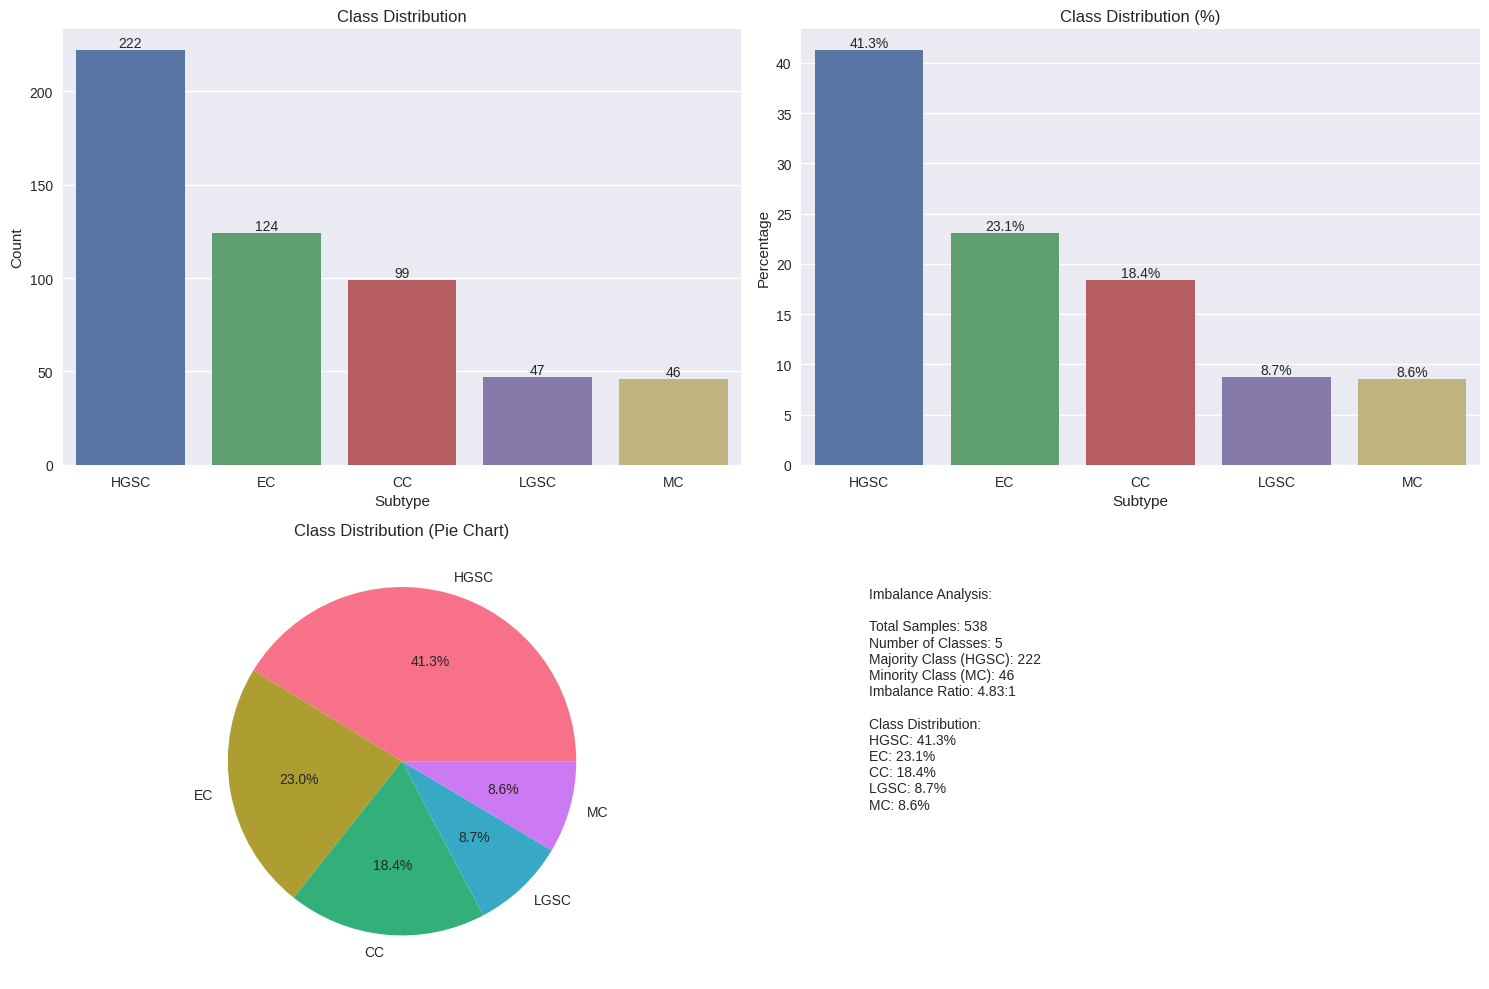


Detailed Class Imbalance Analysis:

Class Counts:
label
HGSC    222
EC      124
CC       99
LGSC     47
MC       46
Name: count, dtype: int64

Class Percentages:
label
HGSC    41.26
EC      23.05
CC      18.40
LGSC     8.74
MC       8.55
Name: count, dtype: float64

Imbalance Ratios (relative to majority class):
label
HGSC    1.000000
EC      1.790323
CC      2.242424
LGSC    4.723404
MC      4.826087
Name: count, dtype: float64

Recommended Strategies based on Imbalance:
- Consider using class weights in model
- Implement oversampling techniques (e.g., SMOTE) for minority classes
- Use stratified sampling in train/validation split
- Use balanced accuracy or F1-score as metrics
- Consider ensemble methods with balanced class weights


In [13]:
def main():
    # Load the data
    train_df = pd.read_csv('/kaggle/input/UBC-OCEAN/train.csv')
    
    print("Starting Class Imbalance Analysis...")
    class_counts, class_percentages, imbalance_ratio = analyze_class_imbalance(train_df)

if __name__ == "__main__":
    main()

# Data Preprocessing and Data Preparation Pipeline

In [14]:
!pip install -q -U albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.6/289.6 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.7/632.7 kB 24.3 MB/s eta 0:00:00


In [15]:
!pip install -q tiatoolbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 54.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.9/227.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 83.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 72.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 MB 38.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 27.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 88.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 69.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 33.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.2/228.2 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [16]:
import numpy as np
import pandas as pd
import cv2
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from typing import List, Tuple, Dict, Optional
from collections import Counter
import albumentations as A
from imblearn.over_sampling import SMOTE
from scipy.ndimage import gaussian_filter
from torchvision import transforms as T
from torchvision.transforms import InterpolationMode
from torchvision import transforms
import torchvision.models as models
from tiatoolbox import logger
from tiatoolbox.tools import stainnorm, patchextraction
from tiatoolbox.tools.stainaugment import StainAugmentor
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from torch.utils.data import WeightedRandomSampler
from tqdm import tqdm
import PIL.Image
import gc
import warnings
warnings.filterwarnings("ignore")

In [17]:
class EnhancedPreprocessor:
    def __init__(self,
                 target_size: Tuple[int, int] = (224, 224), 
                 wsi_magnification: float = 20.0,
                 tma_magnification: float = 40.0,
                 stain_norm_method: str = 'reinhard'):
        self.target_size = target_size
        self.wsi_magnification = wsi_magnification
        self.tma_magnification = tma_magnification
        
        # Initialize stain normalizer
        if stain_norm_method == 'macenko':
            self.normalizer = stainnorm.MacenkoNormalizer()
        elif stain_norm_method == 'vahadane':
            self.normalizer = stainnorm.VahadaneNormalizer()
        elif stain_norm_method == 'reinhard':
            self.normalizer = stainnorm.ReinhardNormalizer()
        elif stain_norm_method == 'ruifrok':
            self.normalizer = stainnorm.RuifrokNormalizer()
        else:
            raise ValueError(f"Unknown stain normalization method: {stain_norm_method}")

    def detect_image_type(self, image: np.ndarray) -> str:
        """Determine if image is WSI or TMA based on size"""
        height, width = image.shape[:2]
        if height <= 5000 and width <= 5000:
            return 'TMA'
        return 'WSI'
    
    def normalize_magnification(self, image: np.ndarray, image_type: str) -> np.ndarray:
        """Normalize image magnification"""
        if image_type == 'TMA':
            scale_factor = self.wsi_magnification / self.tma_magnification
            new_size = (int(image.shape[1] * scale_factor), 
                       int(image.shape[0] * scale_factor))
            return cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)
        return image

    def apply_stain_normalization(self, image: np.ndarray) -> np.ndarray:
        """Apply stain normalization with error handling"""
        try:
            self.normalizer.fit(image)
            normalized = self.normalizer.transform(image)
            return normalized
        except Exception as e:
            print(f"Error in stain normalization: {str(e)}")
            return image  # Return original image if normalization fails

    def detect_tissue(self, image: np.ndarray) -> np.ndarray:
        """Improved tissue detection using LAB color space and adaptive thresholding"""
        # Convert to LAB color space
        lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
        l_channel = lab[:, :, 0]
        
        # Adaptive thresholding
        mask = cv2.adaptiveThreshold(
            l_channel, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 11, 2
        )
        
        # Morphological operations
        kernel = np.ones((5, 5), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        
        return mask > 0

    def extract_tissue_region(self, image: np.ndarray) -> np.ndarray:
        """Extract main tissue region"""
        try:
            # Get tissue mask
            tissue_mask = self.detect_tissue(image)
            
            # Find contours
            contours, _ = cv2.findContours(tissue_mask.astype(np.uint8), 
                                         cv2.RETR_EXTERNAL, 
                                         cv2.CHAIN_APPROX_SIMPLE)
            
            if not contours:
                return image
            
            # Find largest contour
            largest_contour = max(contours, key=cv2.contourArea)
            x, y, w, h = cv2.boundingRect(largest_contour)
            
            # Extract region with padding
            pad = 10
            x_start = max(0, x - pad)
            y_start = max(0, y - pad)
            x_end = min(image.shape[1], x + w + pad)
            y_end = min(image.shape[0], y + h + pad)
            
            return image[y_start:y_end, x_start:x_end]
            
        except Exception as e:
            print(f"Error in tissue extraction: {str(e)}")
            return image

    def handle_image_dimensions(self, image: np.ndarray) -> np.ndarray:
        """Handle different image dimensions based on size"""
        height, width = image.shape[:2]
        
        # Handle very large WSIs
        if width > 50000 or height > 50000:
            scale_factor = min(50000 / width, 50000 / height)
            new_width = int(width * scale_factor)
            new_height = int(height * scale_factor)
            print(f"Resizing large WSI from {width}x{height} to {new_width}x{new_height}")
            return cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
        
        return image

    def preprocess_image(self, image: np.ndarray) -> np.ndarray:
        """Complete preprocessing pipeline"""
        try:
            # Handle large image dimensions first
            image = self.handle_image_dimensions(image)
            
            # Determine image type
            image_type = self.detect_image_type(image)
            
            # Normalize magnification
            image = self.normalize_magnification(image, image_type)
            
            # Extract tissue region
            image = self.extract_tissue_region(image)
            
            # Apply stain normalization
            image = self.apply_stain_normalization(image)
            
            # Resize to target size
            image = cv2.resize(image, self.target_size, interpolation=cv2.INTER_AREA)
            
            return image

        except Exception as e:
            print(f"Error in preprocessing: {str(e)}")
            # Return resized original image as fallback
            return cv2.resize(image, self.target_size, interpolation=cv2.INTER_AREA)

In [18]:
def create_transforms(image_size: Tuple[int, int] = (224, 224), stain_augment_prob: float = 0.5):
    """Create augmentation transforms with advanced techniques"""
    train_transform = A.Compose([
        A.Resize(height=image_size[0], width=image_size[1], always_apply=True),
        # Color augmentations
        A.OneOf([
            A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=1.0),
            A.RandomGamma(p=1.0)
        ], p=0.5),
        # Geometric augmentations
        A.OneOf([
            A.ElasticTransform(p=0.5),
            A.GridDistortion(p=0.5),
            A.OpticalDistortion(p=0.5)
        ], p=0.3),
        # Cutout augmentation
        A.CoarseDropout(max_holes=8, max_height=16, max_width=16, p=0.5),
        # Basic transforms
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.5)
    ])
    
    val_transform = A.Compose([
        A.Resize(height=image_size[0], width=image_size[1], always_apply=True)
    ])
    
    return train_transform, val_transform
    

In [19]:
class HistoDataset(Dataset):
    """Enhanced dataset with robust preprocessing"""
    def __init__(self, df: pd.DataFrame, image_dir: str,
                 transform: Optional[transforms.Compose] = None,
                 is_training: bool = True,
                 apply_smote: bool = True,
                 stain_norm_method: str = 'reinhard'):
        
        self.df = df.copy()  # Make a copy to prevent modifications
        self.image_dir = image_dir
        self.transform = transform
        self.is_training = is_training
        self.apply_smote = apply_smote and is_training
        
        # Verify required columns exist
        required_columns = ['image_id', 'encoded_label']
        if not all(col in self.df.columns for col in required_columns):
            raise ValueError(f"DataFrame must contain columns: {required_columns}")
        
        # Initialize enhanced preprocessor
        self.preprocessor = EnhancedPreprocessor(
            stain_norm_method=stain_norm_method
        )
        
        # Load and preprocess images
        print("Loading and preprocessing images...")
        self._load_images()
        
        if self.apply_smote and len(self.processed_images) > 0:
            self._apply_smote_preprocessing()
    
    def _load_images(self):
        """Load and preprocess all images"""
        valid_indices = []
        self.processed_images = []
        self.labels = []
        
        for idx in tqdm(range(len(self.df)), desc="Processing images"):
            try:
                image_path = os.path.join(self.image_dir,
                                        f"{self.df.iloc[idx]['image_id']}_thumbnail.png")
                if os.path.exists(image_path):
                    # Load image
                    image = cv2.imread(image_path)
                    if image is None:
                        print(f"Warning: Could not read image - {image_path}")
                        continue
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    
                    # Preprocess image
                    processed_image = self.preprocessor.preprocess_image(image)
                    
                    self.processed_images.append(processed_image)
                    valid_indices.append(idx)
                    self.labels.append(self.df.iloc[idx]['encoded_label'])
                else:
                    print(f"Warning: Image not found - {image_path}")
            
            except Exception as e:
                print(f"Error processing image at index {idx}: {str(e)}")
                continue
        
        if len(valid_indices) == 0:
            raise ValueError("No valid images were loaded")
            
        self.df = self.df.iloc[valid_indices].reset_index(drop=True)
        self.labels = np.array(self.labels)
        
        print(f"Successfully processed {len(self.processed_images)} images")

    def _apply_smote_preprocessing(self):
        """Apply Borderline-SMOTE and random undersampling"""
        print("\nApplying SMOTE and undersampling...")
        print("Class distribution before resampling:")
        print(self.df['label'].value_counts())
        
        # Reshape images for SMOTE
        features = [img.reshape(-1) for img in self.processed_images]
        features = np.array(features)
        
        # Define resampling pipeline
        smote = BorderlineSMOTE(random_state=42)
        under = RandomUnderSampler(random_state=42)
        pipeline = Pipeline([('smote', smote), ('under', under)])
        
        # Apply resampling
        features_resampled, labels_resampled = pipeline.fit_resample(features, self.labels)
        
        # Reconstruct images
        self.images = [feat.reshape(self.preprocessor.target_size[0], 
                                  self.preprocessor.target_size[1], 3) 
                      for feat in features_resampled]
        
        # Create new balanced dataframe
        new_data = []
        for idx, label in enumerate(labels_resampled):
            new_data.append({
                'image_id': f'synthetic_{idx}' if idx >= len(self.df) else self.df.iloc[idx]['image_id'],
                'label': self.df['label'].unique()[label],
                'encoded_label': label,
                'is_synthetic': idx >= len(self.df)
            })
        
        self.df = pd.DataFrame(new_data)
        print("\nClass distribution after resampling:")
        print(self.df['label'].value_counts())

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        try:
            if hasattr(self, 'images'):  # If SMOTE was applied
                image = self.images[idx]
                label = self.df.iloc[idx]['encoded_label']
            else:  # Original image loading
                image = self.processed_images[idx]
                label = self.labels[idx]
            
            if self.transform:
                transformed = self.transform(image=image)
                image = transformed['image']
            
            # Convert to tensor
            image = torch.from_numpy(image.transpose(2, 0, 1)).float() / 255.0
            label = torch.tensor(label, dtype=torch.long)
            
            return image, label
            
        except Exception as e:
            print(f"Error loading image at index {idx}: {str(e)}")
            return torch.zeros((3, 224, 224)), torch.tensor(0)

In [20]:
def prepare_data(df: pd.DataFrame, image_dir: str, batch_size: int = 32):
    """Prepare data loaders with TIAToolbox preprocessing"""
    try:
        # Create label encodings
        label_encoder = {'HGSC': 0, 'EC': 1, 'CC': 2, 'LGSC': 3, 'MC': 4}
        df['encoded_label'] = df['label'].map(label_encoder)
        
        # Stratified split
        train_df, val_df = train_test_split(
            df,
            test_size=0.2,
            stratify=df['label'],
            random_state=42
        )
        
        # Create transforms
        train_transform, val_transform = create_transforms(image_size=(224, 224), stain_augment_prob=0.5 )
        
        print("Creating training dataset...")
        train_dataset = HistoDataset(
            df=train_df,
            image_dir=image_dir,
            transform=train_transform,
            is_training=True,
            apply_smote=True,
            stain_norm_method='reinhard',# try 'macenko' or 'reinhard' or 'ruifrok'
        )
        
        print("\nCreating validation dataset...")
        val_dataset = HistoDataset(
            df=val_df,
            image_dir=image_dir,
            transform=val_transform,
            is_training=False,
            apply_smote=False,
            stain_norm_method='reinhard',
        )
        
        # Create data loaders
        train_loader = DataLoader(
            train_dataset,
            batch_size=batch_size,
            shuffle=True,
            num_workers=0,
            pin_memory=True
        )
        
        val_loader = DataLoader(
            val_dataset,
            batch_size=batch_size,
            shuffle=False,
            num_workers=0,
            pin_memory=True
        )
        
        return train_loader, val_loader
        
    except Exception as e:
        print(f"Error in prepare_data: {str(e)}")
        raise


In [21]:
def show_sample_images(loader):
    """Display sample images from the data loader"""
    plt.figure(figsize=(15, 5))
    images, labels = next(iter(loader))
    for i in range(min(5, len(images))):
        plt.subplot(1, 5, i + 1)
        img = images[i].numpy().transpose(1, 2, 0)
        img = np.clip(img, 0, 1)
        plt.imshow(img)
        plt.title(f'Label: {labels[i].item()}')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig("preprocessing.png")
    plt.show()

In [22]:
def test_stain_normalization():
    image = cv2.imread("/kaggle/input/UBC-OCEAN/train_thumbnails/10077_thumbnail.png")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    preprocessor = EnhancedPreprocessor(stain_norm_method='reinhard')
    normalized_image = preprocessor.apply_stain_normalization(image)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(normalized_image)
    plt.title("Normalized Image")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

#if __name__ == "__main__":
    #test_stain_normalization()

In [23]:
def test_tissue_detection():
    image = cv2.imread("/kaggle/input/UBC-OCEAN/train_thumbnails/10896_thumbnail.png")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    preprocessor = EnhancedPreprocessor()
    tissue_mask = preprocessor.detect_tissue(image)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(tissue_mask, cmap='gray')
    plt.title("Tissue Mask")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

#if __name__ == "__main__":
    #test_tissue_detection()

In [24]:
def test_data_augmentation():
    image = cv2.imread("/kaggle/input/UBC-OCEAN/train_thumbnails/12222_thumbnail.png")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    train_transform, _ = create_transforms()
    augmented = train_transform(image=image)['image']
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(augmented)
    plt.title("Augmented Image")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

#if __name__ == "__main__":
    #test_data_augmentation()

In [25]:
def test_smote_undersampling():
    """Test SMOTE and undersampling with proper label encoding"""
    try:
        # Load data
        df = pd.read_csv('/kaggle/input/UBC-OCEAN/train.csv')
        image_dir = '/kaggle/input/UBC-OCEAN/train_thumbnails'
        
        # Add label encoding
        label_encoder = {'HGSC': 0, 'EC': 1, 'CC': 2, 'LGSC': 3, 'MC': 4}
        df['encoded_label'] = df['label'].map(label_encoder)
        
        print("Initial class distribution:")
        print(df['label'].value_counts())
        
        # Create dataset with SMOTE
        dataset = HistoDataset(
            df=df,
            image_dir=image_dir,
            transform=None,
            is_training=True,
            apply_smote=True
        )
        
        print("\nFinal class distribution after SMOTE:")
        print(dataset.df['label'].value_counts())
        
    except Exception as e:
        print(f"Error in test_smote_undersampling: {str(e)}")


#if __name__ == "__main__":
    #test_smote_undersampling()


In [26]:
def main():
    """Main function to prepare and store data loaders in global scope"""
    try:
        # Load data
        df = pd.read_csv('/kaggle/input/UBC-OCEAN/train.csv')
        image_dir = '/kaggle/input/UBC-OCEAN/train_thumbnails'
        
        print("Initial class distribution:")
        print(df['label'].value_counts())
        
        # Create data loaders with full pipeline and store in global scope
        global train_loader, val_loader
        train_loader, val_loader = prepare_data(df, image_dir)
        
        # Test batch loading
        images, labels = next(iter(train_loader))
        print(f"\nBatch shapes:")
        print(f"Images: {images.shape}")
        print(f"Labels: {labels.shape}")
        
        print("\nClass distribution in batch:")
        print(pd.Series(labels.numpy()).value_counts())
        
        # Show sample images
        print("\nDisplaying sample processed images:")
        show_sample_images(train_loader)
        
        # Memory cleanup
        gc.collect()
        torch.cuda.empty_cache()
        
    except Exception as e:
        print(f"Error in main: {str(e)}")
        # Memory cleanup even if there's an error
        gc.collect()
        torch.cuda.empty_cache()

#if __name__ == "__main__":
    #main()

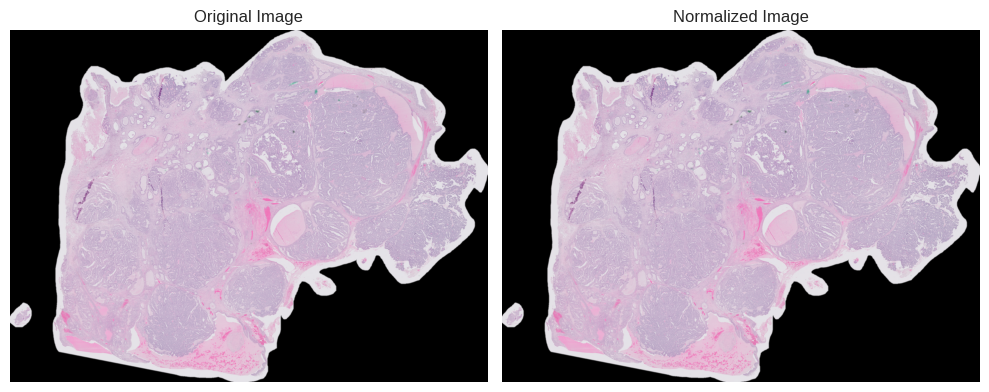

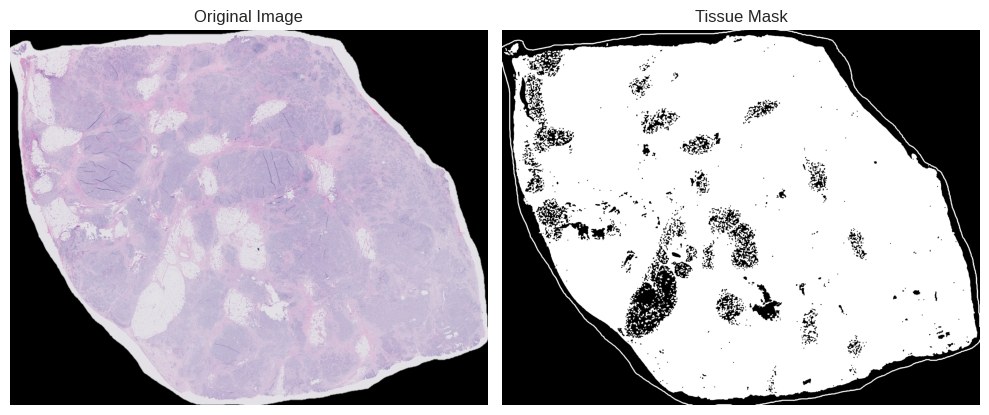

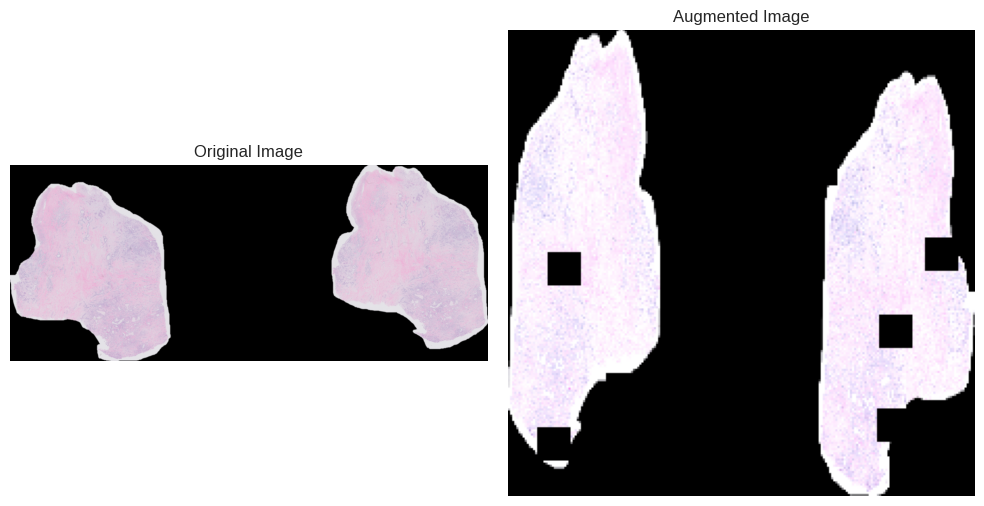

Initial class distribution:
label
HGSC    222
EC      124
CC       99
LGSC     47
MC       46
Name: count, dtype: int64
Creating training dataset...
Loading and preprocessing images...


Processing images:   2%|▏         | 7/430 [00:01<01:41,  4.17it/s]

Processing images:   4%|▎         | 16/430 [00:05<03:33,  1.94it/s]

Processing images:  10%|▉         | 41/430 [00:11<01:10,  5.52it/s]

Processing images:  16%|█▌        | 67/430 [00:19<02:13,  2.73it/s]

Processing images:  17%|█▋        | 73/430 [00:21<01:43,  3.43it/s]

Processing images:  33%|███▎      | 142/430 [00:43<00:50,  5.68it/s]

Processing images:  39%|███▊      | 166/430 [00:52<00:52,  5.07it/s]

Processing images:  40%|████      | 174/430 [00:54<01:11,  3.57it/s]

Processing images:  44%|████▍     | 191/430 [00:59<01:13,  3.27it/s]

Processing images:  53%|█████▎    | 228/430 [01:11<00:41,  4.91it/s]

Processing images:  62%|██████▏   | 267/430 [01:23<00:46,  3.50it/s]

Processing images:  69%|██████▊   | 295/430 [01:30<00:22,  6.00it/s]

Processing images:  70%|███████   | 301/430 [01:32<00:42,  3.07it/s]

Processing images:  73%|███████▎  | 316/430 [01:38<00:43,  2.63it/s]

Processing images:  80%|████████  | 345/430 [01:48<00:31,  2.73it/s]

Processing images:  90%|█████████ | 389/430 [02:03<00:17,  2.30it/s]

Processing images:  95%|█████████▍| 408/430 [02:08<00:09,  2.37it/s]

Processing images:  97%|█████████▋| 415/430 [02:11<00:07,  2.07it/s]

Processing images: 100%|██████████| 430/430 [02:15<00:00,  3.16it/s]


Successfully processed 411 images

Applying SMOTE and undersampling...
Class distribution before resampling:
label
HGSC    174
EC       95
CC       77
LGSC     33
MC       32
Name: count, dtype: int64

Class distribution after resampling:
label
HGSC    174
EC      174
CC      174
LGSC    174
MC      174
Name: count, dtype: int64

Creating validation dataset...
Loading and preprocessing images...


Processing images:  41%|████      | 44/108 [00:14<00:23,  2.67it/s]

Processing images:  49%|████▉     | 53/108 [00:18<00:20,  2.71it/s]

Processing images:  63%|██████▎   | 68/108 [00:26<00:47,  1.18s/it]

Processing images:  89%|████████▉ | 96/108 [00:34<00:03,  3.35it/s]

Processing images:  91%|█████████ | 98/108 [00:35<00:02,  4.17it/s]

Processing images: 100%|██████████| 108/108 [00:38<00:00,  2.78it/s]


Successfully processed 102 images

Batch shapes:
Images: torch.Size([32, 3, 224, 224])
Labels: torch.Size([32])

Class distribution in batch:
3    12
2     7
4     6
0     5
1     2
Name: count, dtype: int64

Displaying sample processed images:


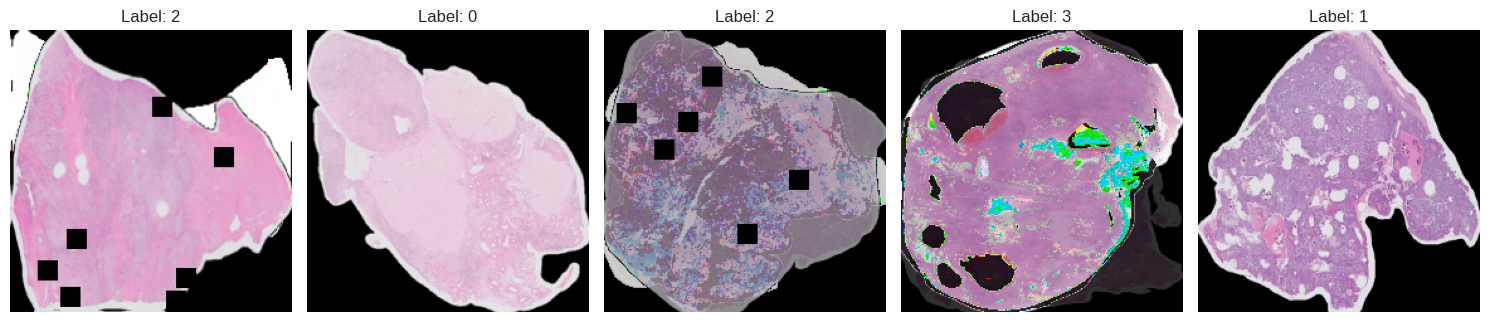

In [27]:
if __name__ == "__main__":
    # Test preprocessing components
    test_stain_normalization()
    test_tissue_detection()
    test_data_augmentation()

    main()

# Model Development

In [28]:
from tiatoolbox.models.architecture import vanilla
from torchvision import models, transforms
from torch import nn
import torch
import torch.nn.functional as F
from pathlib import Path
import logging
from typing import Dict, Optional
import timm
import PIL.Image
from typing import Optional, Union, Dict
from tiatoolbox.models.models_abc import ModelABC
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
from torchvision.models import efficientnet_b3, EfficientNet_B3_Weights
from torchvision.models import resnet101, ResNet101_Weights
from torchvision.models import resnet152, ResNet152_Weights
from tiatoolbox.models.engine.patch_predictor import PatchPredictor, IOPatchPredictorConfig
import gc
import math
import traceback
import warnings
warnings.filterwarnings("ignore")

In [29]:
class HistoPathModel(nn.Module):
    def __init__(self, num_classes=5):
        super().__init__()
        # Initialize both backbones
        self.resnet = resnet101(weights=ResNet101_Weights.DEFAULT)
        self.efficientnet = efficientnet_b3(weights=EfficientNet_B3_Weights.DEFAULT)
        
        # Remove original classifier layers
        self.resnet.fc = nn.Identity()
        self.efficientnet.classifier = nn.Identity()
        
        # Get feature dimensions
        self.resnet_dim = 2048  # ResNet101's output dimension
        self.efficient_dim = 1536  # EfficientNet-B3's output dimension
        self.feature_dim = 512
        
        # Calculate combined features dimension for ResNet
        # Global features (2048) + 3 processors (512 each) = 3584
        self.combined_resnet_dim = self.resnet_dim + (512 * 3)
        
        # Feature reduction layers
        self.resnet_reducer = nn.Sequential(
            nn.Linear(self.combined_resnet_dim, self.feature_dim),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        
        self.efficient_reducer = nn.Sequential(
            nn.Linear(self.efficient_dim, self.feature_dim * 2),
            nn.BatchNorm1d(self.feature_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(self.feature_dim * 2, self.feature_dim)
        )
        
        # Modify first conv layer for histology images
        self.resnet.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        
        # Spatial attention module
        self.spatial_attention = nn.Sequential(
            nn.Conv2d(2048, 512, kernel_size=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 1, kernel_size=1),
            nn.Sigmoid()
        )
        
        # Channel attention module
        self.channel_attention = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(2048, 512, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(512, 2048, kernel_size=1),
            nn.Sigmoid()
        )
        # Add channel attention for EfficientNet
        self.efficient_channel_attention = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(1536, 512, kernel_size=1),  # 1536 for EfficientNet-B3
            nn.ReLU(),
            nn.Conv2d(512, 1536, kernel_size=1),
            nn.Sigmoid()
        )

        # Add fusion attention
        self.fusion_attention = nn.Sequential(
            nn.Linear(self.feature_dim, self.feature_dim // 16),
            nn.ReLU(),
            nn.Linear(self.feature_dim // 16, self.feature_dim),
            nn.Sigmoid()
        )

                
        # Feature processors for ResNet features
        self.feature_processors = nn.ModuleList([
            nn.Sequential(
                nn.Conv2d(2048, 512, 1),
                nn.BatchNorm2d(512),
                nn.ReLU()
            ),
            nn.Sequential(
                nn.Conv2d(2048, 512, 3, padding=1),
                nn.BatchNorm2d(512),
                nn.ReLU()
            ),
            nn.Sequential(
                nn.Conv2d(2048, 512, 5, padding=2),
                nn.BatchNorm2d(512),
                nn.ReLU()
            )
        ])
        
        self.feature_fusion = nn.Sequential(
            nn.Linear(self.feature_dim * 2, self.feature_dim * 2),
            nn.LayerNorm(self.feature_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.2),  # Reduced dropout for stability
            nn.Linear(self.feature_dim * 2, self.feature_dim * 2),
            nn.LayerNorm(self.feature_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(self.feature_dim * 2, self.feature_dim)
        )
    
  
        # Add feature gates
        self.feature_gates = nn.Sequential(
            nn.Linear(self.feature_dim * 2, 2),
            nn.Softmax(dim=1)
        )

    
        # Add a squeeze-excitation block
        self.se_block = nn.Sequential(
            nn.Linear(self.feature_dim, self.feature_dim // 16),
            nn.ReLU(),
            nn.Linear(self.feature_dim // 16, self.feature_dim),
            nn.Sigmoid()
         )
    
        
        # Self-attention for global context
        self.self_attention = nn.MultiheadAttention(
            embed_dim=self.feature_dim,
            num_heads=8,
            dropout=0.1,
            batch_first=True
        )
        
        # Main classifier
        self.main_classifier = nn.Sequential(
            nn.Linear(self.feature_dim, self.feature_dim),
            nn.LayerNorm(self.feature_dim),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(self.feature_dim, num_classes)
        )
        
        # Auxiliary classifier
        self.aux_classifier = nn.Sequential(
            nn.Linear(self.feature_dim, self.feature_dim),
            nn.LayerNorm(self.feature_dim),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(self.feature_dim, num_classes)
        )

    def extract_resnet_features(self, x):
        # Initial layers
        x = self.resnet.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.resnet.maxpool(x)
        
        # ResNet blocks
        x = self.resnet.layer1(x)
        x = self.resnet.layer2(x)
        x = self.resnet.layer3(x)
        x = self.resnet.layer4(x)  # Shape: [B, 2048, H, W]
        
        # Apply attention
        spatial_weights = self.spatial_attention(x)
        channel_weights = self.channel_attention(x)
        attended_features = x * spatial_weights * channel_weights
        
        # Global features
        global_features = F.adaptive_avg_pool2d(attended_features, 1).flatten(1)
        
        # Process features through each processor
        processed_features = []
        for processor in self.feature_processors:
            features = processor(attended_features)
            pooled = F.adaptive_avg_pool2d(features, 1).flatten(1)
            processed_features.append(pooled)
        
        # Concatenate global and processed features
        combined_features = torch.cat([global_features] + processed_features, dim=1)
        
        # Reduce features
        return self.resnet_reducer(combined_features)

    def extract_efficient_features(self, x):
        features = self.efficientnet.features(x)
    
        # Apply channel attention
        channel_weights = self.efficient_channel_attention(features)
        features = features * channel_weights
    
        features = self.efficientnet.avgpool(features)
        features = torch.flatten(features, 1)
        return self.efficient_reducer(features)
    

    def extract_features(self, x):
        resnet_features = self.extract_resnet_features(x)
        torch.cuda.empty_cache()
    
        efficient_features = self.extract_efficient_features(x)
        torch.cuda.empty_cache()
    
        combined_features = torch.cat([resnet_features, efficient_features], dim=1)
        fused_features = self.feature_fusion(combined_features)
    
        # Residual connection
        if hasattr(self, 'feature_gates'):
            gates = self.feature_gates(combined_features)
            residual = resnet_features * gates[:, 0].unsqueeze(1) + efficient_features * gates[:, 1].unsqueeze(1)
            fused_features = fused_features + residual
    
        
        # Apply self-attention with gradient clipping
        attended_features, _ = self.self_attention(
            fused_features.unsqueeze(1),
            fused_features.unsqueeze(1),
            fused_features.unsqueeze(1)
        )
        
        return fused_features + 0.1 * attended_features.squeeze(1)
        
    
    def forward(self, x):
        # Extract combined features
        features = self.extract_features(x)
        
        if self.training:
            # During training, return both main and auxiliary outputs
            main_logits = self.main_classifier(features)
            aux_logits = self.aux_classifier(features)
            return main_logits, aux_logits
        else:
            # During inference, only return main classifier output
            return self.main_classifier(features)

    def __del__(self):
        # Clean up CUDA memory
        torch.cuda.empty_cache()

In [30]:
def create_model(device, learning_rate=5e-4):
    """Create model and associated components."""
    # Create enhanced model
    model = HistoPathModel(num_classes=5)
    model = model.to(device)
    
    # Create predictor configuration
    wsi_config = IOPatchPredictorConfig(
        input_resolutions=[{"units": "mpp", "resolution": 0.5}],
        patch_input_shape=[224, 224],
        stride_shape=[224, 224]
    )
    
    # Create patch predictor
    predictor = PatchPredictor(
        model=model,
        batch_size=32,
        num_loader_workers=4
    )
    
    # Loss function with class weights
    #class_weights = torch.tensor([1.0, 1.8, 2.2, 4.7, 4.8]).to(device)
    class_weights = torch.tensor([1.2, 2.0, 2.4, 4.8, 4.9]).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    
    # Optimizer with weight decay
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=learning_rate,
        weight_decay=0.01
    )
    
    # Learning rate scheduler
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=learning_rate,
        steps_per_epoch=28,
        epochs=50,
        pct_start=0.3,
        div_factor=10,
        final_div_factor=100
    )
    
    return model, criterion, optimizer, scheduler, predictor, wsi_config

In [31]:
def main():
    """Main function to test model architecture"""
    try:
        print("Testing Model Architecture...")
        
        # Set device
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {device}")
        
        # Create model and get all components
        model, criterion, optimizer, scheduler, predictor, wsi_config = create_model(
            device, learning_rate=5e-4)
        
        # Print model parameters
        total_params = sum(p.numel() for p in model.parameters())
        trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        
        print("\nModel Parameters:")
        print(f"Total: {total_params:,}")
        print(f"Trainable: {trainable_params:,}")
        
        # Test forward pass
        batch_size = 4
        x = torch.randn(batch_size, 3, 224, 224).to(device)
        
        print(f"\nInput shape: {x.shape}")
        
        # Set model to eval mode for testing
        model.eval()
        with torch.no_grad():
            outputs = model(x)
            if isinstance(outputs, tuple):
                main_logits = outputs[0]  # Get main classifier output
                probs = F.softmax(main_logits, dim=1)
                print(f"Output shape: {main_logits.shape}")
                
                # Print mean probabilities for each class
                mean_probs = probs.mean(dim=0)
                print("\nMean class probabilities:")
                for i, p in enumerate(mean_probs):
                    print(f"Class {i}: {p:.4f}")
            else:
                print(f"Output shape: {outputs.shape}")
        
        print("\nChecking PatchPredictor configuration:")
        print(f"Batch size: {predictor.batch_size}")
        print(f"WSI config input shape: {wsi_config.patch_input_shape}")
        
        print("\nModel architecture test completed successfully!")
        
        # Clean up
        del model, predictor
        gc.collect()
        torch.cuda.empty_cache()
        
    except Exception as e:
        print(f"Error in model test: {str(e)}")
        traceback.print_exc()
        
        # Clean up even if there's an error
        try:
            del model, predictor
            gc.collect()
            torch.cuda.empty_cache()
        except:
            pass

if __name__ == "__main__":
    main()

Testing Model Architecture...
Using device: cuda


Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to /root/.cache/torch/hub/checkpoints/resnet101-cd907fc2.pth
100%|██████████| 171M/171M [00:00<00:00, 188MB/s] 
Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-b3899882.pth
100%|██████████| 47.2M/47.2M [00:00<00:00, 200MB/s]



Model Parameters:
Total: 102,842,549
Trainable: 102,842,549

Input shape: torch.Size([4, 3, 224, 224])
Output shape: torch.Size([4, 5])

Checking PatchPredictor configuration:
Batch size: 32
WSI config input shape: [224, 224]

Model architecture test completed successfully!


# Training Pipeline

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, balanced_accuracy_score
import numpy as np
import pandas as pd
from typing import Dict, List, Tuple
import gc
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [33]:
class MetricTracker:
    """Track training metrics"""
    def __init__(self):
        self.reset()
    
    def reset(self):
        self.metrics = {
            'loss': [],
            'acc': [],
            'balanced_acc': [],
            'val_loss': [],
            'val_acc': [],
            'val_balanced_acc': [],
            'best_val_acc': 0.0,
            'best_val_balanced_acc': 0.0
        }
    
    def update(self, phase: str, loss: float, acc: float, balanced_acc: float):
        if phase == 'train':
            self.metrics['loss'].append(loss)
            self.metrics['acc'].append(acc)
            self.metrics['balanced_acc'].append(balanced_acc)
        else:
            self.metrics['val_loss'].append(loss)
            self.metrics['val_acc'].append(acc)
            self.metrics['val_balanced_acc'].append(balanced_acc)
            if acc > self.metrics['best_val_acc']:
                self.metrics['best_val_acc'] = acc
            if balanced_acc > self.metrics['best_val_balanced_acc']:
                self.metrics['best_val_balanced_acc'] = balanced_acc
    
    def get_best_metrics(self) -> Dict:
        return {
            'best_val_acc': self.metrics['best_val_acc'],
            'best_val_balanced_acc': self.metrics['best_val_balanced_acc'],
            'best_epoch_val_loss': min(self.metrics['val_loss']) if self.metrics['val_loss'] else float('inf'),
            'best_epoch_val_acc': max(self.metrics['val_acc']) if self.metrics['val_acc'] else 0,
            'best_epoch_val_balanced_acc': max(self.metrics['val_balanced_acc']) if self.metrics['val_balanced_acc'] else 0
        }

In [34]:
class Trainer:
    def __init__(self, model, train_loader, val_loader, device, criterion,
                 optimizer, scheduler, predictor, wsi_config, epochs=50,
                 save_dir='./model_checkpoints'):
        self.model = model
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.device = device
        self.criterion = criterion
        self.optimizer = optimizer
        self.scheduler = scheduler
        self.predictor = predictor
        self.wsi_config = wsi_config
        self.epochs = epochs
        self.save_dir = save_dir
        self.tracker = MetricTracker()
        
        os.makedirs(save_dir, exist_ok=True)
    
    def compute_loss(self, main_logits, aux_logits, labels):
        """Compute combined loss from main and auxiliary outputs"""
        # Main classification loss
        main_loss = self.criterion(main_logits, labels)
        
        # Auxiliary classification loss
        aux_loss = self.criterion(aux_logits, labels)
        
        # Combined loss with weighting
        total_loss = main_loss + 0.3 * aux_loss
        
        return total_loss, main_loss, aux_loss

    def train_epoch(self):
        self.model.train()
        running_loss = 0.0
        all_preds = []
        all_labels = []
        correct = 0
        total = 0
        
        pbar = tqdm(self.train_loader, desc='Training')
        for inputs, labels in pbar:
            inputs = inputs.to(self.device, non_blocking=True)
            labels = labels.to(self.device, non_blocking=True)
            
            self.optimizer.zero_grad(set_to_none=True)
            
            # Get both main and auxiliary outputs
            main_logits, aux_logits = self.model(inputs)
            
            # Compute combined loss
            loss, main_loss, aux_loss = self.compute_loss(main_logits, aux_logits, labels)
            
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)
            self.optimizer.step()
            
            if self.scheduler is not None:
                self.scheduler.step()
            
            running_loss += loss.item()
            _, predicted = main_logits.max(1)  # Use main classifier predictions
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            pbar.set_postfix({
                'loss': f'{loss.item():.4f}',
                'acc': f'{100.*correct/total:.2f}%'
            })
        
        balanced_acc = 100. * balanced_accuracy_score(all_labels, all_preds)
        return running_loss / len(self.train_loader), 100. * correct / total, balanced_acc

    @torch.no_grad()
    def validate(self):
        self.model.eval()
        running_loss = 0.0
        correct = 0
        total = 0
        all_preds = []
        all_labels = []
        
        pbar = tqdm(self.val_loader, desc='Validating')
        for inputs, labels in pbar:
            inputs = inputs.to(self.device, non_blocking=True)
            labels = labels.to(self.device, non_blocking=True)
            
            with torch.cuda.amp.autocast():
                # During validation, model only returns main classifier output
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            pbar.set_postfix({
                'loss': f'{loss.item():.4f}',
                'acc': f'{100.*correct/total:.2f}%'
            })
        
        balanced_acc = 100. * balanced_accuracy_score(all_labels, all_preds)
        
        class_names = ['HGSC', 'EC', 'CC', 'LGSC', 'MC']
        report = classification_report(
            all_labels,
            all_preds,
            target_names=class_names,
            digits=3,
            output_dict=True
        )
        
        return running_loss / len(self.val_loader), 100. * correct / total, balanced_acc, report

    def train(self) -> Dict:
        print(f"\nStarting training for {self.epochs} epochs...")
        best_val_balanced_acc = 0.0
    
        for epoch in range(self.epochs):
            print(f'\nEpoch {epoch+1}/{self.epochs}')
            print('-' * 20)
        
            # Get training metrics (now includes main and auxiliary losses)
            train_loss, train_acc, train_balanced_acc = self.train_epoch()
            self.tracker.update('train', train_loss, train_acc, train_balanced_acc)
        
            # Validation phase remains the same
            val_loss, val_acc, val_balanced_acc, report = self.validate()
            self.tracker.update('val', val_loss, val_acc, val_balanced_acc)
        
            # Print detailed training metrics
            print(f'\nTraining Results:')
            print(f'Total Loss: {train_loss:.4f}, Acc: {train_acc:.2f}%, Balanced Acc: {train_balanced_acc:.2f}%')
        
            # Print validation metrics
            print(f'\nValidation Results:')
            print(f'Loss: {val_loss:.4f}, Acc: {val_acc:.2f}%, Balanced Acc: {val_balanced_acc:.2f}%')
        
            # Print class-wise performance
            print('\nClass-wise Performance:')
            for cls_name in ['HGSC', 'EC', 'CC', 'LGSC', 'MC']:
                cls_metrics = report[cls_name]
                print(f'{cls_name} - Precision: {cls_metrics["precision"]:.3f}, '
                      f'Recall: {cls_metrics["recall"]:.3f}, '
                      f'F1: {cls_metrics["f1-score"]:.3f}')
            if val_balanced_acc > best_val_balanced_acc:
                best_val_balanced_acc = val_balanced_acc
                model_path = os.path.join(self.save_dir, 'best_model.pth')
            
                # Save model with additional metrics
                torch.save({
                    'epoch': epoch + 1,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': self.optimizer.state_dict(),
                    'val_acc': val_acc,
                    'val_balanced_acc': val_balanced_acc,
                    'val_loss': val_loss,
                    'train_acc': train_acc,
                    'train_balanced_acc': train_balanced_acc,
                    'train_loss': train_loss,
                 }, model_path)
                print(f'Saved new best model with validation balanced accuracy: {val_balanced_acc:.2f}%')
            
            # Memory cleanup after each epoch
            torch.cuda.empty_cache()
            gc.collect()

        # Return final metrics
        best_metrics = self.tracker.get_best_metrics()
    
        print("\nTraining completed!")
        print("Best metrics achieved:")
        print(f"Best validation accuracy: {best_metrics['best_val_acc']:.2f}%")
        print(f"Best validation balanced accuracy: {best_metrics['best_val_balanced_acc']:.2f}%")
        print(f"Best epoch validation loss: {best_metrics['best_epoch_val_loss']:.4f}")
    
        return best_metrics

In [35]:
def train_main():
    try:
        print("Initializing Training Pipeline...")
        
        # Set device
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {device}")
        
        # Use global data loaders
        global train_loader, val_loader
        
        print("\nInitializing model...")
        model, criterion, optimizer, scheduler, predictor, wsi_config = create_model(
            device, 
            learning_rate=5e-4,
        )
        
        # Print model summary
        total_params = sum(p.numel() for p in model.parameters())
        trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        print(f"Total parameters: {total_params:,}")
        print(f"Trainable parameters: {trainable_params:,}")
        
        # Initialize trainer with new components
        trainer = Trainer(
            model=model,
            train_loader=train_loader,
            val_loader=val_loader,
            device=device,
            criterion=criterion,
            optimizer=optimizer,
            scheduler=scheduler,
            predictor=predictor,
            wsi_config=wsi_config,
            epochs=50,  
            save_dir='./model_checkpoints'
        )
        
        # Start training
        print("\nStarting training process...")
        print(f"Training on {len(train_loader.dataset)} samples")
        print(f"Validating on {len(val_loader.dataset)} samples")
        
        best_metrics = trainer.train()
        
        # Print final results
        print("\nTraining completed!")
        print("Best metrics achieved:")
        print(f"Best validation accuracy: {best_metrics['best_val_acc']:.2f}%")
        print(f"Best validation balanced accuracy: {best_metrics['best_val_balanced_acc']:.2f}%")
        print(f"Best epoch validation loss: {best_metrics['best_epoch_val_loss']:.4f}")
        
        # Additional metrics reporting
        print("\nDetailed metrics:")
        print(f"Best epoch validation accuracy: {best_metrics['best_epoch_val_acc']:.2f}%")
        print(f"Best epoch validation balanced accuracy: {best_metrics['best_epoch_val_balanced_acc']:.2f}%")
        
        # Clean up
        del model, trainer
        gc.collect()
        torch.cuda.empty_cache()
        
        return best_metrics
        
    except Exception as e:
        print(f"Error in training pipeline: {str(e)}")
        traceback.print_exc()
        
        # Clean up even if there's an error
        try:
            del model, trainer
            gc.collect()
            torch.cuda.empty_cache()
        except:
            pass
        return None

if __name__ == "__main__":
    train_main()

Initializing Training Pipeline...
Using device: cuda

Initializing model...
Total parameters: 102,842,549
Trainable parameters: 102,842,549

Starting training process...
Training on 870 samples
Validating on 102 samples

Starting training for 50 epochs...

Epoch 1/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  4.77it/s, loss=1.4765, acc=14.71%]



Training Results:
Total Loss: 2.0670, Acc: 21.95%, Balanced Acc: 21.95%

Validation Results:
Loss: 1.6748, Acc: 14.71%, Balanced Acc: 29.15%

Class-wise Performance:
HGSC - Precision: 0.000, Recall: 0.000, F1: 0.000
EC - Precision: 0.000, Recall: 0.000, F1: 0.000
CC - Precision: 0.182, Recall: 0.235, F1: 0.205
LGSC - Precision: 0.115, Recall: 0.333, F1: 0.171
MC - Precision: 0.148, Recall: 0.889, F1: 0.254
Saved new best model with validation balanced accuracy: 29.15%

Epoch 2/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.80it/s, loss=1.4470, acc=20.59%]



Training Results:
Total Loss: 1.8201, Acc: 29.43%, Balanced Acc: 29.43%

Validation Results:
Loss: 1.5325, Acc: 20.59%, Balanced Acc: 37.96%

Class-wise Performance:
HGSC - Precision: 0.000, Recall: 0.000, F1: 0.000
EC - Precision: 0.500, Recall: 0.042, F1: 0.077
CC - Precision: 0.350, Recall: 0.412, F1: 0.378
LGSC - Precision: 0.100, Recall: 0.667, F1: 0.174
MC - Precision: 0.350, Recall: 0.778, F1: 0.483
Saved new best model with validation balanced accuracy: 37.96%

Epoch 3/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.77it/s, loss=1.2105, acc=27.45%]



Training Results:
Total Loss: 1.6069, Acc: 38.16%, Balanced Acc: 38.16%

Validation Results:
Loss: 1.4784, Acc: 27.45%, Balanced Acc: 36.68%

Class-wise Performance:
HGSC - Precision: 0.615, Recall: 0.186, F1: 0.286
EC - Precision: 0.375, Recall: 0.125, F1: 0.188
CC - Precision: 0.259, Recall: 0.412, F1: 0.318
LGSC - Precision: 0.188, Recall: 0.333, F1: 0.240
MC - Precision: 0.184, Recall: 0.778, F1: 0.298

Epoch 4/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.67it/s, loss=1.3734, acc=43.14%]



Training Results:
Total Loss: 1.3830, Acc: 45.75%, Balanced Acc: 45.75%

Validation Results:
Loss: 1.4723, Acc: 43.14%, Balanced Acc: 45.59%

Class-wise Performance:
HGSC - Precision: 0.556, Recall: 0.465, F1: 0.506
EC - Precision: 0.636, Recall: 0.292, F1: 0.400
CC - Precision: 0.412, Recall: 0.412, F1: 0.412
LGSC - Precision: 0.286, Recall: 0.444, F1: 0.348
MC - Precision: 0.250, Recall: 0.667, F1: 0.364
Saved new best model with validation balanced accuracy: 45.59%

Epoch 5/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.72it/s, loss=1.8546, acc=45.10%]



Training Results:
Total Loss: 1.1191, Acc: 52.30%, Balanced Acc: 52.30%

Validation Results:
Loss: 1.5113, Acc: 45.10%, Balanced Acc: 44.13%

Class-wise Performance:
HGSC - Precision: 0.600, Recall: 0.488, F1: 0.538
EC - Precision: 0.310, Recall: 0.542, F1: 0.394
CC - Precision: 0.750, Recall: 0.176, F1: 0.286
LGSC - Precision: 0.375, Recall: 0.667, F1: 0.480
MC - Precision: 0.600, Recall: 0.333, F1: 0.429

Epoch 6/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.79it/s, loss=1.3956, acc=43.14%]



Training Results:
Total Loss: 1.0809, Acc: 58.39%, Balanced Acc: 58.39%

Validation Results:
Loss: 1.4045, Acc: 43.14%, Balanced Acc: 50.25%

Class-wise Performance:
HGSC - Precision: 0.667, Recall: 0.279, F1: 0.393
EC - Precision: 0.526, Recall: 0.417, F1: 0.465
CC - Precision: 0.316, Recall: 0.706, F1: 0.436
LGSC - Precision: 0.833, Recall: 0.556, F1: 0.667
MC - Precision: 0.238, Recall: 0.556, F1: 0.333
Saved new best model with validation balanced accuracy: 50.25%

Epoch 7/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.75it/s, loss=2.4242, acc=44.12%]



Training Results:
Total Loss: 0.8948, Acc: 64.60%, Balanced Acc: 64.60%

Validation Results:
Loss: 1.7047, Acc: 44.12%, Balanced Acc: 52.55%

Class-wise Performance:
HGSC - Precision: 0.750, Recall: 0.209, F1: 0.327
EC - Precision: 0.372, Recall: 0.667, F1: 0.478
CC - Precision: 0.409, Recall: 0.529, F1: 0.462
LGSC - Precision: 0.467, Recall: 0.778, F1: 0.583
MC - Precision: 0.400, Recall: 0.444, F1: 0.421
Saved new best model with validation balanced accuracy: 52.55%

Epoch 8/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.79it/s, loss=1.9517, acc=51.96%]



Training Results:
Total Loss: 0.7710, Acc: 68.97%, Balanced Acc: 68.97%

Validation Results:
Loss: 1.5279, Acc: 51.96%, Balanced Acc: 54.21%

Class-wise Performance:
HGSC - Precision: 0.727, Recall: 0.372, F1: 0.492
EC - Precision: 0.383, Recall: 0.750, F1: 0.507
CC - Precision: 0.455, Recall: 0.588, F1: 0.513
LGSC - Precision: 1.000, Recall: 0.556, F1: 0.714
MC - Precision: 0.667, Recall: 0.444, F1: 0.533
Saved new best model with validation balanced accuracy: 54.21%

Epoch 9/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.67it/s, loss=2.8058, acc=57.84%]



Training Results:
Total Loss: 0.7826, Acc: 72.76%, Balanced Acc: 72.76%

Validation Results:
Loss: 1.7823, Acc: 57.84%, Balanced Acc: 50.92%

Class-wise Performance:
HGSC - Precision: 0.633, Recall: 0.721, F1: 0.674
EC - Precision: 0.412, Recall: 0.583, F1: 0.483
CC - Precision: 0.750, Recall: 0.353, F1: 0.480
LGSC - Precision: 0.571, Recall: 0.444, F1: 0.500
MC - Precision: 1.000, Recall: 0.444, F1: 0.615

Epoch 10/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.81it/s, loss=2.1140, acc=50.00%]



Training Results:
Total Loss: 0.7142, Acc: 76.55%, Balanced Acc: 76.55%

Validation Results:
Loss: 1.6858, Acc: 50.00%, Balanced Acc: 50.31%

Class-wise Performance:
HGSC - Precision: 0.676, Recall: 0.535, F1: 0.597
EC - Precision: 0.500, Recall: 0.333, F1: 0.400
CC - Precision: 0.282, Recall: 0.647, F1: 0.393
LGSC - Precision: 0.600, Recall: 0.667, F1: 0.632
MC - Precision: 1.000, Recall: 0.333, F1: 0.500

Epoch 11/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.77it/s, loss=2.8481, acc=44.12%]



Training Results:
Total Loss: 0.5711, Acc: 80.23%, Balanced Acc: 80.23%

Validation Results:
Loss: 1.9321, Acc: 44.12%, Balanced Acc: 48.53%

Class-wise Performance:
HGSC - Precision: 0.594, Recall: 0.442, F1: 0.507
EC - Precision: 0.318, Recall: 0.292, F1: 0.304
CC - Precision: 0.571, Recall: 0.471, F1: 0.516
LGSC - Precision: 0.333, Recall: 0.778, F1: 0.467
MC - Precision: 0.308, Recall: 0.444, F1: 0.364

Epoch 12/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.74it/s, loss=1.3943, acc=50.98%]



Training Results:
Total Loss: 0.6380, Acc: 80.11%, Balanced Acc: 80.11%

Validation Results:
Loss: 1.5492, Acc: 50.98%, Balanced Acc: 54.34%

Class-wise Performance:
HGSC - Precision: 0.741, Recall: 0.465, F1: 0.571
EC - Precision: 0.387, Recall: 0.500, F1: 0.436
CC - Precision: 0.474, Recall: 0.529, F1: 0.500
LGSC - Precision: 0.412, Recall: 0.778, F1: 0.538
MC - Precision: 0.500, Recall: 0.444, F1: 0.471
Saved new best model with validation balanced accuracy: 54.34%

Epoch 13/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.77it/s, loss=1.0925, acc=54.90%]



Training Results:
Total Loss: 0.5819, Acc: 79.31%, Balanced Acc: 79.31%

Validation Results:
Loss: 1.3943, Acc: 54.90%, Balanced Acc: 55.44%

Class-wise Performance:
HGSC - Precision: 0.619, Recall: 0.605, F1: 0.612
EC - Precision: 0.500, Recall: 0.292, F1: 0.368
CC - Precision: 0.481, Recall: 0.765, F1: 0.591
LGSC - Precision: 0.455, Recall: 0.556, F1: 0.500
MC - Precision: 0.625, Recall: 0.556, F1: 0.588
Saved new best model with validation balanced accuracy: 55.44%

Epoch 14/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.65it/s, loss=0.5395, acc=49.02%]



Training Results:
Total Loss: 0.4886, Acc: 84.48%, Balanced Acc: 84.48%

Validation Results:
Loss: 1.3124, Acc: 49.02%, Balanced Acc: 53.76%

Class-wise Performance:
HGSC - Precision: 0.654, Recall: 0.395, F1: 0.493
EC - Precision: 0.345, Recall: 0.417, F1: 0.377
CC - Precision: 0.448, Recall: 0.765, F1: 0.565
LGSC - Precision: 0.556, Recall: 0.556, F1: 0.556
MC - Precision: 0.556, Recall: 0.556, F1: 0.556

Epoch 15/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.68it/s, loss=2.0250, acc=56.86%]



Training Results:
Total Loss: 0.4035, Acc: 85.17%, Balanced Acc: 85.17%

Validation Results:
Loss: 1.7191, Acc: 56.86%, Balanced Acc: 56.08%

Class-wise Performance:
HGSC - Precision: 0.634, Recall: 0.605, F1: 0.619
EC - Precision: 0.429, Recall: 0.500, F1: 0.462
CC - Precision: 0.625, Recall: 0.588, F1: 0.606
LGSC - Precision: 0.500, Recall: 0.778, F1: 0.609
MC - Precision: 1.000, Recall: 0.333, F1: 0.500
Saved new best model with validation balanced accuracy: 56.08%

Epoch 16/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.81it/s, loss=2.9941, acc=55.88%]



Training Results:
Total Loss: 0.4617, Acc: 84.83%, Balanced Acc: 84.83%

Validation Results:
Loss: 1.9589, Acc: 55.88%, Balanced Acc: 56.28%

Class-wise Performance:
HGSC - Precision: 0.765, Recall: 0.605, F1: 0.675
EC - Precision: 0.364, Recall: 0.333, F1: 0.348
CC - Precision: 0.520, Recall: 0.765, F1: 0.619
LGSC - Precision: 0.600, Recall: 0.667, F1: 0.632
MC - Precision: 0.364, Recall: 0.444, F1: 0.400
Saved new best model with validation balanced accuracy: 56.28%

Epoch 17/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.74it/s, loss=2.7627, acc=48.04%]



Training Results:
Total Loss: 0.4440, Acc: 86.09%, Balanced Acc: 86.09%

Validation Results:
Loss: 1.7229, Acc: 48.04%, Balanced Acc: 55.33%

Class-wise Performance:
HGSC - Precision: 0.529, Recall: 0.419, F1: 0.468
EC - Precision: 0.240, Recall: 0.250, F1: 0.245
CC - Precision: 0.591, Recall: 0.765, F1: 0.667
LGSC - Precision: 0.538, Recall: 0.778, F1: 0.636
MC - Precision: 0.625, Recall: 0.556, F1: 0.588

Epoch 18/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.75it/s, loss=1.8440, acc=56.86%]



Training Results:
Total Loss: 0.3831, Acc: 86.44%, Balanced Acc: 86.44%

Validation Results:
Loss: 1.4215, Acc: 56.86%, Balanced Acc: 61.27%

Class-wise Performance:
HGSC - Precision: 0.614, Recall: 0.628, F1: 0.621
EC - Precision: 0.368, Recall: 0.292, F1: 0.326
CC - Precision: 0.556, Recall: 0.588, F1: 0.571
LGSC - Precision: 0.615, Recall: 0.889, F1: 0.727
MC - Precision: 0.750, Recall: 0.667, F1: 0.706
Saved new best model with validation balanced accuracy: 61.27%

Epoch 19/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.78it/s, loss=2.4483, acc=58.82%]



Training Results:
Total Loss: 0.4185, Acc: 88.28%, Balanced Acc: 88.28%

Validation Results:
Loss: 2.0058, Acc: 58.82%, Balanced Acc: 56.21%

Class-wise Performance:
HGSC - Precision: 0.623, Recall: 0.767, F1: 0.688
EC - Precision: 0.333, Recall: 0.292, F1: 0.311
CC - Precision: 0.818, Recall: 0.529, F1: 0.643
LGSC - Precision: 0.600, Recall: 0.667, F1: 0.632
MC - Precision: 0.714, Recall: 0.556, F1: 0.625

Epoch 20/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.76it/s, loss=3.0633, acc=49.02%]



Training Results:
Total Loss: 0.4487, Acc: 87.13%, Balanced Acc: 87.13%

Validation Results:
Loss: 1.8312, Acc: 49.02%, Balanced Acc: 50.86%

Class-wise Performance:
HGSC - Precision: 0.561, Recall: 0.535, F1: 0.548
EC - Precision: 0.200, Recall: 0.250, F1: 0.222
CC - Precision: 0.733, Recall: 0.647, F1: 0.688
LGSC - Precision: 0.545, Recall: 0.667, F1: 0.600
MC - Precision: 0.800, Recall: 0.444, F1: 0.571

Epoch 21/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.71it/s, loss=1.6324, acc=60.78%]



Training Results:
Total Loss: 0.3433, Acc: 89.66%, Balanced Acc: 89.66%

Validation Results:
Loss: 1.5150, Acc: 60.78%, Balanced Acc: 58.94%

Class-wise Performance:
HGSC - Precision: 0.633, Recall: 0.721, F1: 0.674
EC - Precision: 0.368, Recall: 0.292, F1: 0.326
CC - Precision: 0.737, Recall: 0.824, F1: 0.778
LGSC - Precision: 0.667, Recall: 0.667, F1: 0.667
MC - Precision: 0.667, Recall: 0.444, F1: 0.533

Epoch 22/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.79it/s, loss=2.6958, acc=54.90%]



Training Results:
Total Loss: 0.2876, Acc: 90.80%, Balanced Acc: 90.80%

Validation Results:
Loss: 1.9003, Acc: 54.90%, Balanced Acc: 56.12%

Class-wise Performance:
HGSC - Precision: 0.562, Recall: 0.628, F1: 0.593
EC - Precision: 0.273, Recall: 0.250, F1: 0.261
CC - Precision: 0.600, Recall: 0.706, F1: 0.649
LGSC - Precision: 1.000, Recall: 0.667, F1: 0.800
MC - Precision: 0.833, Recall: 0.556, F1: 0.667

Epoch 23/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.75it/s, loss=1.5688, acc=55.88%]



Training Results:
Total Loss: 0.3174, Acc: 89.66%, Balanced Acc: 89.66%

Validation Results:
Loss: 1.7015, Acc: 55.88%, Balanced Acc: 57.69%

Class-wise Performance:
HGSC - Precision: 0.595, Recall: 0.581, F1: 0.588
EC - Precision: 0.391, Recall: 0.375, F1: 0.383
CC - Precision: 0.545, Recall: 0.706, F1: 0.615
LGSC - Precision: 0.778, Recall: 0.778, F1: 0.778
MC - Precision: 0.667, Recall: 0.444, F1: 0.533

Epoch 24/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.68it/s, loss=1.3940, acc=56.86%]



Training Results:
Total Loss: 0.2011, Acc: 93.45%, Balanced Acc: 93.45%

Validation Results:
Loss: 1.6625, Acc: 56.86%, Balanced Acc: 56.46%

Class-wise Performance:
HGSC - Precision: 0.632, Recall: 0.558, F1: 0.593
EC - Precision: 0.387, Recall: 0.500, F1: 0.436
CC - Precision: 0.650, Recall: 0.765, F1: 0.703
LGSC - Precision: 0.833, Recall: 0.556, F1: 0.667
MC - Precision: 0.571, Recall: 0.444, F1: 0.500

Epoch 25/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.71it/s, loss=1.9722, acc=52.94%]



Training Results:
Total Loss: 0.2224, Acc: 92.53%, Balanced Acc: 92.53%

Validation Results:
Loss: 1.8141, Acc: 52.94%, Balanced Acc: 51.76%

Class-wise Performance:
HGSC - Precision: 0.575, Recall: 0.535, F1: 0.554
EC - Precision: 0.500, Recall: 0.458, F1: 0.478
CC - Precision: 0.387, Recall: 0.706, F1: 0.500
LGSC - Precision: 0.800, Recall: 0.444, F1: 0.571
MC - Precision: 1.000, Recall: 0.444, F1: 0.615

Epoch 26/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.73it/s, loss=2.1877, acc=57.84%]



Training Results:
Total Loss: 0.2369, Acc: 93.33%, Balanced Acc: 93.33%

Validation Results:
Loss: 1.7663, Acc: 57.84%, Balanced Acc: 55.13%

Class-wise Performance:
HGSC - Precision: 0.609, Recall: 0.651, F1: 0.629
EC - Precision: 0.407, Recall: 0.458, F1: 0.431
CC - Precision: 0.647, Recall: 0.647, F1: 0.647
LGSC - Precision: 0.625, Recall: 0.556, F1: 0.588
MC - Precision: 1.000, Recall: 0.444, F1: 0.615

Epoch 27/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.65it/s, loss=1.4707, acc=62.75%]



Training Results:
Total Loss: 0.2664, Acc: 93.68%, Balanced Acc: 93.68%

Validation Results:
Loss: 1.4307, Acc: 62.75%, Balanced Acc: 61.99%

Class-wise Performance:
HGSC - Precision: 0.593, Recall: 0.744, F1: 0.660
EC - Precision: 0.500, Recall: 0.375, F1: 0.429
CC - Precision: 0.733, Recall: 0.647, F1: 0.688
LGSC - Precision: 0.857, Recall: 0.667, F1: 0.750
MC - Precision: 0.750, Recall: 0.667, F1: 0.706
Saved new best model with validation balanced accuracy: 61.99%

Epoch 28/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.74it/s, loss=1.5083, acc=62.75%]



Training Results:
Total Loss: 0.1607, Acc: 95.40%, Balanced Acc: 95.40%

Validation Results:
Loss: 1.7111, Acc: 62.75%, Balanced Acc: 63.41%

Class-wise Performance:
HGSC - Precision: 0.667, Recall: 0.698, F1: 0.682
EC - Precision: 0.450, Recall: 0.375, F1: 0.409
CC - Precision: 0.619, Recall: 0.765, F1: 0.684
LGSC - Precision: 0.750, Recall: 0.667, F1: 0.706
MC - Precision: 0.750, Recall: 0.667, F1: 0.706
Saved new best model with validation balanced accuracy: 63.41%

Epoch 29/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.73it/s, loss=2.6228, acc=56.86%]



Training Results:
Total Loss: 0.1276, Acc: 96.90%, Balanced Acc: 96.90%

Validation Results:
Loss: 2.1130, Acc: 56.86%, Balanced Acc: 55.34%

Class-wise Performance:
HGSC - Precision: 0.667, Recall: 0.651, F1: 0.659
EC - Precision: 0.345, Recall: 0.417, F1: 0.377
CC - Precision: 0.588, Recall: 0.588, F1: 0.588
LGSC - Precision: 0.667, Recall: 0.667, F1: 0.667
MC - Precision: 0.800, Recall: 0.444, F1: 0.571

Epoch 30/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.74it/s, loss=2.5940, acc=52.94%]



Training Results:
Total Loss: 0.1040, Acc: 96.32%, Balanced Acc: 96.32%

Validation Results:
Loss: 2.1504, Acc: 52.94%, Balanced Acc: 55.62%

Class-wise Performance:
HGSC - Precision: 0.568, Recall: 0.488, F1: 0.525
EC - Precision: 0.357, Recall: 0.417, F1: 0.385
CC - Precision: 0.591, Recall: 0.765, F1: 0.667
LGSC - Precision: 0.556, Recall: 0.556, F1: 0.556
MC - Precision: 0.833, Recall: 0.556, F1: 0.667

Epoch 31/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.69it/s, loss=1.5720, acc=51.96%]



Training Results:
Total Loss: 0.1169, Acc: 97.13%, Balanced Acc: 97.13%

Validation Results:
Loss: 2.2137, Acc: 51.96%, Balanced Acc: 51.63%

Class-wise Performance:
HGSC - Precision: 0.575, Recall: 0.535, F1: 0.554
EC - Precision: 0.306, Recall: 0.458, F1: 0.367
CC - Precision: 0.769, Recall: 0.588, F1: 0.667
LGSC - Precision: 0.833, Recall: 0.556, F1: 0.667
MC - Precision: 0.571, Recall: 0.444, F1: 0.500

Epoch 32/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.79it/s, loss=2.9413, acc=56.86%]



Training Results:
Total Loss: 0.1476, Acc: 96.78%, Balanced Acc: 96.78%

Validation Results:
Loss: 2.2005, Acc: 56.86%, Balanced Acc: 58.16%

Class-wise Performance:
HGSC - Precision: 0.634, Recall: 0.605, F1: 0.619
EC - Precision: 0.346, Recall: 0.375, F1: 0.360
CC - Precision: 0.632, Recall: 0.706, F1: 0.667
LGSC - Precision: 0.667, Recall: 0.667, F1: 0.667
MC - Precision: 0.714, Recall: 0.556, F1: 0.625

Epoch 33/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.78it/s, loss=3.2806, acc=56.86%]



Training Results:
Total Loss: 0.0837, Acc: 98.16%, Balanced Acc: 98.16%

Validation Results:
Loss: 2.5465, Acc: 56.86%, Balanced Acc: 53.87%

Class-wise Performance:
HGSC - Precision: 0.533, Recall: 0.744, F1: 0.621
EC - Precision: 0.333, Recall: 0.250, F1: 0.286
CC - Precision: 0.714, Recall: 0.588, F1: 0.645
LGSC - Precision: 1.000, Recall: 0.667, F1: 0.800
MC - Precision: 1.000, Recall: 0.444, F1: 0.615

Epoch 34/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.74it/s, loss=2.6213, acc=59.80%]



Training Results:
Total Loss: 0.1191, Acc: 96.44%, Balanced Acc: 96.44%

Validation Results:
Loss: 2.0993, Acc: 59.80%, Balanced Acc: 62.07%

Class-wise Performance:
HGSC - Precision: 0.676, Recall: 0.581, F1: 0.625
EC - Precision: 0.433, Recall: 0.542, F1: 0.481
CC - Precision: 0.688, Recall: 0.647, F1: 0.667
LGSC - Precision: 0.583, Recall: 0.778, F1: 0.667
MC - Precision: 0.714, Recall: 0.556, F1: 0.625

Epoch 35/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.68it/s, loss=3.2129, acc=60.78%]



Training Results:
Total Loss: 0.0962, Acc: 97.24%, Balanced Acc: 97.24%

Validation Results:
Loss: 2.4477, Acc: 60.78%, Balanced Acc: 59.33%

Class-wise Performance:
HGSC - Precision: 0.625, Recall: 0.698, F1: 0.659
EC - Precision: 0.478, Recall: 0.458, F1: 0.468
CC - Precision: 0.714, Recall: 0.588, F1: 0.645
LGSC - Precision: 0.538, Recall: 0.778, F1: 0.636
MC - Precision: 1.000, Recall: 0.444, F1: 0.615

Epoch 36/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.70it/s, loss=3.0117, acc=61.76%]



Training Results:
Total Loss: 0.0786, Acc: 97.82%, Balanced Acc: 97.82%

Validation Results:
Loss: 2.4200, Acc: 61.76%, Balanced Acc: 58.01%

Class-wise Performance:
HGSC - Precision: 0.623, Recall: 0.767, F1: 0.688
EC - Precision: 0.429, Recall: 0.375, F1: 0.400
CC - Precision: 0.733, Recall: 0.647, F1: 0.688
LGSC - Precision: 0.667, Recall: 0.667, F1: 0.667
MC - Precision: 1.000, Recall: 0.444, F1: 0.615

Epoch 37/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.69it/s, loss=2.6422, acc=60.78%]



Training Results:
Total Loss: 0.0615, Acc: 98.16%, Balanced Acc: 98.16%

Validation Results:
Loss: 2.1793, Acc: 60.78%, Balanced Acc: 60.04%

Class-wise Performance:
HGSC - Precision: 0.674, Recall: 0.674, F1: 0.674
EC - Precision: 0.407, Recall: 0.458, F1: 0.431
CC - Precision: 0.688, Recall: 0.647, F1: 0.667
LGSC - Precision: 0.600, Recall: 0.667, F1: 0.632
MC - Precision: 0.833, Recall: 0.556, F1: 0.667

Epoch 38/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.71it/s, loss=3.0712, acc=60.78%]



Training Results:
Total Loss: 0.0764, Acc: 97.70%, Balanced Acc: 97.70%

Validation Results:
Loss: 2.2515, Acc: 60.78%, Balanced Acc: 60.41%

Class-wise Performance:
HGSC - Precision: 0.651, Recall: 0.651, F1: 0.651
EC - Precision: 0.429, Recall: 0.500, F1: 0.462
CC - Precision: 0.688, Recall: 0.647, F1: 0.667
LGSC - Precision: 0.600, Recall: 0.667, F1: 0.632
MC - Precision: 1.000, Recall: 0.556, F1: 0.714

Epoch 39/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.80it/s, loss=2.7327, acc=59.80%]



Training Results:
Total Loss: 0.0711, Acc: 98.28%, Balanced Acc: 98.28%

Validation Results:
Loss: 2.2465, Acc: 59.80%, Balanced Acc: 57.11%

Class-wise Performance:
HGSC - Precision: 0.612, Recall: 0.698, F1: 0.652
EC - Precision: 0.440, Recall: 0.458, F1: 0.449
CC - Precision: 0.667, Recall: 0.588, F1: 0.625
LGSC - Precision: 0.625, Recall: 0.556, F1: 0.588
MC - Precision: 1.000, Recall: 0.556, F1: 0.714

Epoch 40/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.69it/s, loss=2.6698, acc=59.80%]



Training Results:
Total Loss: 0.1249, Acc: 97.59%, Balanced Acc: 97.59%

Validation Results:
Loss: 2.1924, Acc: 59.80%, Balanced Acc: 58.86%

Class-wise Performance:
HGSC - Precision: 0.630, Recall: 0.674, F1: 0.652
EC - Precision: 0.423, Recall: 0.458, F1: 0.440
CC - Precision: 0.625, Recall: 0.588, F1: 0.606
LGSC - Precision: 0.667, Recall: 0.667, F1: 0.667
MC - Precision: 1.000, Recall: 0.556, F1: 0.714

Epoch 41/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.81it/s, loss=2.4265, acc=59.80%]



Training Results:
Total Loss: 0.0437, Acc: 98.74%, Balanced Acc: 98.74%

Validation Results:
Loss: 2.0871, Acc: 59.80%, Balanced Acc: 61.70%

Class-wise Performance:
HGSC - Precision: 0.650, Recall: 0.605, F1: 0.627
EC - Precision: 0.444, Recall: 0.500, F1: 0.471
CC - Precision: 0.647, Recall: 0.647, F1: 0.647
LGSC - Precision: 0.538, Recall: 0.778, F1: 0.636
MC - Precision: 1.000, Recall: 0.556, F1: 0.714

Epoch 42/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.78it/s, loss=2.6435, acc=65.69%]



Training Results:
Total Loss: 0.1087, Acc: 97.70%, Balanced Acc: 97.70%

Validation Results:
Loss: 2.1485, Acc: 65.69%, Balanced Acc: 64.83%

Class-wise Performance:
HGSC - Precision: 0.696, Recall: 0.744, F1: 0.719
EC - Precision: 0.500, Recall: 0.458, F1: 0.478
CC - Precision: 0.667, Recall: 0.706, F1: 0.686
LGSC - Precision: 0.636, Recall: 0.778, F1: 0.700
MC - Precision: 1.000, Recall: 0.556, F1: 0.714
Saved new best model with validation balanced accuracy: 64.83%

Epoch 43/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.73it/s, loss=2.2407, acc=63.73%]



Training Results:
Total Loss: 0.0606, Acc: 98.51%, Balanced Acc: 98.51%

Validation Results:
Loss: 2.0761, Acc: 63.73%, Balanced Acc: 63.19%

Class-wise Performance:
HGSC - Precision: 0.674, Recall: 0.721, F1: 0.697
EC - Precision: 0.478, Recall: 0.458, F1: 0.468
CC - Precision: 0.688, Recall: 0.647, F1: 0.667
LGSC - Precision: 0.583, Recall: 0.778, F1: 0.667
MC - Precision: 1.000, Recall: 0.556, F1: 0.714

Epoch 44/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.74it/s, loss=2.7968, acc=59.80%]



Training Results:
Total Loss: 0.0422, Acc: 98.85%, Balanced Acc: 98.85%

Validation Results:
Loss: 2.2482, Acc: 59.80%, Balanced Acc: 60.62%

Class-wise Performance:
HGSC - Precision: 0.636, Recall: 0.651, F1: 0.644
EC - Precision: 0.423, Recall: 0.458, F1: 0.440
CC - Precision: 0.625, Recall: 0.588, F1: 0.606
LGSC - Precision: 0.636, Recall: 0.778, F1: 0.700
MC - Precision: 1.000, Recall: 0.556, F1: 0.714

Epoch 45/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.80it/s, loss=2.9101, acc=60.78%]



Training Results:
Total Loss: 0.0303, Acc: 98.97%, Balanced Acc: 98.97%

Validation Results:
Loss: 2.2713, Acc: 60.78%, Balanced Acc: 61.80%

Class-wise Performance:
HGSC - Precision: 0.651, Recall: 0.651, F1: 0.651
EC - Precision: 0.423, Recall: 0.458, F1: 0.440
CC - Precision: 0.647, Recall: 0.647, F1: 0.647
LGSC - Precision: 0.636, Recall: 0.778, F1: 0.700
MC - Precision: 1.000, Recall: 0.556, F1: 0.714

Epoch 46/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.71it/s, loss=2.6033, acc=60.78%]



Training Results:
Total Loss: 0.1130, Acc: 98.85%, Balanced Acc: 98.85%

Validation Results:
Loss: 2.1515, Acc: 60.78%, Balanced Acc: 61.09%

Class-wise Performance:
HGSC - Precision: 0.644, Recall: 0.674, F1: 0.659
EC - Precision: 0.440, Recall: 0.458, F1: 0.449
CC - Precision: 0.625, Recall: 0.588, F1: 0.606
LGSC - Precision: 0.636, Recall: 0.778, F1: 0.700
MC - Precision: 1.000, Recall: 0.556, F1: 0.714

Epoch 47/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.69it/s, loss=2.6271, acc=58.82%]



Training Results:
Total Loss: 0.0900, Acc: 98.51%, Balanced Acc: 98.51%

Validation Results:
Loss: 2.2009, Acc: 58.82%, Balanced Acc: 58.77%

Class-wise Performance:
HGSC - Precision: 0.643, Recall: 0.628, F1: 0.635
EC - Precision: 0.414, Recall: 0.500, F1: 0.453
CC - Precision: 0.588, Recall: 0.588, F1: 0.588
LGSC - Precision: 0.667, Recall: 0.667, F1: 0.667
MC - Precision: 1.000, Recall: 0.556, F1: 0.714

Epoch 48/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.75it/s, loss=2.3164, acc=59.80%]



Training Results:
Total Loss: 0.0879, Acc: 98.85%, Balanced Acc: 98.85%

Validation Results:
Loss: 2.1099, Acc: 59.80%, Balanced Acc: 58.86%

Class-wise Performance:
HGSC - Precision: 0.644, Recall: 0.674, F1: 0.659
EC - Precision: 0.440, Recall: 0.458, F1: 0.449
CC - Precision: 0.588, Recall: 0.588, F1: 0.588
LGSC - Precision: 0.600, Recall: 0.667, F1: 0.632
MC - Precision: 1.000, Recall: 0.556, F1: 0.714

Epoch 49/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.80it/s, loss=2.9581, acc=63.73%]



Training Results:
Total Loss: 0.0378, Acc: 98.97%, Balanced Acc: 98.97%

Validation Results:
Loss: 2.2488, Acc: 63.73%, Balanced Acc: 62.48%

Class-wise Performance:
HGSC - Precision: 0.640, Recall: 0.744, F1: 0.688
EC - Precision: 0.524, Recall: 0.458, F1: 0.489
CC - Precision: 0.714, Recall: 0.588, F1: 0.645
LGSC - Precision: 0.583, Recall: 0.778, F1: 0.667
MC - Precision: 1.000, Recall: 0.556, F1: 0.714

Epoch 50/50
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.68it/s, loss=2.7781, acc=60.78%]



Training Results:
Total Loss: 0.0218, Acc: 99.31%, Balanced Acc: 99.31%

Validation Results:
Loss: 2.2203, Acc: 60.78%, Balanced Acc: 61.45%

Class-wise Performance:
HGSC - Precision: 0.651, Recall: 0.651, F1: 0.651
EC - Precision: 0.444, Recall: 0.500, F1: 0.471
CC - Precision: 0.667, Recall: 0.588, F1: 0.625
LGSC - Precision: 0.583, Recall: 0.778, F1: 0.667
MC - Precision: 1.000, Recall: 0.556, F1: 0.714

Training completed!
Best metrics achieved:
Best validation accuracy: 65.69%
Best validation balanced accuracy: 64.83%
Best epoch validation loss: 1.3124

Training completed!
Best metrics achieved:
Best validation accuracy: 65.69%
Best validation balanced accuracy: 64.83%
Best epoch validation loss: 1.3124

Detailed metrics:
Best epoch validation accuracy: 65.69%
Best epoch validation balanced accuracy: 64.83%


# Image Prediction and Analysis

In [36]:
!pip install -q umap-learn

In [37]:
import umap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import torch
import gc

In [38]:
def extract_features(model, dataloader, device):
    """Extract features from the model's intermediate layer"""
    features = []
    positions = []
    labels = []
    
    model.eval()
    with torch.no_grad():
        for i, (images, batch_labels) in enumerate(dataloader):
            images = images.to(device)
            # Use model's extract_features method directly
            batch_features = model.extract_features(images)
            
            features.append(batch_features.cpu().numpy())
            labels.append(batch_labels.numpy())
            positions.append(np.array([(i * images.shape[0] + j, j) for j in range(images.shape[0])]))
    
    features = np.concatenate(features)
    labels = np.concatenate(labels)
    positions = np.concatenate(positions)
    return features, labels, positions

In [39]:
def visualize_sample_predictions(model, val_loader, device, num_samples=10):
    """Display sample images with their predictions"""
    model.eval()
    classes = ['HGSC', 'EC', 'CC', 'LGSC', 'MC'] 
    
    # Get a batch of images
    images, labels = next(iter(val_loader))
    
    # Get predictions
    with torch.no_grad():
        outputs = model(images.to(device))
        if isinstance(outputs, tuple):  # Handle training mode output
            outputs = outputs[0]
        _, preds = torch.max(outputs, 1)
    
    # Create a figure to display images
    fig = plt.figure(figsize=(20, 4))
    for idx in range(min(num_samples, len(images))):
        ax = fig.add_subplot(1, num_samples, idx + 1, xticks=[], yticks=[])
        
        # Convert tensor to image
        img = images[idx].numpy().transpose((1, 2, 0))
        img = np.clip(img, 0, 1)
        
        # Display image
        ax.imshow(img)
        
        # Add title with true and predicted labels
        true_label = classes[labels[idx]]
        pred_label = classes[preds[idx].cpu()]
        color = 'green' if true_label == pred_label else 'red'
        ax.set_title(f'True: {true_label}\nPred: {pred_label}', color=color)
    
    plt.tight_layout()
    plt.show()

In [40]:
def plot_feature_distribution(features, labels):
    """Plot the distribution of features across classes"""
    # Reduce dimensionality to 2D using UMAP
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean')
    embedding = reducer.fit_transform(features)
    
    # Create scatter plot with different colors for each class
    plt.figure(figsize=(12, 8))
    classes = ['HGSC', 'EC', 'CC', 'LGSC', 'MC']
    colors = ['blue', 'red', 'green', 'purple', 'orange']
    
    for i, cls in enumerate(classes):
        mask = labels == i
        plt.scatter(embedding[mask, 0], embedding[mask, 1],
                   c=colors[i], label=cls, alpha=0.6)
    
    plt.title('Feature Distribution Across Classes')
    plt.legend()
    plt.show()

In [41]:
def plot_feature_space(features, labels, title="Feature Space Visualization"):
    """Create UMAP visualization of feature space"""
    # Reduce dimensionality to 2D
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean')
    embedding = reducer.fit_transform(features)
    
    # Create plot
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Spectral')
    plt.colorbar(scatter, label='True Class')
    plt.title(title)
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.show()

In [42]:
def visualize_predictions(model, dataloader, device):
    """Visualize model predictions vs actual labels with enhanced metrics"""
    predictions = []
    actuals = []
    probabilities = []
    
    model.eval()
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            outputs = model(images)
            if isinstance(outputs, tuple):  # Handle training mode output
                outputs = outputs[0]
            probs = torch.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)
            predictions.extend(preds.cpu().numpy())
            actuals.extend(labels.numpy())
            probabilities.extend(probs.cpu().numpy())
    
    predictions = np.array(predictions)
    actuals = np.array(actuals)
    probabilities = np.array(probabilities)
    
    # Calculate balanced accuracy
    balanced_acc = balanced_accuracy_score(actuals, predictions) * 100
    
    # Create confusion matrix plot
    cm = confusion_matrix(actuals, predictions)
    plt.figure(figsize=(12, 8))
    classes = ['HGSC', 'EC', 'CC', 'LGSC', 'MC']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix\nBalanced Accuracy: {balanced_acc:.2f}%')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(actuals, predictions, target_names=classes))
    
    # Plot per-class prediction confidence
    plt.figure(figsize=(12, 6))
    
    for i, cls in enumerate(classes):
        true_mask = actuals == i
        pred_mask = predictions == i
        
        # Correct predictions
        correct_mask = np.logical_and(true_mask, pred_mask)
        if np.any(correct_mask):
            plt.scatter(np.full(np.sum(correct_mask), i+0.1),
                       probabilities[correct_mask, i],
                       c='green', alpha=0.5, label='Correct' if i == 0 else '')
        
        # Wrong predictions
        wrong_mask = np.logical_and(true_mask, ~pred_mask)
        if np.any(wrong_mask):
            plt.scatter(np.full(np.sum(wrong_mask), i-0.1),
                       probabilities[wrong_mask, i],
                       c='red', alpha=0.5, label='Wrong' if i == 0 else '')
    
    plt.xticks(range(len(classes)), classes, rotation=45)
    plt.ylabel('Prediction Confidence')
    plt.title('Per-class Prediction Confidence Distribution')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return balanced_acc, cm, predictions, actuals, probabilities

In [43]:
def analyze_model(model, train_loader, val_loader, device):
    """Run comprehensive model analysis with enhanced visualizations"""
    print("1. Displaying sample predictions...")
    visualize_sample_predictions(model, val_loader, device)
    
    print("\n2. Extracting features...")
    train_features, train_labels, _ = extract_features(model, train_loader, device)
    val_features, val_labels, _ = extract_features(model, val_loader, device)
    
    print("\n3. Plotting feature distributions...")
    plot_feature_distribution(train_features, train_labels)
    
    print("\n4. Analyzing predictions and metrics...")
    balanced_acc, cm, predictions, actuals, probs = visualize_predictions(model, val_loader, device)
    
    print(f"\nOverall Balanced Accuracy: {balanced_acc:.2f}%")
    
    print("\n5. Plotting UMAP embeddings...")
    plot_feature_space(train_features, train_labels, "Training Data Feature Space")
    plot_feature_space(val_features, val_labels, "Validation Data Feature Space")
    
    # Additional per-class analysis
    print("\nPer-class Performance Summary:")
    for i, cls in enumerate(['HGSC', 'EC', 'CC', 'LGSC', 'MC']):
        class_mask = actuals == i
        class_acc = balanced_accuracy_score([1 if x == i else 0 for x in actuals],
                                          [1 if x == i else 0 for x in predictions]) * 100
        class_conf = probs[class_mask, i].mean() * 100
        print(f"{cls}:")
        print(f" Balanced Accuracy: {class_acc:.2f}%")
        print(f" Average Confidence: {class_conf:.2f}%")

Using device: cuda

Starting model analysis...
Model checkpoint metrics:
Validation Accuracy: 65.69%
Validation Balanced Accuracy: 64.83%
Validation Loss: 2.1485
1. Displaying sample predictions...


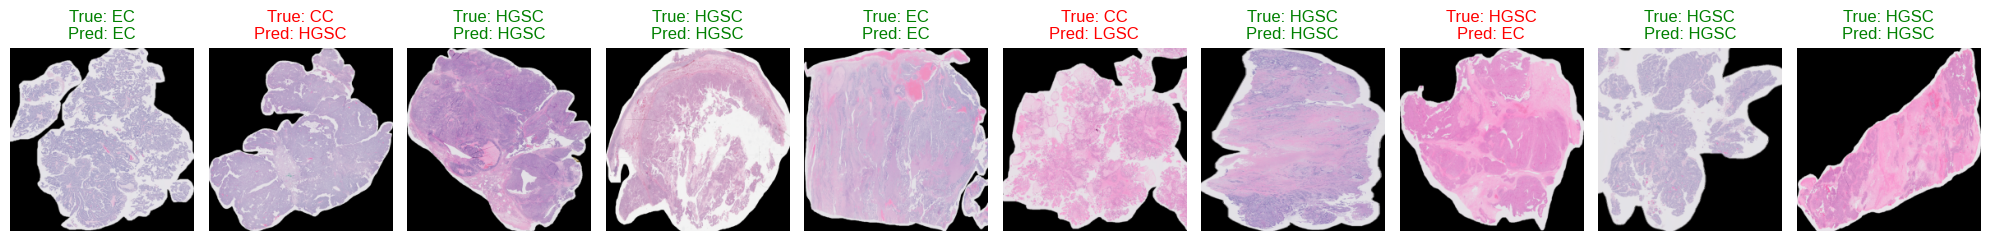


2. Extracting features...

3. Plotting feature distributions...


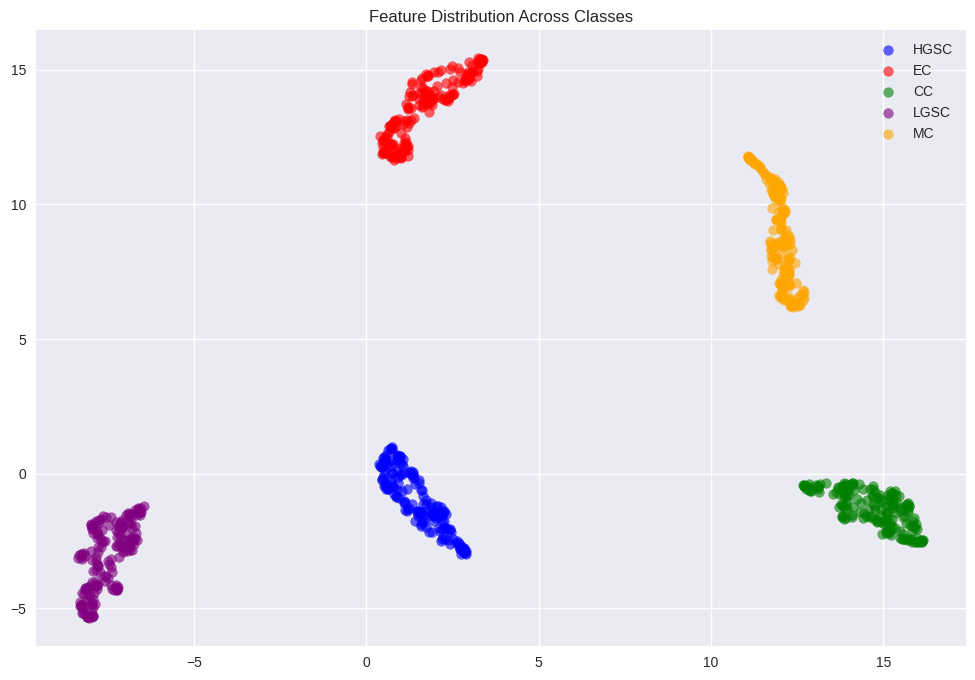


4. Analyzing predictions and metrics...


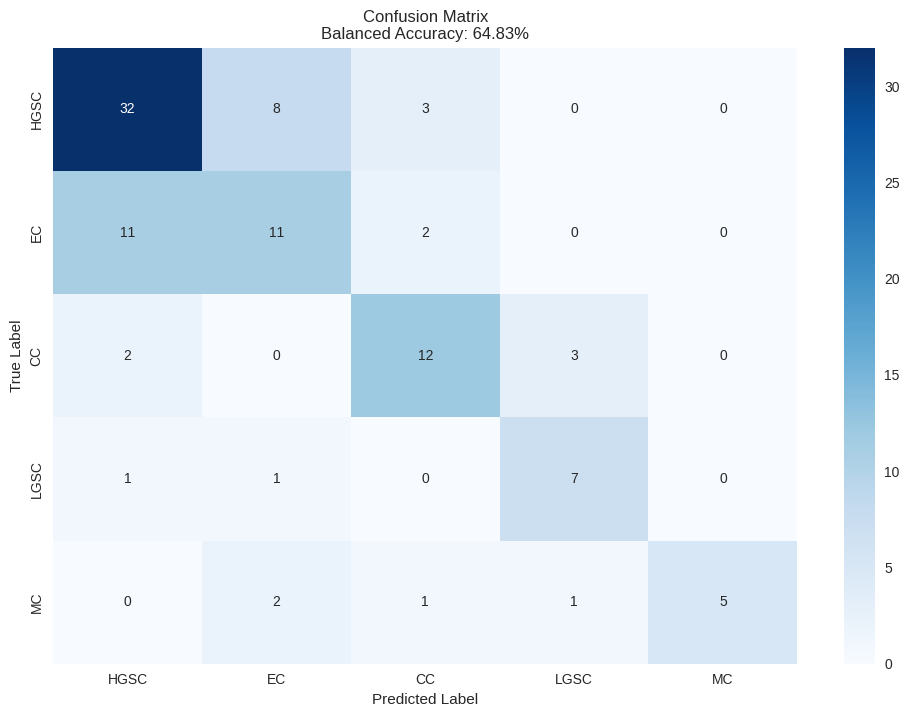


Classification Report:
              precision    recall  f1-score   support

        HGSC       0.70      0.74      0.72        43
          EC       0.50      0.46      0.48        24
          CC       0.67      0.71      0.69        17
        LGSC       0.64      0.78      0.70         9
          MC       1.00      0.56      0.71         9

    accuracy                           0.66       102
   macro avg       0.70      0.65      0.66       102
weighted avg       0.67      0.66      0.65       102



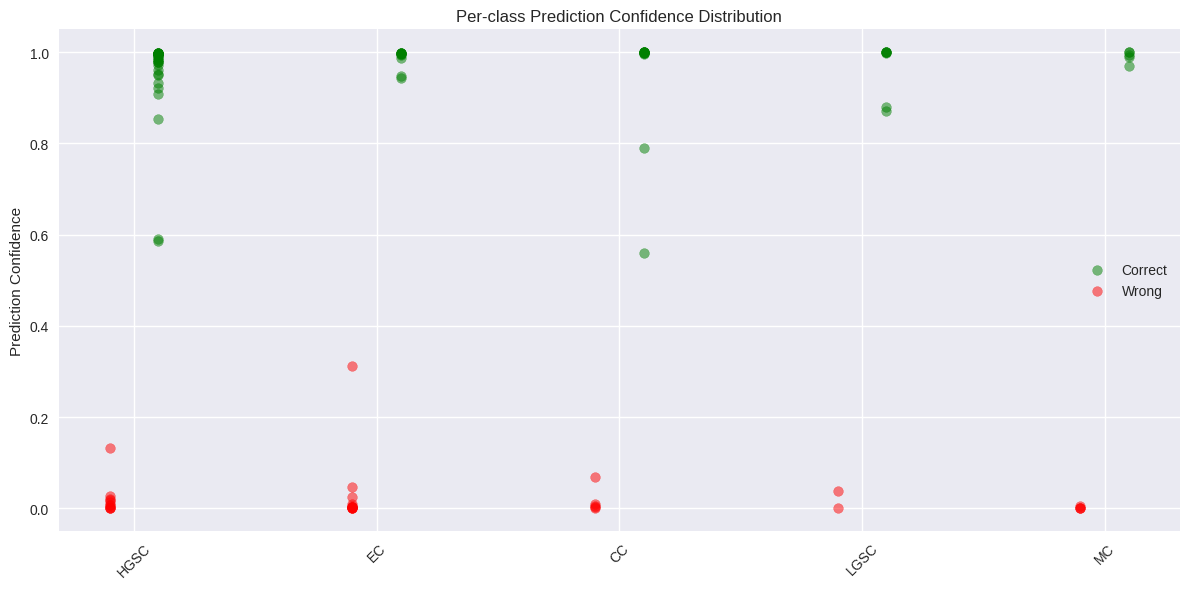


Overall Balanced Accuracy: 64.83%

5. Plotting UMAP embeddings...


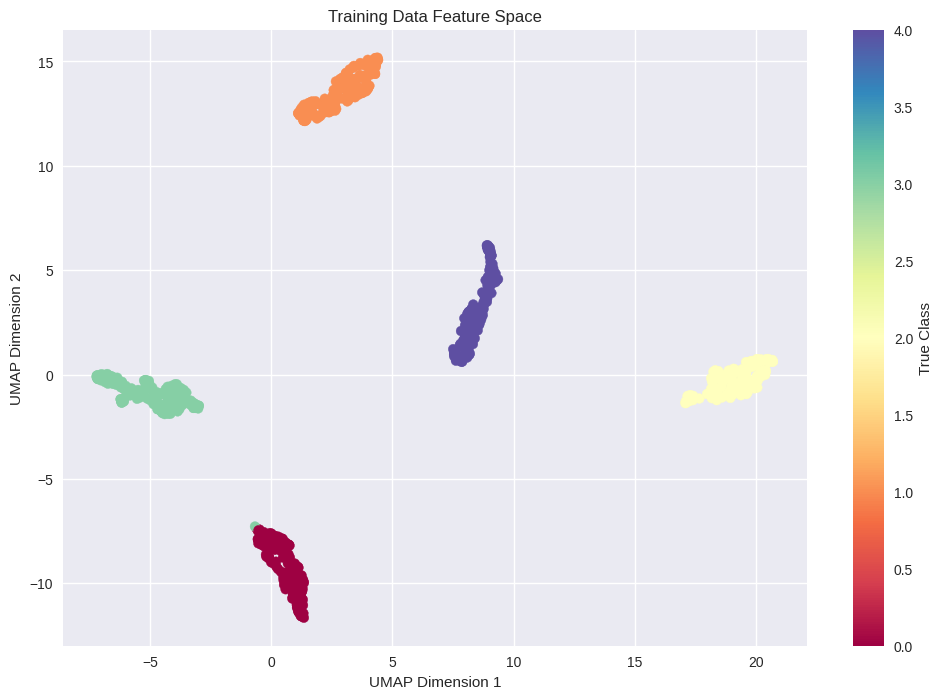

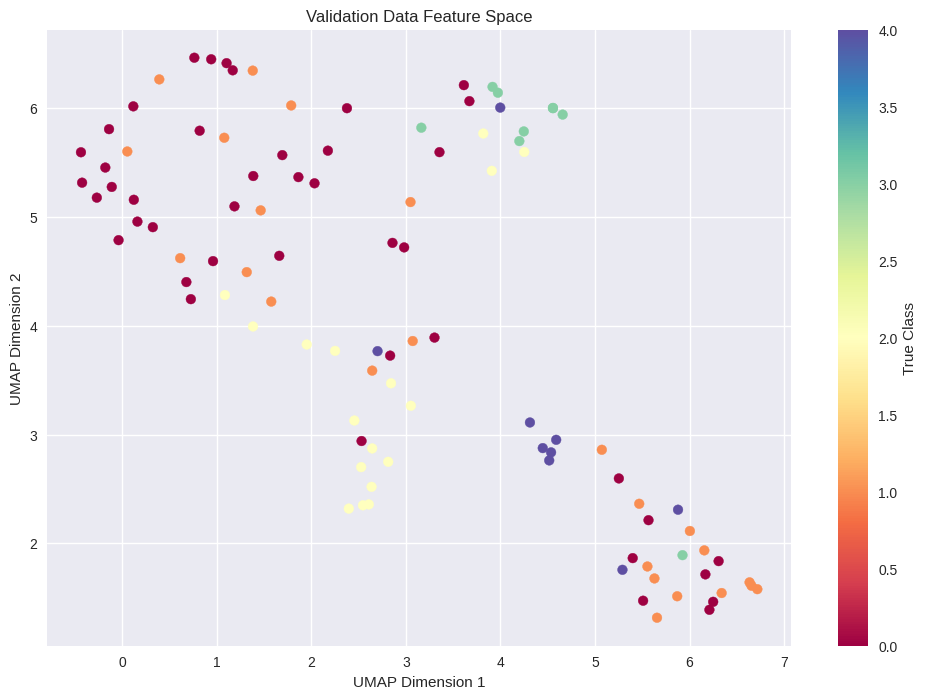


Per-class Performance Summary:
HGSC:
 Balanced Accuracy: 75.34%
 Average Confidence: 71.33%
EC:
 Balanced Accuracy: 65.87%
 Average Confidence: 46.93%
CC:
 Balanced Accuracy: 81.76%
 Average Confidence: 67.17%
LGSC:
 Balanced Accuracy: 86.74%
 Average Confidence: 75.39%
MC:
 Balanced Accuracy: 77.78%
 Average Confidence: 55.10%


In [44]:
def run_analysis():
    """Run the complete analysis pipeline"""
    try:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {device}")
        
        # Load your best model
        model = HistoPathModel()
        checkpoint = torch.load('./model_checkpoints/best_model.pth')
        model.load_state_dict(checkpoint['model_state_dict'])
        model.to(device)
        
        print("\nStarting model analysis...")
        print(f"Model checkpoint metrics:")
        print(f"Validation Accuracy: {checkpoint['val_acc']:.2f}%")
        print(f"Validation Balanced Accuracy: {checkpoint['val_balanced_acc']:.2f}%")
        print(f"Validation Loss: {checkpoint['val_loss']:.4f}")
        
        analyze_model(model, train_loader, val_loader, device)
        
        # Clean up
        del model
        gc.collect()
        torch.cuda.empty_cache()
        
    except Exception as e:
        print(f"Error in analysis: {str(e)}")
        raise

if __name__ == "__main__":
    run_analysis()

# Outlier Detection

In [45]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.nn import functional as F
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
from torchvision.models import efficientnet_b3, EfficientNet_B3_Weights
from torchvision.models import resnet101, ResNet101_Weights

In [46]:
class OutlierHistoPathModel(nn.Module):
    def __init__(self, num_classes=5, feature_dim=512):
        super().__init__()
        # Base backbones (same as before)
        self.resnet = resnet101(weights=ResNet101_Weights.DEFAULT)
        self.efficientnet = efficientnet_b3(weights=EfficientNet_B3_Weights.DEFAULT)
        
        # Remove original classifier layers
        self.resnet.fc = nn.Identity()
        self.efficientnet.classifier = nn.Identity()
        
        # Feature dimensions
        self.resnet_dim = 2048
        self.efficient_dim = 1536
        self.feature_dim = feature_dim
        self.combined_resnet_dim = self.resnet_dim + (512 * 3)
        
        # Feature reduction layers (same as before)
        self.resnet_reducer = nn.Sequential(
            nn.Linear(self.combined_resnet_dim, self.feature_dim),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        
        self.efficient_reducer = nn.Sequential(
            nn.Linear(self.efficient_dim, self.feature_dim * 2),
            nn.BatchNorm1d(self.feature_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(self.feature_dim * 2, self.feature_dim)
         )
        
        # Modify first conv layer
        self.resnet.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        
        # Attention modules (same as before)
        self.spatial_attention = nn.Sequential(
            nn.Conv2d(2048, 512, kernel_size=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 1, kernel_size=1),
            nn.Sigmoid()
        )
        
        self.channel_attention = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(2048, 512, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(512, 2048, kernel_size=1),
            nn.Sigmoid()
        )
        # Add channel attention for EfficientNet
        self.efficient_channel_attention = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(1536, 512, kernel_size=1),  # 1536 for EfficientNet-B3
            nn.ReLU(),
            nn.Conv2d(512, 1536, kernel_size=1),
            nn.Sigmoid()
        )

        # Add fusion attention
        self.fusion_attention = nn.Sequential(
            nn.Linear(self.feature_dim, self.feature_dim // 16),
            nn.ReLU(),
            nn.Linear(self.feature_dim // 16, self.feature_dim),
            nn.Sigmoid()
        )

        
        # Feature processors (same as before)
        self.feature_processors = nn.ModuleList([
            nn.Sequential(
                nn.Conv2d(2048, 512, 1),
                nn.BatchNorm2d(512),
                nn.ReLU()
            ),
            nn.Sequential(
                nn.Conv2d(2048, 512, 3, padding=1),
                nn.BatchNorm2d(512),
                nn.ReLU()
            ),
            nn.Sequential(
                nn.Conv2d(2048, 512, 5, padding=2),
                nn.BatchNorm2d(512),
                nn.ReLU()
            )
        ])
        
        self.feature_fusion = nn.Sequential(
            nn.Linear(self.feature_dim * 2, self.feature_dim * 2),
            nn.LayerNorm(self.feature_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.2),  # Reduced dropout for stability
            nn.Linear(self.feature_dim * 2, self.feature_dim * 2),
            nn.LayerNorm(self.feature_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(self.feature_dim * 2, self.feature_dim)
        )
    
  
        # Add feature gates
        self.feature_gates = nn.Sequential(
            nn.Linear(self.feature_dim * 2, 2),
            nn.Softmax(dim=1)
        )

    
        # Add a squeeze-excitation block
        self.se_block = nn.Sequential(
            nn.Linear(self.feature_dim, self.feature_dim // 16),
            nn.ReLU(),
            nn.Linear(self.feature_dim // 16, self.feature_dim),
            nn.Sigmoid()
         )
    
        
        # Self-attention
        self.self_attention = nn.MultiheadAttention(
            embed_dim=self.feature_dim,
            num_heads=8,
            dropout=0.1,
            batch_first=True
        )
        
        # Classification head
        self.classifier = nn.Sequential(
            nn.Linear(self.feature_dim, self.feature_dim),
            nn.LayerNorm(self.feature_dim),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(self.feature_dim, num_classes)
        )
        
        # Outlier detection head
        self.outlier_detector = nn.Sequential(
            nn.Linear(self.feature_dim, self.feature_dim),
            nn.LayerNorm(self.feature_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(self.feature_dim, self.feature_dim * 2)  # Mean and log variance
        )

    def extract_resnet_features(self, x):
        # Initial layers
        x = self.resnet.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.resnet.maxpool(x)
        
        # ResNet blocks
        x = self.resnet.layer1(x)
        x = self.resnet.layer2(x)
        x = self.resnet.layer3(x)
        x = self.resnet.layer4(x)
        
        # Apply attention
        spatial_weights = self.spatial_attention(x)
        channel_weights = self.channel_attention(x)
        attended_features = x * spatial_weights * channel_weights
        
        # Global features
        global_features = F.adaptive_avg_pool2d(attended_features, 1).flatten(1)
        
        # Process features through each processor
        processed_features = []
        for processor in self.feature_processors:
            features = processor(attended_features)
            pooled = F.adaptive_avg_pool2d(features, 1).flatten(1)
            processed_features.append(pooled)
        
        # Concatenate global and processed features
        combined_features = torch.cat([global_features] + processed_features, dim=1)
        
        return self.resnet_reducer(combined_features)

    def extract_efficient_features(self, x):
        features = self.efficientnet.features(x)
    
        # Apply channel attention
        channel_weights = self.efficient_channel_attention(features)
        features = features * channel_weights
    
        features = self.efficientnet.avgpool(features)
        features = torch.flatten(features, 1)
        return self.efficient_reducer(features)
    

    def extract_features(self, x):
        resnet_features = self.extract_resnet_features(x)
        torch.cuda.empty_cache()
    
        efficient_features = self.extract_efficient_features(x)
        torch.cuda.empty_cache()
    
        combined_features = torch.cat([resnet_features, efficient_features], dim=1)
        fused_features = self.feature_fusion(combined_features)
    
        # Residual connection
        if hasattr(self, 'feature_gates'):
            gates = self.feature_gates(combined_features)
            residual = resnet_features * gates[:, 0].unsqueeze(1) + efficient_features * gates[:, 1].unsqueeze(1)
            fused_features = fused_features + residual
    
        
        # Apply self-attention with gradient clipping
        attended_features, _ = self.self_attention(
            fused_features.unsqueeze(1),
            fused_features.unsqueeze(1),
            fused_features.unsqueeze(1)
        )
        
        return fused_features + 0.1 * attended_features.squeeze(1)

    def compute_outlier_score(self, x):
        """Compute outlier score for input images"""
        with torch.no_grad():
            # Extract features
            features = self.extract_features(x)
            
            # Get distribution parameters
            dist_params = self.outlier_detector(features)
            mean, log_var = torch.chunk(dist_params, 2, dim=1)
            
            # Compute Mahalanobis distance as outlier score
            var = torch.exp(log_var)
            z_score = (features - mean) / torch.sqrt(var + 1e-6)
            outlier_score = torch.sum(z_score ** 2, dim=1)
            
            return outlier_score

    def forward(self, x):
        """Forward pass with both classification and outlier detection"""
        # Extract features
        features = self.extract_features(x)
        
        # Classification logits
        logits = self.classifier(features)
        
        # Outlier detection parameters
        dist_params = self.outlier_detector(features)
        mean, log_var = torch.chunk(dist_params, 2, dim=1)
        
        if self.training:
            return logits, mean, log_var
        else:
            return logits

    def __del__(self):
        torch.cuda.empty_cache()

In [47]:
class OutlierLoss(nn.Module):
    """Combined loss for classification and outlier detection"""
    def __init__(self, num_classes=5, outlier_weight=0.1):
        super().__init__()
        self.ce_loss = nn.CrossEntropyLoss()
        self.outlier_weight = outlier_weight
        
    def forward(self, logits, mean, log_var, labels):
        # Classification loss
        ce_loss = self.ce_loss(logits, labels)
        
        # Feature distribution regularization
        kl_loss = -0.5 * torch.mean(1 + log_var - mean.pow(2) - log_var.exp())
        
        # Combined loss
        total_loss = ce_loss + self.outlier_weight * kl_loss
        
        return total_loss, ce_loss, kl_loss

In [50]:
def create_outlier_model(device, learning_rate=5e-4, epochs=30):
    """Create model with outlier detection capabilities"""
    model = OutlierHistoPathModel(num_classes=5)
    model = model.to(device)
    
    # Create predictor configuration
    wsi_config = IOPatchPredictorConfig(
        input_resolutions=[{"units": "mpp", "resolution": 0.5}],
        patch_input_shape=[224, 224],
        stride_shape=[224, 224]
    )
    
    # Create patch predictor
    predictor = PatchPredictor(
        model=model,
        batch_size=32,
        num_loader_workers=4
    )
    
    # Combined loss function
    criterion = OutlierLoss(num_classes=5)
    
    # Optimizer
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
    
    # Learning rate scheduler
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=learning_rate,
        steps_per_epoch=28,
        epochs=epochs,
        pct_start=0.3
    )
    
    return model, criterion, optimizer, scheduler, predictor, wsi_config

In [51]:
class OutlierTrainer:
    def __init__(self, model, train_loader, val_loader, device, criterion,
                 optimizer, scheduler, predictor, wsi_config, epochs=30,
                 save_dir='./outlier_model_checkpoints', batch_size=16):
        self.model = model
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.device = device
        self.criterion = criterion
        self.optimizer = optimizer
        self.scheduler = scheduler
        self.predictor = predictor
        self.wsi_config = wsi_config
        self.epochs = epochs
        self.save_dir = save_dir
        self.batch_size = batch_size
        
        # Create gradient scaler for mixed precision training
        self.scaler = torch.cuda.amp.GradScaler()
        
        os.makedirs(save_dir, exist_ok=True)

    def compute_auxiliary_loss(self, features, labels):
        """Auxiliary task: Feature clustering loss"""
        # Process in chunks to save memory
        chunk_size = 4
        total_center_loss = 0
        
        for i in range(0, len(features), chunk_size):
            chunk_features = features[i:i + chunk_size]
            chunk_labels = labels[i:i + chunk_size]
            
            # Compute center for each class in chunk
            centers = {}
            for cls in torch.unique(chunk_labels):
                centers[cls.item()] = chunk_features[chunk_labels == cls].mean(0)
            
            # Compute center loss for chunk
            chunk_loss = 0
            for cls in centers:
                cls_features = chunk_features[chunk_labels == cls]
                if len(cls_features) > 0:
                    chunk_loss += F.mse_loss(cls_features, 
                                           centers[cls].expand(len(cls_features), -1))
            
            total_center_loss += chunk_loss
            
            # Clear cache
            torch.cuda.empty_cache()
        
        return total_center_loss
    
    def compute_consistency_loss(self, image, augmented_image):
        """Consistency between different views of same image"""
        # Process in chunks
        chunk_size = 4
        total_consist_loss = 0
        
        for i in range(0, len(image), chunk_size):
            # Extract features for original and augmented chunks
            with torch.cuda.amp.autocast():
                orig_features = self.model.extract_features(image[i:i + chunk_size])
                aug_features = self.model.extract_features(augmented_image[i:i + chunk_size])
                chunk_loss = F.mse_loss(orig_features, aug_features)
            
            total_consist_loss += chunk_loss
            
            # Clear cache
            torch.cuda.empty_cache()
        
        return total_consist_loss
    
    def augment_batch(self, images):
        """Memory efficient augmentation"""
        augmented = []
        chunk_size = 4
        
        for i in range(0, len(images), chunk_size):
            chunk = images[i:i + chunk_size]
            chunk_aug = []
            
            for img in chunk:
                transform = A.Compose([
                    A.RandomRotate90(p=0.5),
                    A.HorizontalFlip(p=0.5),
                    A.VerticalFlip(p=0.5),
                    A.ColorJitter(brightness=0.2, contrast=0.2, p=0.5)
                ])
                
                # Move to CPU for transformation
                img_np = img.cpu().numpy().transpose(1, 2, 0)
                aug_img = transform(image=img_np)['image']
                chunk_aug.append(torch.from_numpy(aug_img.transpose(2, 0, 1)))
            
            # Move augmented chunk back to GPU
            chunk_tensor = torch.stack(chunk_aug).to(self.device)
            augmented.append(chunk_tensor)
            
            # Clear cache
            torch.cuda.empty_cache()
        
        return torch.cat(augmented, dim=0)

    def train_epoch(self):
        self.model.train()
        running_total_loss = 0.0
        running_ce_loss = 0.0
        running_kl_loss = 0.0
        running_aux_loss = 0.0
        running_consist_loss = 0.0
        correct = 0
        total = 0
        
        pbar = tqdm(self.train_loader, desc='Training')
        for inputs, labels in pbar:
            # Limit batch size
            if len(inputs) > self.batch_size:
                inputs = inputs[:self.batch_size]
                labels = labels[:self.batch_size]
            
            inputs = inputs.to(self.device, non_blocking=True)
            labels = labels.to(self.device, non_blocking=True)
            
            # Clear cache before augmentation
            torch.cuda.empty_cache()
            
            # Get augmented version
            augmented_inputs = self.augment_batch(inputs)
            
            self.optimizer.zero_grad(set_to_none=True)
            
            # Use mixed precision training
            with torch.cuda.amp.autocast():
                # Get model outputs
                logits, mean, log_var = self.model(inputs)
                features = self.model.extract_features(inputs)
                
                # Calculate losses
                total_loss, ce_loss, kl_loss = self.criterion(logits, mean, log_var, labels)
                aux_loss = self.compute_auxiliary_loss(features, labels)
                consist_loss = self.compute_consistency_loss(inputs, augmented_inputs)
                
                # Combined loss
                total_loss = total_loss + 0.1 * aux_loss + 0.1 * consist_loss
            
            # Scaled backward pass
            self.scaler.scale(total_loss).backward()
            self.scaler.unscale_(self.optimizer)
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)
            self.scaler.step(self.optimizer)
            self.scaler.update()
            
            if self.scheduler is not None:
                self.scheduler.step()
            
            # Update metrics
            running_total_loss += total_loss.item()
            running_ce_loss += ce_loss.item()
            running_kl_loss += kl_loss.item()
            running_aux_loss += aux_loss.item()
            running_consist_loss += consist_loss.item()
            
            _, predicted = logits.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
            # Clear cache
            torch.cuda.empty_cache()
            
            pbar.set_postfix({
                'total_loss': f'{total_loss.item():.4f}',
                'acc': f'{100.*correct/total:.2f}%'
            })
        
        return {
            'total_loss': running_total_loss / len(self.train_loader),
            'ce_loss': running_ce_loss / len(self.train_loader),
            'kl_loss': running_kl_loss / len(self.train_loader),
            'aux_loss': running_aux_loss / len(self.train_loader),
            'consist_loss': running_consist_loss / len(self.train_loader),
            'accuracy': 100. * correct / total
        }

    @torch.no_grad()
    def validate(self):
        self.model.eval()
        running_total_loss = 0.0
        running_ce_loss = 0.0
        running_kl_loss = 0.0
        correct = 0
        total = 0
        
        # For outlier detection metrics
        all_scores = []
        all_preds = []
        all_labels = []
        
        pbar = tqdm(self.val_loader, desc='Validating')
        for inputs, labels in pbar:
            # Limit batch size
            if len(inputs) > self.batch_size:
                inputs = inputs[:self.batch_size]
                labels = labels[:self.batch_size]
            
            inputs = inputs.to(self.device, non_blocking=True)
            labels = labels.to(self.device, non_blocking=True)
            
            # Use mixed precision for validation too
            with torch.cuda.amp.autocast():
                # Get model outputs (model returns tuple in training mode)
                self.model.train()  # Temporarily set to train mode to get all outputs
                logits, mean, log_var = self.model(inputs)
                self.model.eval()  # Set back to eval mode
                
                # Calculate losses
                total_loss, ce_loss, kl_loss = self.criterion(logits, mean, log_var, labels)
                
                # Calculate outlier scores
                outlier_scores = self.model.compute_outlier_score(inputs)
            
            # Update metrics
            running_total_loss += total_loss.item()
            running_ce_loss += ce_loss.item()
            running_kl_loss += kl_loss.item()
            
            _, predicted = logits.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
            # Store predictions and scores
            all_scores.extend(outlier_scores.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            # Clear cache
            torch.cuda.empty_cache()
            
            pbar.set_postfix({
                'total_loss': f'{total_loss.item():.4f}',
                'acc': f'{100.*correct/total:.2f}%'
            })
        
        # Calculate average metrics
        avg_total_loss = running_total_loss / len(self.val_loader)
        avg_ce_loss = running_ce_loss / len(self.val_loader)
        avg_kl_loss = running_kl_loss / len(self.val_loader)
        accuracy = 100. * correct / total
        
        outlier_metrics = {
            'scores': np.array(all_scores),
            'predictions': np.array(all_preds),
            'labels': np.array(all_labels)
        }
        
        return avg_total_loss, avg_ce_loss, avg_kl_loss, accuracy, outlier_metrics

    def train(self):
        print(f"\nStarting outlier detection training for {self.epochs} epochs...")
        best_metrics = {
            'best_val_loss': float('inf'),
            'best_val_acc': 0.0,
            'best_epoch': 0
        }
        
        for epoch in range(self.epochs):
            print(f'\nEpoch {epoch+1}/{self.epochs}')
            print('-' * 20)
            
            # Training phase
            train_metrics = self.train_epoch()
            
            # Clear cache before validation
            torch.cuda.empty_cache()
            
            # Validation phase
            val_total_loss, val_ce_loss, val_kl_loss, val_acc, outlier_metrics = self.validate()
            
            # Print epoch results
            print(f'\nTraining Results:')
            print(f"Total Loss: {train_metrics['total_loss']:.4f}")
            print(f"CE Loss: {train_metrics['ce_loss']:.4f}")
            print(f"KL Loss: {train_metrics['kl_loss']:.4f}")
            print(f"Auxiliary Loss: {train_metrics['aux_loss']:.4f}")
            print(f"Consistency Loss: {train_metrics['consist_loss']:.4f}")
            print(f"Accuracy: {train_metrics['accuracy']:.2f}%")
            
            print(f'\nValidation Results:')
            print(f'Total Loss: {val_total_loss:.4f}')
            print(f'CE Loss: {val_ce_loss:.4f}')
            print(f'KL Loss: {val_kl_loss:.4f}')
            print(f'Accuracy: {val_acc:.2f}%')
            
            # Save best model
            if val_total_loss < best_metrics['best_val_loss']:
                best_metrics['best_val_loss'] = val_total_loss
                best_metrics['best_val_acc'] = val_acc
                best_metrics['best_epoch'] = epoch + 1
                
                model_path = os.path.join(self.save_dir, 'best_model.pth')
                torch.save({
                    'epoch': epoch + 1,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': self.optimizer.state_dict(),
                    'scaler_state_dict': self.scaler.state_dict(),
                    'val_loss': val_total_loss,
                    'val_acc': val_acc,
                    'outlier_metrics': outlier_metrics
                }, model_path)
                print(f'Saved new best model with validation loss: {val_total_loss:.4f}')
                print(f'Saved new best model with validation accuracy: {val_acc:.2f}')
            
            # Memory cleanup after each epoch
            torch.cuda.empty_cache()
            gc.collect()
        
        return best_metrics

In [52]:
def train_outlier_main():
    try:
        print("Initializing Outlier Detection Pipeline...")
        
        # Set device
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {device}")
        
        # Use global data loaders
        global train_loader, val_loader
        
        print("\nInitializing model with outlier detection...")
        # Create model with outlier detection capabilities
        model, criterion, optimizer, scheduler, predictor, wsi_config = create_outlier_model(
            device, 
            learning_rate=5e-4,  
            epochs=30
        )
        
        # Print model summary
        total_params = sum(p.numel() for p in model.parameters())
        trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        print(f"Total parameters: {total_params:,}")
        print(f"Trainable parameters: {trainable_params:,}")
        
        # Initialize trainer with memory optimizations
        trainer = OutlierTrainer(
            model=model,
            train_loader=train_loader,
            val_loader=val_loader,
            device=device,
            criterion=criterion,
            optimizer=optimizer,
            scheduler=scheduler,
            predictor=predictor,
            wsi_config=wsi_config,
            epochs=30,
            save_dir='./outlier_model_checkpoints',
            batch_size=16  # Add reduced batch size for memory efficiency
        )
        
        # Start training
        print("\nStarting training process...")
        print(f"Training on {len(train_loader.dataset)} samples")
        print(f"Validating on {len(val_loader.dataset)} samples")
        
        best_metrics = trainer.train()
        
        # Print final results
        print("\nTraining completed!")
        print("Best metrics achieved:")
        print(f"Best validation loss: {best_metrics['best_val_loss']:.4f}")
        print(f"Best validation accuracy: {best_metrics['best_val_acc']:.2f}%")
        print(f"Best epoch: {best_metrics['best_epoch']}")
        
        # Clean up
        del model, trainer
        gc.collect()
        torch.cuda.empty_cache()
        
        return best_metrics
        
    except Exception as e:
        print(f"Error in outlier detection pipeline: {str(e)}")
        traceback.print_exc()
        
        # Clean up even if there's an error
        try:
            del model, trainer
            gc.collect()
            torch.cuda.empty_cache()
        except:
            pass
        return None

if __name__ == "__main__":
    train_outlier_main()

Initializing Outlier Detection Pipeline...
Using device: cuda

Initializing model with outlier detection...
Total parameters: 103,365,296
Trainable parameters: 103,365,296

Starting training process...
Training on 870 samples
Validating on 102 samples

Starting outlier detection training for 30 epochs...

Epoch 1/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.61it/s, total_loss=1.4706, acc=20.37%]



Training Results:
Total Loss: 1.8593
CE Loss: 1.6827
KL Loss: 0.1644
Auxiliary Loss: 0.3498
Consistency Loss: 1.2517
Accuracy: 20.09%

Validation Results:
Total Loss: 1.7300
CE Loss: 1.7162
KL Loss: 0.1380
Accuracy: 20.37%
Saved new best model with validation loss: 1.7300
Saved new best model with validation accuracy: 20.37

Epoch 2/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.83it/s, total_loss=1.6446, acc=11.11%]



Training Results:
Total Loss: 1.7302
CE Loss: 1.5806
KL Loss: 0.1164
Auxiliary Loss: 0.2978
Consistency Loss: 1.0812
Accuracy: 28.31%

Validation Results:
Total Loss: 1.7609
CE Loss: 1.7516
KL Loss: 0.0932
Accuracy: 11.11%

Epoch 3/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.77it/s, total_loss=2.0105, acc=31.48%]



Training Results:
Total Loss: 1.6300
CE Loss: 1.5058
KL Loss: 0.0807
Auxiliary Loss: 0.2495
Consistency Loss: 0.9116
Accuracy: 33.56%

Validation Results:
Total Loss: 1.6748
CE Loss: 1.6683
KL Loss: 0.0651
Accuracy: 31.48%
Saved new best model with validation loss: 1.6748
Saved new best model with validation accuracy: 31.48

Epoch 4/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.66it/s, total_loss=1.8381, acc=35.19%]



Training Results:
Total Loss: 1.5036
CE Loss: 1.3887
KL Loss: 0.0556
Auxiliary Loss: 0.2711
Consistency Loss: 0.8223
Accuracy: 42.01%

Validation Results:
Total Loss: 1.7057
CE Loss: 1.7014
KL Loss: 0.0437
Accuracy: 35.19%

Epoch 5/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.53it/s, total_loss=1.5801, acc=20.37%]



Training Results:
Total Loss: 1.4701
CE Loss: 1.3666
KL Loss: 0.0358
Auxiliary Loss: 0.2579
Consistency Loss: 0.7412
Accuracy: 46.12%

Validation Results:
Total Loss: 1.8769
CE Loss: 1.8739
KL Loss: 0.0306
Accuracy: 20.37%

Epoch 6/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.87it/s, total_loss=1.7170, acc=46.30%]



Training Results:
Total Loss: 1.3019
CE Loss: 1.2087
KL Loss: 0.0236
Auxiliary Loss: 0.2540
Consistency Loss: 0.6545
Accuracy: 51.60%

Validation Results:
Total Loss: 1.5375
CE Loss: 1.5355
KL Loss: 0.0195
Accuracy: 46.30%
Saved new best model with validation loss: 1.5375
Saved new best model with validation accuracy: 46.30

Epoch 7/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.61it/s, total_loss=2.4146, acc=29.63%]



Training Results:
Total Loss: 1.3184
CE Loss: 1.2425
KL Loss: 0.0154
Auxiliary Loss: 0.2391
Consistency Loss: 0.5053
Accuracy: 52.51%

Validation Results:
Total Loss: 1.9117
CE Loss: 1.9106
KL Loss: 0.0114
Accuracy: 29.63%

Epoch 8/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.86it/s, total_loss=1.5452, acc=25.93%]



Training Results:
Total Loss: 1.1839
CE Loss: 1.1110
KL Loss: 0.0103
Auxiliary Loss: 0.2260
Consistency Loss: 0.4924
Accuracy: 57.31%

Validation Results:
Total Loss: 1.9426
CE Loss: 1.9416
KL Loss: 0.0102
Accuracy: 25.93%

Epoch 9/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.63it/s, total_loss=2.0959, acc=40.74%]



Training Results:
Total Loss: 1.1350
CE Loss: 1.0721
KL Loss: 0.0080
Auxiliary Loss: 0.2047
Consistency Loss: 0.4156
Accuracy: 60.27%

Validation Results:
Total Loss: 1.7025
CE Loss: 1.7019
KL Loss: 0.0061
Accuracy: 40.74%

Epoch 10/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.46it/s, total_loss=3.0919, acc=40.74%]



Training Results:
Total Loss: 1.0154
CE Loss: 0.9573
KL Loss: 0.0060
Auxiliary Loss: 0.1665
Consistency Loss: 0.4086
Accuracy: 66.21%

Validation Results:
Total Loss: 2.2147
CE Loss: 2.2141
KL Loss: 0.0054
Accuracy: 40.74%

Epoch 11/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.56it/s, total_loss=1.6129, acc=31.48%]



Training Results:
Total Loss: 1.0615
CE Loss: 1.0113
KL Loss: 0.0043
Auxiliary Loss: 0.1526
Consistency Loss: 0.3451
Accuracy: 61.42%

Validation Results:
Total Loss: 1.9854
CE Loss: 1.9850
KL Loss: 0.0038
Accuracy: 31.48%

Epoch 12/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.58it/s, total_loss=2.2843, acc=38.89%]



Training Results:
Total Loss: 0.9195
CE Loss: 0.8668
KL Loss: 0.0038
Auxiliary Loss: 0.1666
Consistency Loss: 0.3570
Accuracy: 68.95%

Validation Results:
Total Loss: 2.4181
CE Loss: 2.4177
KL Loss: 0.0038
Accuracy: 38.89%

Epoch 13/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.84it/s, total_loss=2.0585, acc=33.33%]



Training Results:
Total Loss: 0.9689
CE Loss: 0.9173
KL Loss: 0.0031
Auxiliary Loss: 0.1610
Consistency Loss: 0.3521
Accuracy: 68.04%

Validation Results:
Total Loss: 2.1665
CE Loss: 2.1662
KL Loss: 0.0030
Accuracy: 33.33%

Epoch 14/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.78it/s, total_loss=1.3641, acc=64.81%]



Training Results:
Total Loss: 0.8699
CE Loss: 0.8260
KL Loss: 0.0028
Auxiliary Loss: 0.1280
Consistency Loss: 0.3084
Accuracy: 72.15%

Validation Results:
Total Loss: 1.2667
CE Loss: 1.2665
KL Loss: 0.0023
Accuracy: 64.81%
Saved new best model with validation loss: 1.2667
Saved new best model with validation accuracy: 64.81

Epoch 15/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.86it/s, total_loss=1.7729, acc=51.85%]



Training Results:
Total Loss: 0.8474
CE Loss: 0.8015
KL Loss: 0.0023
Auxiliary Loss: 0.1571
Consistency Loss: 0.3005
Accuracy: 73.97%

Validation Results:
Total Loss: 1.6549
CE Loss: 1.6547
KL Loss: 0.0021
Accuracy: 51.85%

Epoch 16/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.58it/s, total_loss=1.1913, acc=53.70%]



Training Results:
Total Loss: 0.7822
CE Loss: 0.7490
KL Loss: 0.0018
Auxiliary Loss: 0.1133
Consistency Loss: 0.2171
Accuracy: 71.92%

Validation Results:
Total Loss: 1.5647
CE Loss: 1.5646
KL Loss: 0.0016
Accuracy: 53.70%

Epoch 17/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.56it/s, total_loss=1.0465, acc=48.15%]



Training Results:
Total Loss: 0.6746
CE Loss: 0.6418
KL Loss: 0.0017
Auxiliary Loss: 0.0944
Consistency Loss: 0.2319
Accuracy: 78.31%

Validation Results:
Total Loss: 1.9036
CE Loss: 1.9035
KL Loss: 0.0017
Accuracy: 48.15%

Epoch 18/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.62it/s, total_loss=1.5237, acc=48.15%]



Training Results:
Total Loss: 0.6394
CE Loss: 0.6125
KL Loss: 0.0018
Auxiliary Loss: 0.0752
Consistency Loss: 0.1926
Accuracy: 79.22%

Validation Results:
Total Loss: 1.9129
CE Loss: 1.9127
KL Loss: 0.0019
Accuracy: 48.15%

Epoch 19/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.57it/s, total_loss=1.5747, acc=40.74%]



Training Results:
Total Loss: 0.5435
CE Loss: 0.5175
KL Loss: 0.0018
Auxiliary Loss: 0.0775
Consistency Loss: 0.1814
Accuracy: 83.56%

Validation Results:
Total Loss: 2.0485
CE Loss: 2.0484
KL Loss: 0.0015
Accuracy: 40.74%

Epoch 20/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.80it/s, total_loss=1.5389, acc=46.30%]



Training Results:
Total Loss: 0.5185
CE Loss: 0.4967
KL Loss: 0.0013
Auxiliary Loss: 0.0719
Consistency Loss: 0.1454
Accuracy: 82.65%

Validation Results:
Total Loss: 1.6596
CE Loss: 1.6595
KL Loss: 0.0012
Accuracy: 46.30%

Epoch 21/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.55it/s, total_loss=2.3632, acc=44.44%]



Training Results:
Total Loss: 0.5270
CE Loss: 0.5089
KL Loss: 0.0011
Auxiliary Loss: 0.0576
Consistency Loss: 0.1223
Accuracy: 83.56%

Validation Results:
Total Loss: 2.1468
CE Loss: 2.1466
KL Loss: 0.0016
Accuracy: 44.44%

Epoch 22/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.63it/s, total_loss=2.9680, acc=46.30%]



Training Results:
Total Loss: 0.4703
CE Loss: 0.4462
KL Loss: 0.0012
Auxiliary Loss: 0.0788
Consistency Loss: 0.1614
Accuracy: 86.76%

Validation Results:
Total Loss: 2.2600
CE Loss: 2.2599
KL Loss: 0.0012
Accuracy: 46.30%

Epoch 23/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.89it/s, total_loss=1.8647, acc=53.70%]



Training Results:
Total Loss: 0.3649
CE Loss: 0.3494
KL Loss: 0.0011
Auxiliary Loss: 0.0466
Consistency Loss: 0.1081
Accuracy: 89.73%

Validation Results:
Total Loss: 1.9766
CE Loss: 1.9765
KL Loss: 0.0012
Accuracy: 53.70%

Epoch 24/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.63it/s, total_loss=2.0034, acc=50.00%]



Training Results:
Total Loss: 0.3032
CE Loss: 0.2887
KL Loss: 0.0013
Auxiliary Loss: 0.0428
Consistency Loss: 0.1015
Accuracy: 89.73%

Validation Results:
Total Loss: 2.2227
CE Loss: 2.2226
KL Loss: 0.0014
Accuracy: 50.00%

Epoch 25/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.63it/s, total_loss=2.7390, acc=46.30%]



Training Results:
Total Loss: 0.3130
CE Loss: 0.3002
KL Loss: 0.0014
Auxiliary Loss: 0.0383
Consistency Loss: 0.0880
Accuracy: 91.32%

Validation Results:
Total Loss: 2.4466
CE Loss: 2.4464
KL Loss: 0.0016
Accuracy: 46.30%

Epoch 26/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.56it/s, total_loss=3.3145, acc=44.44%]



Training Results:
Total Loss: 0.2882
CE Loss: 0.2775
KL Loss: 0.0014
Auxiliary Loss: 0.0265
Consistency Loss: 0.0793
Accuracy: 91.10%

Validation Results:
Total Loss: 2.7371
CE Loss: 2.7370
KL Loss: 0.0016
Accuracy: 44.44%

Epoch 27/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.82it/s, total_loss=2.2682, acc=50.00%]



Training Results:
Total Loss: 0.2804
CE Loss: 0.2693
KL Loss: 0.0013
Auxiliary Loss: 0.0299
Consistency Loss: 0.0799
Accuracy: 92.69%

Validation Results:
Total Loss: 2.3328
CE Loss: 2.3327
KL Loss: 0.0018
Accuracy: 50.00%

Epoch 28/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.67it/s, total_loss=2.7054, acc=53.70%]



Training Results:
Total Loss: 0.2484
CE Loss: 0.2367
KL Loss: 0.0014
Auxiliary Loss: 0.0311
Consistency Loss: 0.0847
Accuracy: 92.01%

Validation Results:
Total Loss: 2.2628
CE Loss: 2.2627
KL Loss: 0.0014
Accuracy: 53.70%

Epoch 29/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.86it/s, total_loss=2.3073, acc=50.00%]



Training Results:
Total Loss: 0.2897
CE Loss: 0.2782
KL Loss: 0.0012
Auxiliary Loss: 0.0334
Consistency Loss: 0.0804
Accuracy: 91.55%

Validation Results:
Total Loss: 2.3702
CE Loss: 2.3701
KL Loss: 0.0017
Accuracy: 50.00%

Epoch 30/30
--------------------


Validating: 100%|██████████| 4/4 [00:00<00:00,  5.54it/s, total_loss=2.1998, acc=53.70%]



Training Results:
Total Loss: 0.2746
CE Loss: 0.2630
KL Loss: 0.0013
Auxiliary Loss: 0.0341
Consistency Loss: 0.0805
Accuracy: 91.55%

Validation Results:
Total Loss: 2.1407
CE Loss: 2.1406
KL Loss: 0.0014
Accuracy: 53.70%

Training completed!
Best metrics achieved:
Best validation loss: 1.2667
Best validation accuracy: 64.81%
Best epoch: 14


# Outlier Analysis

In [53]:
def analyze_outliers(model, dataloader, device, threshold=3.0):
    """Analyze potential outliers in the dataset"""
    model.eval()
    outlier_scores = []
    predictions = []
    labels = []
    
    with torch.no_grad():
        for images, batch_labels in dataloader:
            images = images.to(device)
            # Compute outlier scores directly
            scores = model.compute_outlier_score(images)
            # Get predictions
            logits = model(images)  # Model returns only logits in eval mode
            
            outlier_scores.extend(scores.cpu().numpy())
            predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
            labels.extend(batch_labels.numpy())
    
    outlier_scores = np.array(outlier_scores)
    predictions = np.array(predictions)
    labels = np.array(labels)
    
    # Identify outliers using Z-score
    z_scores = (outlier_scores - np.mean(outlier_scores)) / np.std(outlier_scores)
    outliers = z_scores > threshold
    
    # Plot results
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Outlier scores distribution
    plt.subplot(1, 2, 1)
    plt.hist(z_scores, bins=50)
    plt.axvline(threshold, color='r', linestyle='--', label=f'Threshold ({threshold})')
    plt.title('Distribution of Outlier Scores')
    plt.xlabel('Z-score')
    plt.ylabel('Count')
    plt.legend()
    
    # Plot 2: Scatter plot of outlier scores vs predictions
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(predictions, z_scores, c=labels, cmap='viridis', alpha=0.6)
    plt.axhline(threshold, color='r', linestyle='--', label=f'Threshold ({threshold})')
    plt.title('Outlier Scores vs Predictions')
    plt.xlabel('Predicted Class')
    plt.ylabel('Outlier Score (Z-score)')
    plt.legend()
    plt.colorbar(scatter, label='True Class')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print(f"\nFound {np.sum(outliers)} potential outliers out of {len(outlier_scores)} samples")
    print(f"Outlier percentage: {100 * np.sum(outliers) / len(outlier_scores):.2f}%")
    
    return outlier_scores, z_scores, outliers

In [54]:
def visualize_outliers(model, dataloader, device, threshold=3.0, num_samples=10):
    """Display sample images identified as outliers"""
    model.eval()
    classes = ['HGSC', 'EC', 'CC', 'LGSC', 'MC']
    
    # Collect images and their outlier scores
    all_images = []
    all_scores = []
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            # Get predictions
            logits = model(images)  # Model returns only logits in eval mode
            # Get outlier scores
            scores = model.compute_outlier_score(images)
            preds = torch.argmax(logits, dim=1)
            
            # Store batch data
            all_images.extend(images.cpu())
            all_scores.extend(scores.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())
    
    # Convert to numpy arrays
    all_scores = np.array(all_scores)
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    
    # Calculate z-scores
    z_scores = (all_scores - np.mean(all_scores)) / np.std(all_scores)
    
    # Find outlier indices
    outlier_indices = np.where(z_scores > threshold)[0]
    
    if len(outlier_indices) == 0:
        print("No outliers found with the current threshold.")
        return
    
    # Sort outliers by score for most extreme cases
    sorted_indices = outlier_indices[np.argsort(-z_scores[outlier_indices])]
    
    # Display top outliers
    n_cols = 5
    n_rows = (min(num_samples, len(sorted_indices)) + n_cols - 1) // n_cols
    fig = plt.figure(figsize=(20, 4*n_rows))
    
    for idx, outlier_idx in enumerate(sorted_indices[:num_samples]):
        ax = fig.add_subplot(n_rows, n_cols, idx + 1, xticks=[], yticks=[])
        
        # Get image and convert from tensor
        img = all_images[outlier_idx].numpy().transpose((1, 2, 0))
        img = np.clip(img, 0, 1)
        
        # Display image
        ax.imshow(img)
        
        # Add title with prediction and outlier score
        true_label = classes[all_labels[outlier_idx]]
        pred_label = classes[all_preds[outlier_idx]]
        score = z_scores[outlier_idx]
        
        title = f'True: {true_label}\nPred: {pred_label}\nOutlier Score: {score:.2f}'
        ax.set_title(title, color='red', fontsize=10)
    
    plt.suptitle(f'Top {num_samples} Outliers (Threshold = {threshold})', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\nTotal outliers found: {len(outlier_indices)} out of {len(z_scores)} images")
    print(f"Percentage of outliers: {100 * len(outlier_indices) / len(z_scores):.2f}%")
    
    # Show class distribution of outliers
    print("\nClass distribution of outliers:")
    for i, cls in enumerate(classes):
        outlier_count = np.sum(all_labels[outlier_indices] == i)
        total_count = np.sum(all_labels == i)
        if total_count > 0:
            percentage = 100 * outlier_count / total_count
            print(f"{cls}: {outlier_count}/{total_count} ({percentage:.2f}%)")

Using device: cuda

Analyzing outliers with threshold 2.0...


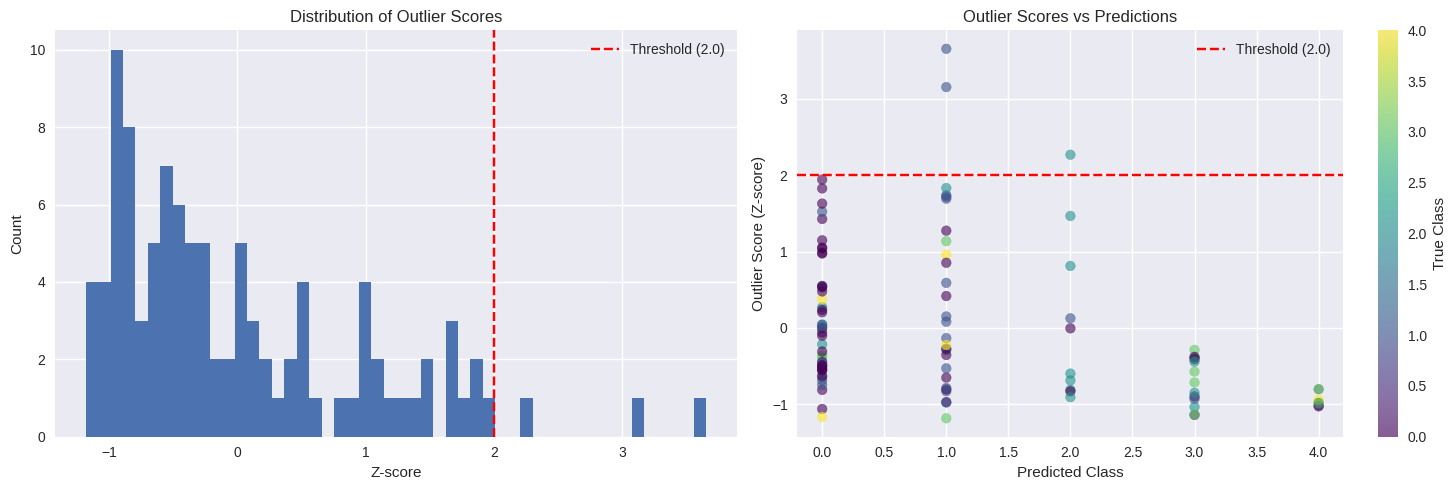


Found 3 potential outliers out of 102 samples
Outlier percentage: 2.94%

Visualizing outliers for threshold 2.0...


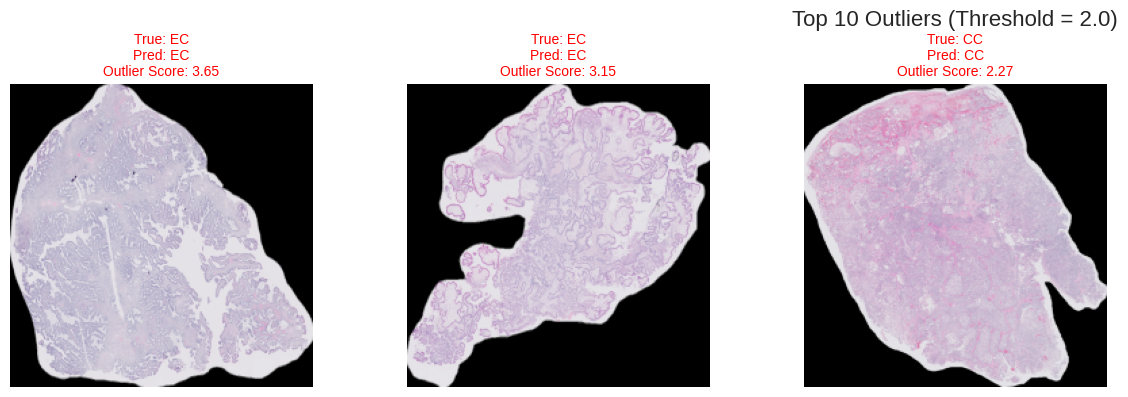


Total outliers found: 3 out of 102 images
Percentage of outliers: 2.94%

Class distribution of outliers:
HGSC: 0/43 (0.00%)
EC: 2/24 (8.33%)
CC: 1/17 (5.88%)
LGSC: 0/9 (0.00%)
MC: 0/9 (0.00%)

Analyzing outliers with threshold 2.5...


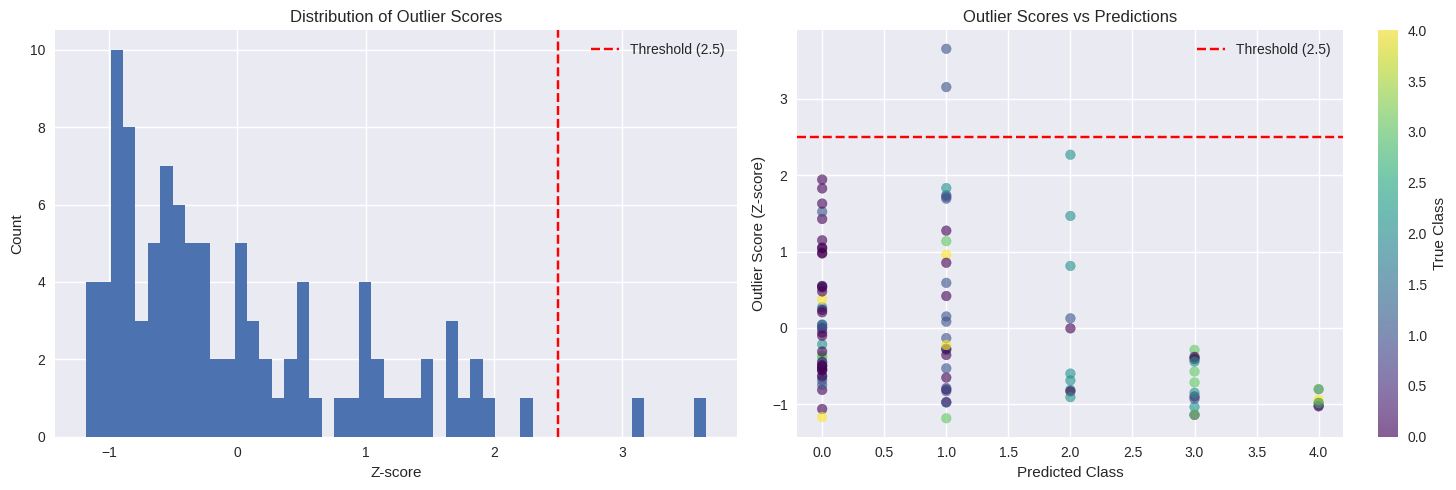


Found 2 potential outliers out of 102 samples
Outlier percentage: 1.96%

Visualizing outliers for threshold 2.5...


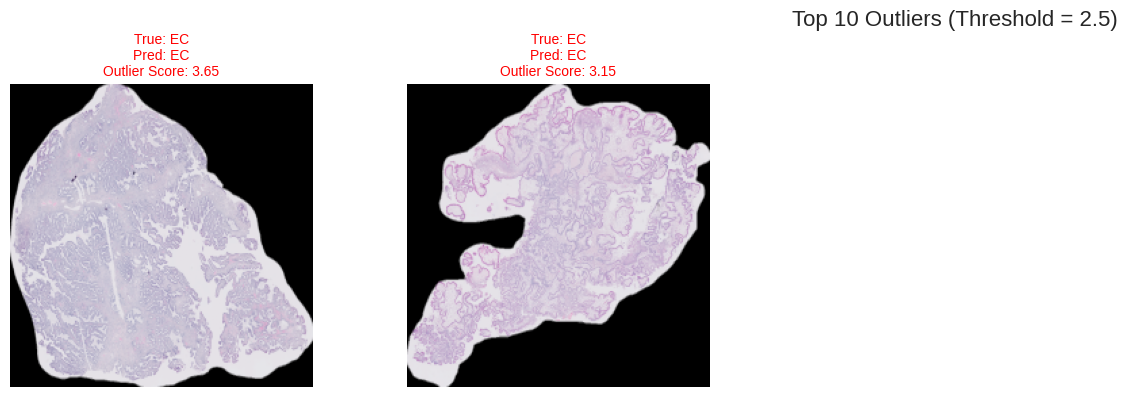


Total outliers found: 2 out of 102 images
Percentage of outliers: 1.96%

Class distribution of outliers:
HGSC: 0/43 (0.00%)
EC: 2/24 (8.33%)
CC: 0/17 (0.00%)
LGSC: 0/9 (0.00%)
MC: 0/9 (0.00%)

Analyzing outliers with threshold 3.0...


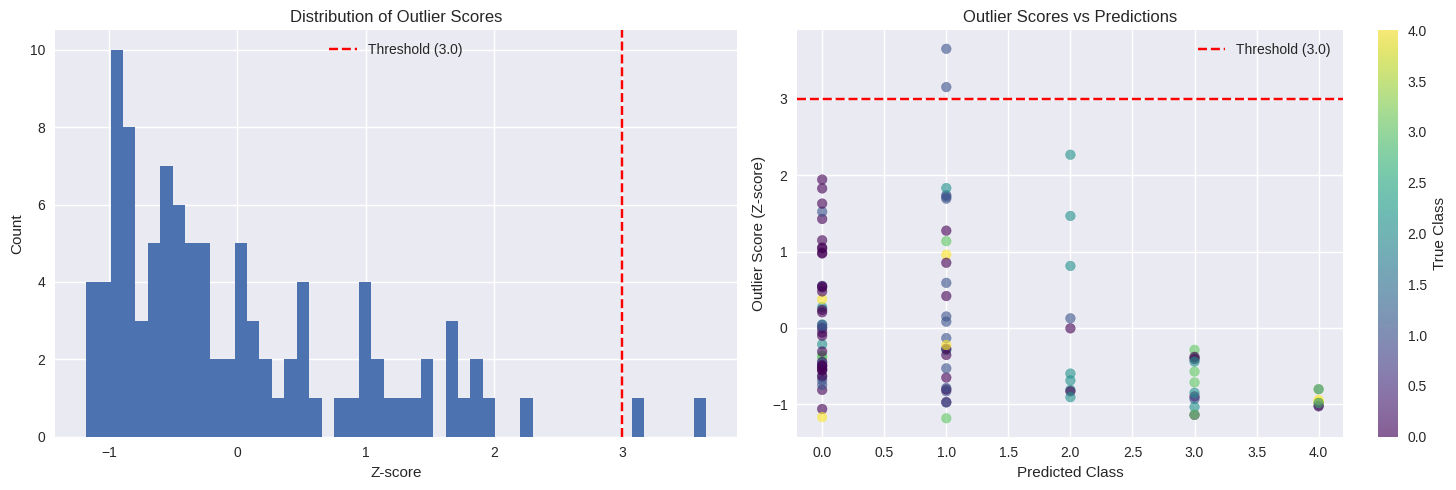


Found 2 potential outliers out of 102 samples
Outlier percentage: 1.96%

Visualizing outliers for threshold 3.0...


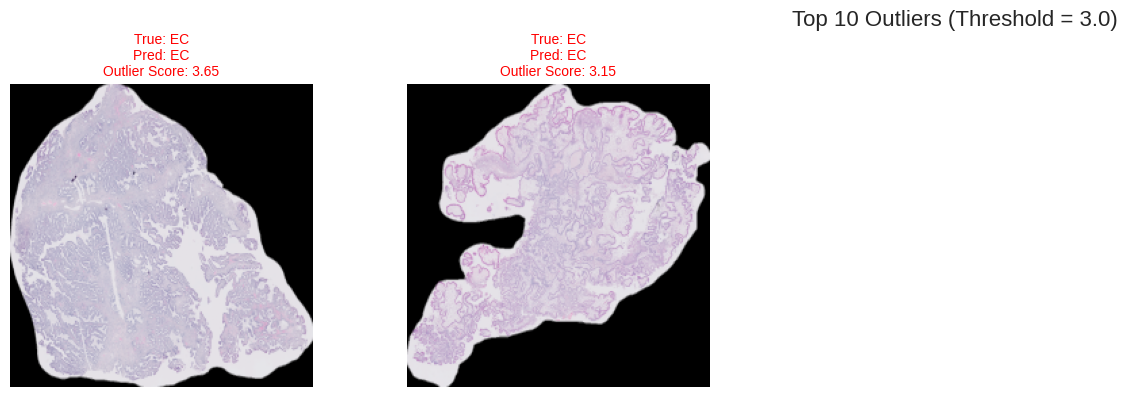


Total outliers found: 2 out of 102 images
Percentage of outliers: 1.96%

Class distribution of outliers:
HGSC: 0/43 (0.00%)
EC: 2/24 (8.33%)
CC: 0/17 (0.00%)
LGSC: 0/9 (0.00%)
MC: 0/9 (0.00%)


{2.0: {'scores': array([206.92014 ,  95.96591 ,  67.36037 ,  82.35503 ,  66.39678 ,
         126.68697 ,  53.709007, 174.65067 , 189.9319  , 165.71507 ,
          90.73492 ,  56.267284,  58.20044 , 174.00085 , 111.51017 ,
          92.0257  , 181.53595 , 164.31757 , 192.09798 ,  90.51276 ,
         108.49127 , 114.28918 , 168.88931 ,  84.923035, 134.68439 ,
         158.52054 ,  49.4556  ,  58.642757,  77.398926,  87.493454,
          92.40115 ,  96.93378 , 111.62579 , 211.80875 ,  81.18036 ,
          96.08557 , 132.44788 , 104.53641 ,  89.396805, 118.70133 ,
         195.13562 ,  62.69576 ,  81.95305 , 100.055916,  60.88881 ,
          86.78136 , 311.92227 ,  79.060295, 144.11111 , 218.1805  ,
          74.15869 ,  80.50633 , 113.99035 , 165.15067 , 112.1042  ,
          67.80917 ,  57.85175 , 116.28263 ,  58.924583,  67.45042 ,
         141.97058 , 123.02162 ,  85.0148  , 120.03339 ,  99.58723 ,
          55.587517, 137.97676 ,  74.273056,  91.07878 ,  72.72771 ,
          76.97409 

In [55]:
def run_outlier_analysis():
    """Run the complete outlier analysis pipeline"""
    try:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {device}")
        
        # Load trained model
        model = OutlierHistoPathModel()
        model.load_state_dict(torch.load('./outlier_model_checkpoints/best_model.pth')['model_state_dict'])
        model.to(device)
        
        # Different thresholds for comparison
        thresholds = [2.0, 2.5, 3.0]
        results = {}
        
        for threshold in thresholds:
            print(f"\nAnalyzing outliers with threshold {threshold}...")
            outlier_scores, z_scores, outliers = analyze_outliers(
                model,
                val_loader,
                device,
                threshold=threshold
            )
            results[threshold] = {
                'scores': outlier_scores,
                'z_scores': z_scores,
                'outliers': outliers
            }
            
            # Visualize outliers for each threshold
            print(f"\nVisualizing outliers for threshold {threshold}...")
            visualize_outliers(model, val_loader, device, threshold=threshold)
        
        # Clean up
        del model
        gc.collect()
        torch.cuda.empty_cache()
        
        return results
    
    except Exception as e:
        print(f"Error in outlier analysis: {str(e)}")
        traceback.print_exc()
        return None

run_outlier_analysis()

# Test Prediction

In [56]:
test_df = pd.read_csv("/kaggle/input/UBC-OCEAN/test.csv")
test_df.head()

image_id  image_width  image_height
0        41        28469         16987

In [57]:
sample_df = pd.read_csv("/kaggle/input/UBC-OCEAN/sample_submission.csv")
sample_df.head()

image_id label
0        41  HGSC

In [58]:
import torch
import torch.nn as nn
import cv2
import numpy as np
from torchvision import models, transforms
from torch.nn import functional as F
from torchvision.models import ResNet101_Weights
import albumentations as A
import os

In [59]:
def predict_single_image(image_path, model_path='./model_checkpoints/best_model.pth', device='cuda'):
    """
    Predict class for a single test image using the saved best model
    """
    try:
        # Load and preprocess the image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Initialize preprocessor
        preprocessor = EnhancedPreprocessor()
        preprocessed_image = preprocessor.preprocess_image(image)
        
        # Convert to tensor and normalize
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])
        image_tensor = transform(preprocessed_image).unsqueeze(0)
        
        # Load the saved model
        model = HistoPathModel()  # Initialize model architecture
        checkpoint = torch.load(model_path)
        model.load_state_dict(checkpoint['model_state_dict'])  # Load weights
        model = model.to(device)
        model.eval()
        
        # Make prediction
        with torch.no_grad():
            image_tensor = image_tensor.to(device)
            outputs = model(image_tensor)
            probabilities = F.softmax(outputs, dim=1)
        
        # Get prediction
        classes = ['HGSC', 'EC', 'CC', 'LGSC', 'MC']
        pred_class = classes[torch.argmax(probabilities).item()]
        confidence = torch.max(probabilities).item()
        
        # Get probabilities for all classes
        class_probs = {cls: prob.item() for cls, prob in zip(classes, probabilities[0])}
        
        return pred_class, confidence, class_probs
        
    except Exception as e:
        print(f"Error in prediction: {str(e)}")
        raise

In [60]:
def save_prediction_to_csv(image_id, predicted_class, output_path='submission.csv'):
    """
    Save prediction to CSV in the required format
    """
    df = pd.DataFrame({
        'image_id': [image_id],
        'label': [predicted_class]
    })
    df.to_csv(output_path, index=False)
    print(f"\nPrediction saved to {output_path}")
    print(f"Content preview:")
    print(df.to_string(index=False))

In [61]:
def main():
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Paths
    image_path = '/kaggle/input/UBC-OCEAN/test_thumbnails/41_thumbnail.png'
    model_path = './model_checkpoints/best_model.pth'
    
    # Get image ID (removing leading zeros)
    image_id = str(int(os.path.basename(image_path).split('_')[0]))
    
    try:
        # Make prediction
        pred_class, confidence, class_probs = predict_single_image(
            image_path, 
            model_path, 
            device
        )
        
        # Print detailed results
        print(f"\nPredicted class: {pred_class}")
        print(f"Confidence: {confidence:.2%}")
        print("\nClass probabilities:")
        for cls, prob in class_probs.items():
            print(f"{cls}: {prob:.2%}")
        
        # Save to CSV
        save_prediction_to_csv(image_id, pred_class)
        
    except Exception as e:
        print(f"Error during prediction: {str(e)}")
        raise

if __name__ == "__main__":
    main()

Using device: cuda

Predicted class: MC
Confidence: 98.87%

Class probabilities:
HGSC: 0.01%
EC: 0.80%
CC: 0.08%
LGSC: 0.25%
MC: 98.87%

Prediction saved to submission.csv
Content preview:
image_id label
      41    MC
